#1 Imports and Data Structure

In [ ]:
pip install contextily

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from scipy.stats import ks_2samp
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import re

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The structure of the desired persona output will be:
1. Id (int)
2. Description (string)
3. Quantity (int)
4. Ages (array of int)
5. Income per unit (int)
6. Remote workers (int)
7. Weekend off (bool)
8. Size (m2) (int)
9. Building age (int)
10. District (String)
11. Fridge (int)
12. Dish Washer (int)
13. Washing Machine (int)
14. Dryer (int)
15. Microwave (int)
16. TV (int)
17. Computer (int)
18. Lamps (int)
19. Rooms with Air Con (int)
20. Central Heating (Electric) (bool)
21. Electric Heating Radiators (int)
22. Hot Water (Electric) (bool)
23. Stove (Electric) (int)
24. Oven (Electric) (int)
25. Central heating (Gas) (bool)
26. Gas Heating Radiators (int)
27. Hot Water (Gas) (bool)
28. Stove (Gas) (int)
29. Oven (Gas) (int)
30. Swimming Pool (bool)
31. Garden (bool)
32. Bathrooms (int)
33. Half Bathrooms (int)
34. Terrace with plants (bool)
35. Water (min-max) (int-int)
36. Energy (min-max) (int-int)
37. Gas (min-max) (int-int)


In [ ]:
#we define column names
columns = ['Id', 'Description', 'Quantity', 'Ages', 'Income per unit', 'Remote workers',
           'Working Schedules', 'Size', 'Building age', 'District', 'Fridge', 'Dish Washer',
           'Washing Machine', 'Dryer', 'Microwave', 'TV', 'Computer', 'Lamps',
           'Rooms with Air Con', 'Central Heating (Electric)', 'Electric Heating Radiators',
           'Hot Water (Electric)', 'Stove (Electric)', 'Oven (Electric)', 'Central Heating (Gas)',
           'Gas Heating Radiators', 'Hot Water (Gas)', 'Stove (Gas)',
           'Oven (Gas)', 'Swimming Pool', 'Garden', 'Bathrooms', 'Half Bathrooms',
           'Terrace with plants', 'Water (min-max)', 'Energy (min-max)', 'Gas (min-max)']

#we create an empty DataFrame
output_df = pd.DataFrame(columns=columns)

#2 Home Typology

In this part we will create the code to generate the variables Id, Description, Quantity and Ages, for a persona instance.

## 2.1 Quantity of Inhabitants

### Dataset 1

We will start by taking the number of inhabitants per domestic unit from the Barcelona Open Data dataset ([Inhabitants per Unit](https://opendata-ajuntament.barcelona.cat/data/ca/dataset/est-padro-ocupacio-mitjana/resource/fa933954-fd13-48a2-ab0d-e4214c996d1a)), then we will decide the typology (home structure) of that domestic unit, that is which persons live in the household, focusing mainly on their ages.

#### Data Exploration

In [ ]:
file_path = '/content/drive/MyDrive/TFG/Data/2022_padro_ocupacio_mitjana.csv'

#we read the CSV file into a DataFrame
inhabitants_df = pd.read_csv(file_path)

display(inhabitants_df.head(5))

Any  Codi_Districte Nom_Districte  Codi_Barri  \
0  2022               1  Ciutat Vella           1   
1  2022               1  Ciutat Vella           2   
2  2022               1  Ciutat Vella           3   
3  2022               1  Ciutat Vella           4   
4  2022               2      Eixample           5   

                               Nom_Barri  Poblacio  Domicilis  \
0                               el Raval     46520      17192   
1                         el Barri Gòtic     22748       6572   
2                         la Barceloneta     14342       6938   
3  Sant Pere, Santa Caterina i la Ribera     22418      10240   
4                          el Fort Pienc     33445      12880   

   Ocupacio_mitjana_persones_per_domicili  
0                                     2.7  
1                                     3.5  
2                                     2.1  
3                                     2.2  
4                                     2.6

<ipython-input-74-00faeff83ead>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Nom_Districte', y='Ocupacio_mitjana_persones_per_domicili', data=inhabitants_df, palette='deep')


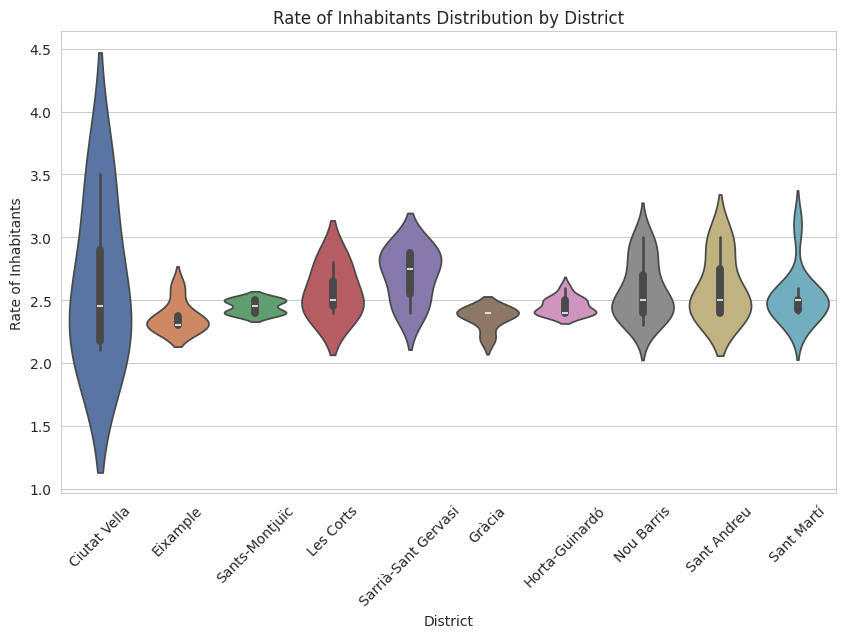

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Nom_Districte', y='Ocupacio_mitjana_persones_per_domicili', data=inhabitants_df, palette='deep')
plt.xticks(rotation=45)
plt.xlabel('District')
plt.ylabel('Rate of Inhabitants')
plt.title('Rate of Inhabitants Distribution by District')
plt.show()

In [ ]:
for district, data in inhabitants_df.groupby('Nom_Districte'):
  print(f"\nDistrict: {district}")

  #we will fit a Gaussian Mixture Model trying different components
  bic_values = []
  for n_components in range(1, 4):
      gmm = GaussianMixture(n_components=n_components, random_state=42)
      gmm.fit(data['Ocupacio_mitjana_persones_per_domicili'].values.reshape(-1, 1))
      bic_values.append(gmm.bic(data['Ocupacio_mitjana_persones_per_domicili'].values.reshape(-1, 1)))

  #optimal number of components based on BIC
  optimal_components = np.argmin(bic_values) + 1

  print("Optimal number of components (BIC):", optimal_components)

  if optimal_components > 1:
      print("The distribution is likely a mixture.")
  else:
      print("The distribution is likely a single component.")


District: Ciutat Vella
Optimal number of components (BIC): 3
The distribution is likely a mixture.

District: Eixample
Optimal number of components (BIC): 3
The distribution is likely a mixture.

District: Gràcia
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Horta-Guinardó
Optimal number of components (BIC): 3
The distribution is likely a mixture.

District: Les Corts
Optimal number of components (BIC): 3
The distribution is likely a mixture.

District: Nou Barris
Optimal number of components (BIC): 3
The distribution is likely a mixture.

District: Sant Andreu
Optimal number of components (BIC): 3
The distribution is likely a mixture.

District: Sant Martí


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Sants-Montjuïc
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Sarrià-Sant Gervasi
Optimal number of components (BIC): 3
The distribution is likely a mixture.


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  .fit(X)


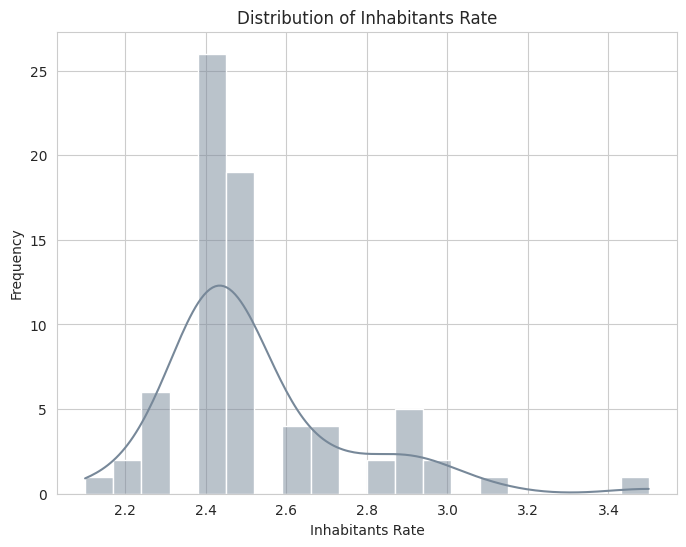

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(inhabitants_df['Ocupacio_mitjana_persones_per_domicili'], bins=20, kde=True, color='lightslategrey',)
plt.xlabel('Inhabitants Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Inhabitants Rate')
plt.show()

In [ ]:
unique_occupation_rates = inhabitants_df.groupby('Nom_Districte')['Ocupacio_mitjana_persones_per_domicili'].unique()
for district, rates in unique_occupation_rates.items():
  print(f"District: {district}")
  print(f"Unique Inhabitant Rates: {rates}")
  print()

District: Ciutat Vella
Unique Inhabitant Rates: [2.7 3.5 2.1 2.2]

District: Eixample
Unique Inhabitant Rates: [2.6 2.3 2.4]

District: Gràcia
Unique Inhabitant Rates: [2.4 2.2]

District: Horta-Guinardó
Unique Inhabitant Rates: [2.4 2.5 2.6]

District: Les Corts
Unique Inhabitant Rates: [2.4 2.5 2.8]

District: Nou Barris
Unique Inhabitant Rates: [2.4 2.7 2.5 2.3 3.  2.9]

District: Sant Andreu
Unique Inhabitant Rates: [2.9 2.6 3.  2.4 2.5]

District: Sant Martí
Unique Inhabitant Rates: [2.3 2.5 2.4 2.6 3.1]

District: Sants-Montjuïc
Unique Inhabitant Rates: [2.5 2.4]

District: Sarrià-Sant Gervasi
Unique Inhabitant Rates: [2.9 2.8 2.7 2.5 2.4]



#### Testing Sampling Method

In [ ]:
def generate_inhabitants1(district, dataset):

  if district == "L'Eixample":
    district = "Eixample"

  #we filter the dataset by district
  district_data = dataset[dataset['Nom_Districte'] == district].copy()

  #total number of domicilis in the district
  total_domicilis_district = district_data['Domicilis'].sum()

  #proportion of domicilis per neighborhood
  district_data['Probability'] = district_data['Domicilis'] / total_domicilis_district

  #we choose a neighborhood based on the proportions
  selected_neighborhood = np.random.choice(district_data.index, p=district_data['Probability'])

  #average inhabitants for the selected neighborhood and stdev for district
  avg_inhabitants = district_data.loc[selected_neighborhood, 'Ocupacio_mitjana_persones_per_domicili']
  std_dev = district_data['Ocupacio_mitjana_persones_per_domicili'].std()

  #generate the number of inhabitants for the selected neighborhood
  random_inhabitants = int(round(np.random.normal(avg_inhabitants, std_dev)))

  return random_inhabitants

district = "Ciutat Vella"
random_inhabitants = generate_inhabitants1(district, inhabitants_df)
print(f"For the district {district}, the generated number of inhabitants is: {random_inhabitants}")

For the district Ciutat Vella, the generated number of inhabitants is: 1


Now we will validate our function visually and through the Kolmogorov-Smirnov test.

<ipython-input-79-e22a906ee828>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


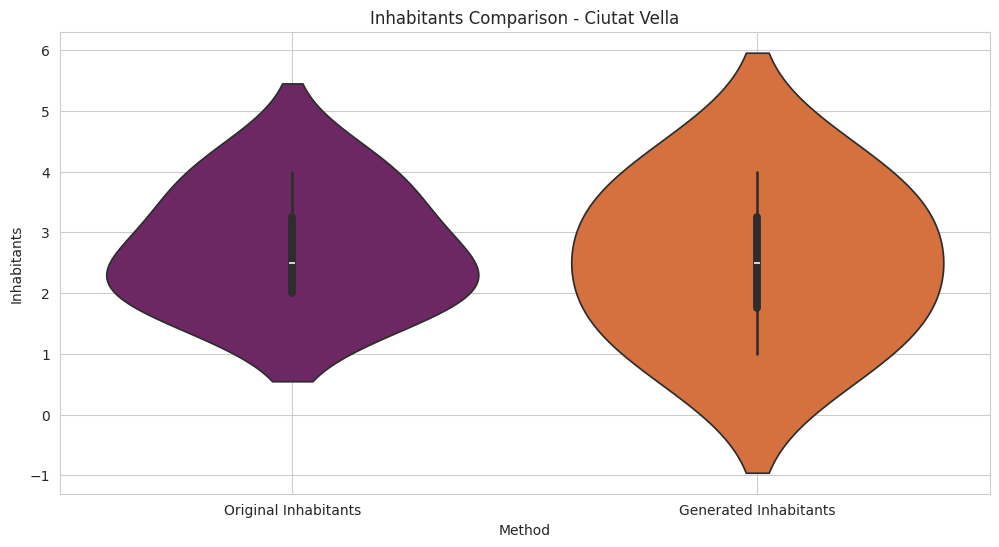

<ipython-input-79-e22a906ee828>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


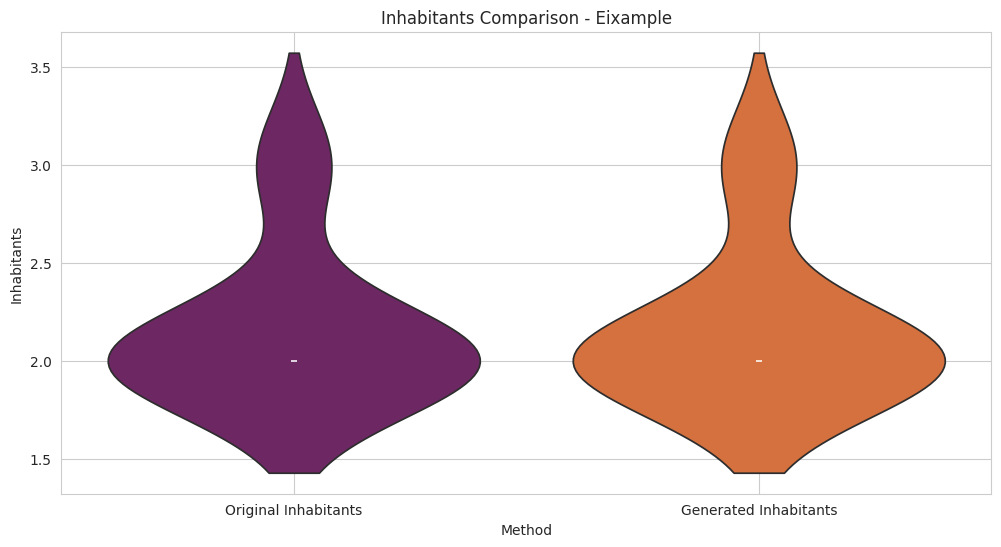

<ipython-input-79-e22a906ee828>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


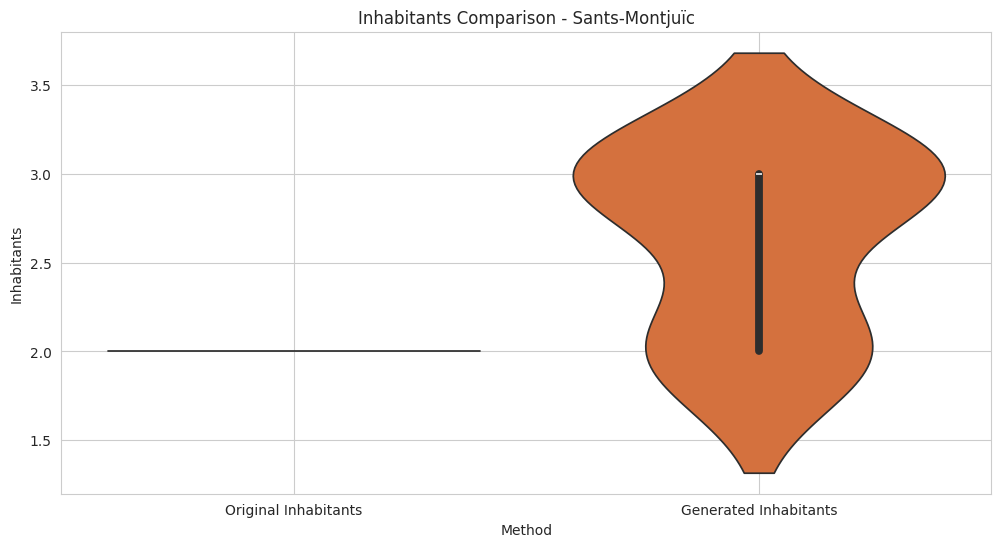

<ipython-input-79-e22a906ee828>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


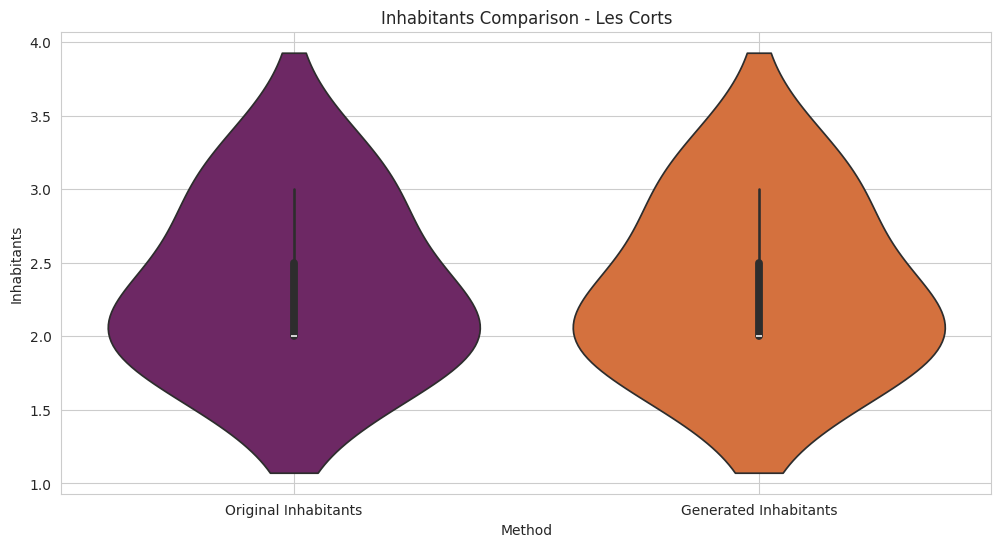

<ipython-input-79-e22a906ee828>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


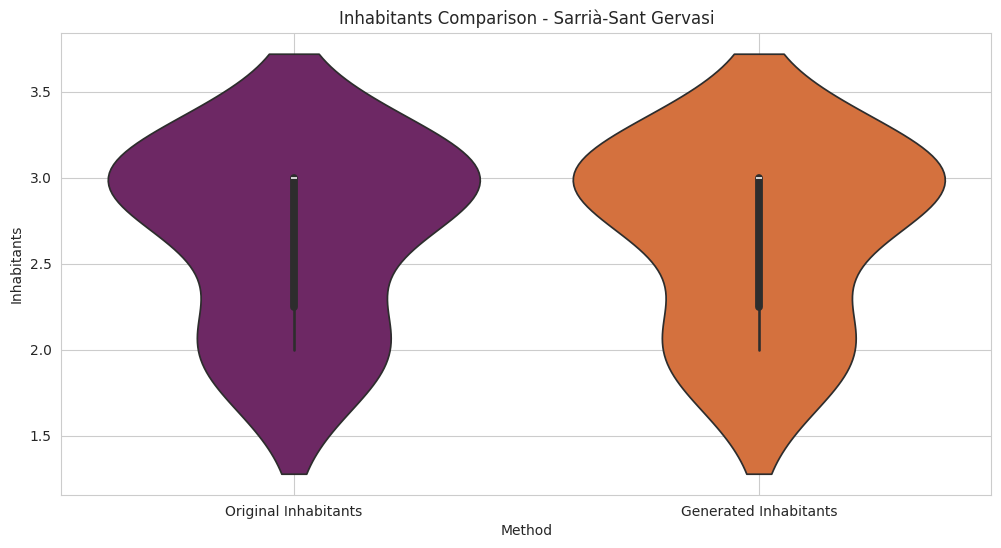

<ipython-input-79-e22a906ee828>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


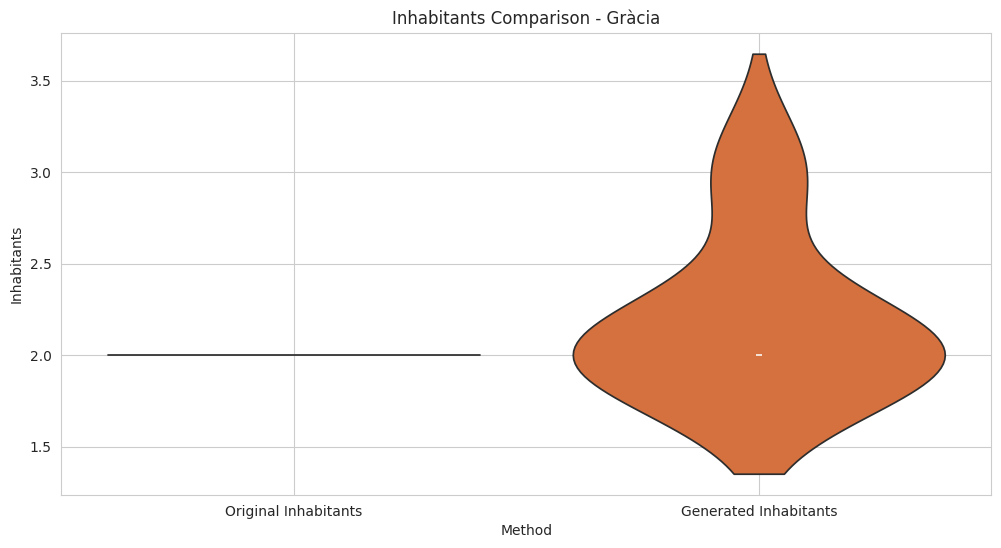

<ipython-input-79-e22a906ee828>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


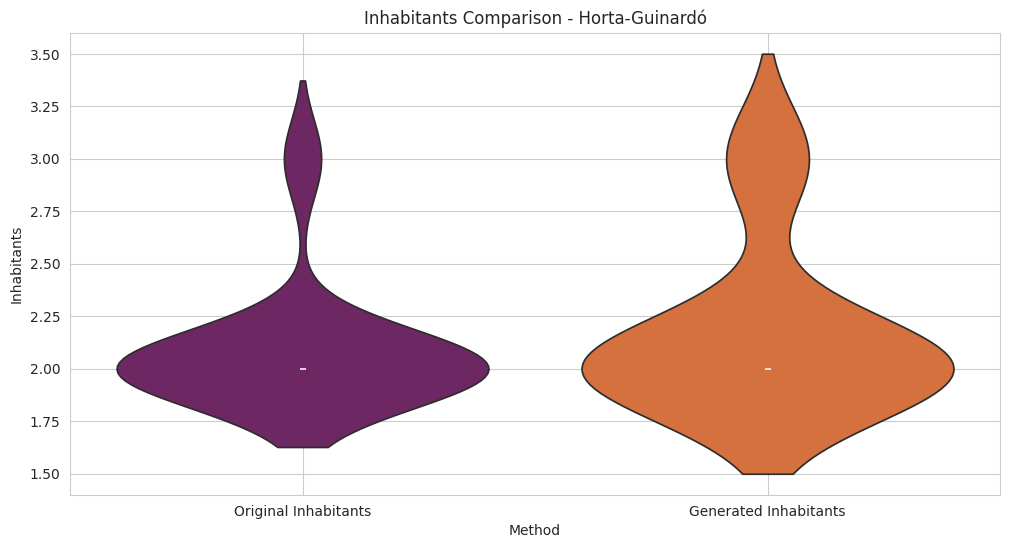

<ipython-input-79-e22a906ee828>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


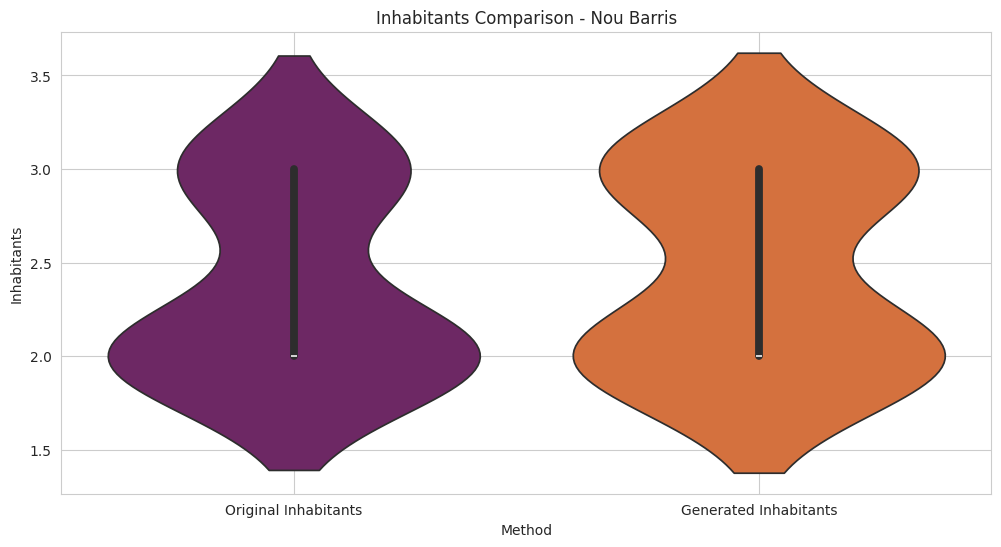

<ipython-input-79-e22a906ee828>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


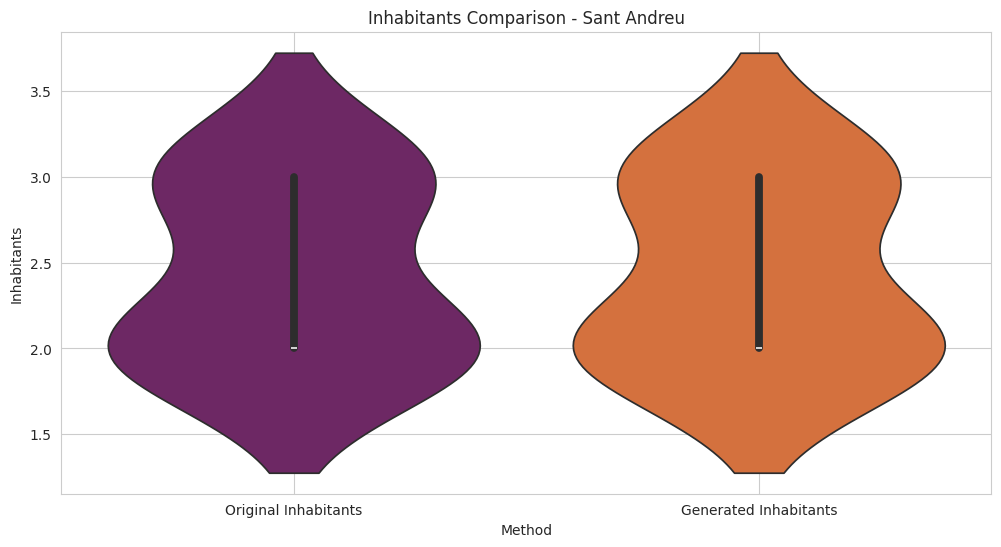

<ipython-input-79-e22a906ee828>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


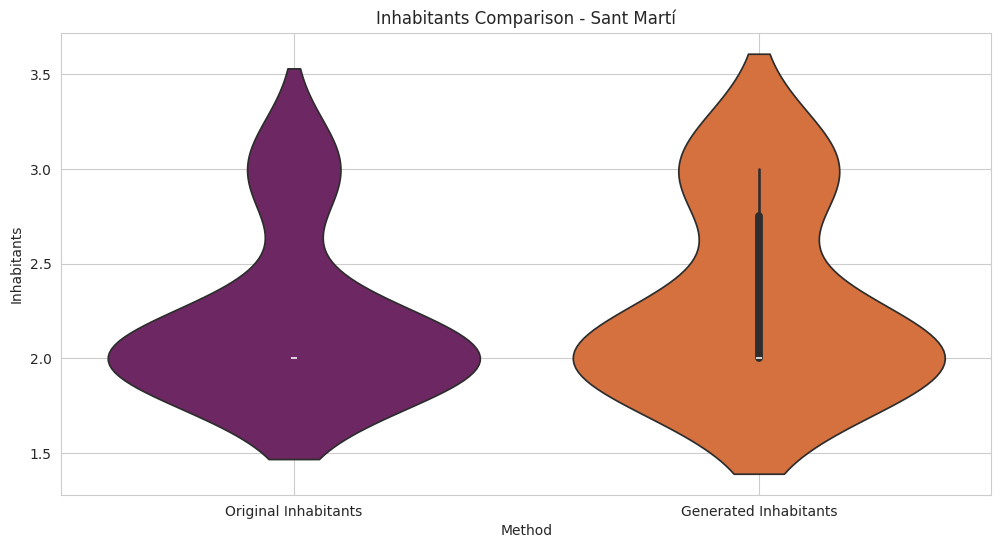

In [ ]:
sns.set_style("whitegrid")
color_palette = 'inferno'

#for each district
for district in inhabitants_df['Nom_Districte'].unique():
  #original inhabitants
  original_values = round(inhabitants_df[inhabitants_df['Nom_Districte'] == district]['Ocupacio_mitjana_persones_per_domicili'])

  #generated inhabitants
  generated_values = [generate_inhabitants1(district, inhabitants_df) for _ in range(len(original_values))]

  #concatenate for the violin plot
  inhabitants = np.concatenate([original_values, generated_values])
  methods_labels = ['Original Inhabitants'] * len(original_values) + ['Generated Inhabitants'] * len(original_values)
  data = {'Method': methods_labels, 'Inhabitants': inhabitants}
  df = pd.DataFrame(data)

  #violin plot
  plt.figure(figsize=(12, 6))
  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)
  plt.xlabel('Method')
  plt.ylabel('Inhabitants')
  plt.title(f'Inhabitants Comparison - {district}')
  plt.grid(True)
  plt.show()

In [ ]:
def perform_ks_test(original_data, generated_data, district_name, alpha=0.05):
  #2-sample Kolmogorov-Smirnov test
  ks_statistic, p_value = ks_2samp(original_data, generated_data)

  #results
  print(f"\nKolmogorov-Smirnov statistic for {district_name}: {ks_statistic}")
  print(f"P-value: {p_value}")

  #reject or not null hypothesis
  if p_value < alpha:
    print(f"Reject null hypothesis for {district_name}: Distributions are different.")
  else:
    print(f"Fail to reject null hypothesis for {district_name}: Distributions are similar.")

#for district
for district in inhabitants_df['Nom_Districte'].unique():
  #original inhabitants
  original_values = round(inhabitants_df[inhabitants_df['Nom_Districte'] == district]['Ocupacio_mitjana_persones_per_domicili'])

  #generated inhabitants
  generated_values = [generate_inhabitants1(district, inhabitants_df) for _ in range(len(original_values))]

  #2sample Kolmogorov-Smirnov test
  perform_ks_test(original_values, generated_values, district, alpha=0.05)


Kolmogorov-Smirnov statistic for Ciutat Vella: 0.25
P-value: 1.0
Fail to reject null hypothesis for Ciutat Vella: Distributions are similar.

Kolmogorov-Smirnov statistic for Eixample: 0.16666666666666666
P-value: 0.9999999999999998
Fail to reject null hypothesis for Eixample: Distributions are similar.

Kolmogorov-Smirnov statistic for Sants-Montjuïc: 0.625
P-value: 0.08702408702408701
Fail to reject null hypothesis for Sants-Montjuïc: Distributions are similar.

Kolmogorov-Smirnov statistic for Les Corts: 0.6666666666666666
P-value: 0.6
Fail to reject null hypothesis for Les Corts: Distributions are similar.

Kolmogorov-Smirnov statistic for Sarrià-Sant Gervasi: 0.16666666666666666
P-value: 0.9999999999999998
Fail to reject null hypothesis for Sarrià-Sant Gervasi: Distributions are similar.

Kolmogorov-Smirnov statistic for Gràcia: 0.0
P-value: 1.0
Fail to reject null hypothesis for Gràcia: Distributions are similar.

Kolmogorov-Smirnov statistic for Horta-Guinardó: 0.09090909090909

<ipython-input-80-283f87cc3f25>:3: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_statistic, p_value = ks_2samp(original_data, generated_data)


#### Sampling method usage

In [ ]:
#example of usage:
district = 'Ciutat Vella'
for i in range(10):
  inhabitants = generate_inhabitants1(district, inhabitants_df)
  print(f"Iteration {i+1}: Inhabitants for a random neighborhood in {district}: {inhabitants:.2f}")

Iteration 1: Inhabitants for a random neighborhood in Ciutat Vella: 1.00
Iteration 2: Inhabitants for a random neighborhood in Ciutat Vella: 3.00
Iteration 3: Inhabitants for a random neighborhood in Ciutat Vella: 2.00
Iteration 4: Inhabitants for a random neighborhood in Ciutat Vella: 3.00
Iteration 5: Inhabitants for a random neighborhood in Ciutat Vella: 3.00
Iteration 6: Inhabitants for a random neighborhood in Ciutat Vella: 2.00
Iteration 7: Inhabitants for a random neighborhood in Ciutat Vella: 1.00
Iteration 8: Inhabitants for a random neighborhood in Ciutat Vella: 2.00
Iteration 9: Inhabitants for a random neighborhood in Ciutat Vella: 3.00
Iteration 10: Inhabitants for a random neighborhood in Ciutat Vella: 2.00


### Dataset 2

Now we will use this [dataset](https://ajuntament.barcelona.cat/estadistica/castella/Estadistiques_per_temes/Poblacio_i_demografia/Poblacio/Enquesta_sociodemografica/esd2020/habitatges/t11.htm) from the "Ajuntament de Barcelona" which gives the percentages of houses with inhabitants from 1 to 6 or more. Then we will compare the generated data from both datasets.

#### Data Exploration

In [ ]:
file_path = '/content/drive/MyDrive/TFG/Data/2020_inhabitants_data.csv'

#we read the CSV file into a DataFrame
inhabitants_df2 = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter = ';')

display(inhabitants_df2.head(5))

Distrito     (n)   TOTAL   1 persona 2  personas 3  personas  \
0       BARCELONA    4671     100     20.72       37.04       20.72     
1    Ciutat Vella     365     100     25.80       32.40       23.04     
2        Eixample     531     100     18.30       41.53       19.76     
3  Sants-Montjuïc     485     100     22.97       36.80       20.89     
4       Les Corts     173     100     18.39       35.63       17.99     

  4  personas 5  personas 6 o más  personas  \
0     15.35        4.93              1.24     
1     11.42        5.23              2.12     
2     14.64        4.94              0.84     
3     14.92        2.97              1.46     
4     18.85        7.85              1.29     

  Ocupación media  (personas/vivienda)  
0                               2.51    
1                               2.45    
2                               2.49    
3                               2.43    
4                               2.66

In [ ]:
#the csv was badly imported and this is to clean and prepare it
inhabitants_df2.columns = ['Distrito', '(n)', 'TOTAL', '1 persona', '2 personas', '3 personas',
                           '4 personas', '5 personas', '6 o más personas', 'Ocupación media (personas/vivienda)']

inhabitants_df2['Distrito'] = inhabitants_df2['Distrito'].str.strip()

inhabitants_df2 = inhabitants_df2[inhabitants_df2['Distrito'] != 'BARCELONA']

display(inhabitants_df2.head(5))

Distrito    (n)  TOTAL 1 persona 2 personas 3 personas 4 personas  \
1       Ciutat Vella  365    100     25.80      32.40      23.04      11.42     
2           Eixample  531    100     18.30      41.53      19.76      14.64     
3     Sants-Montjuïc  485    100     22.97      36.80      20.89      14.92     
4          Les Corts  173    100     18.39      35.63      17.99      18.85     
5  Sarrià-St Gervasi  556    100     21.71      33.40      19.42      15.36     

  5 personas 6 o más personas Ocupación media (personas/vivienda)  
1     5.23             2.12                                2.45    
2     4.94             0.84                                2.49    
3     2.97             1.46                                2.43    
4     7.85             1.29                                2.66    
5     7.83             2.28                                2.62

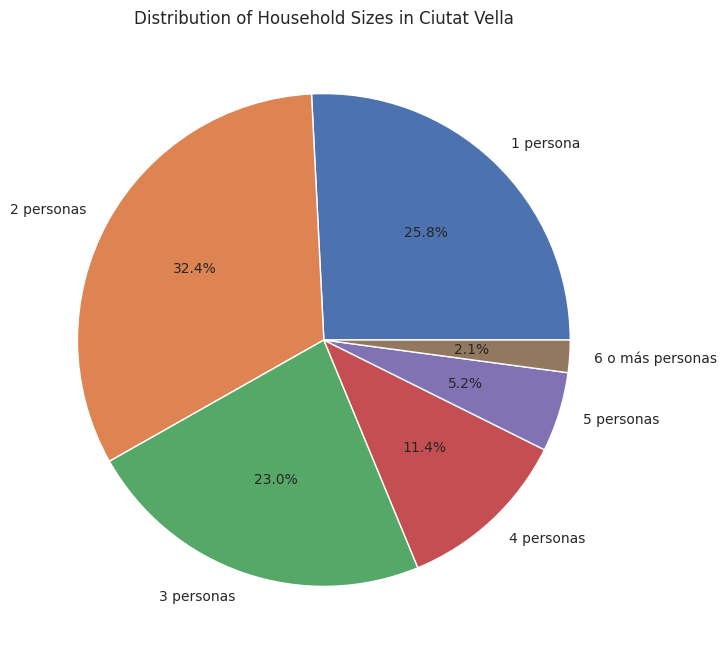

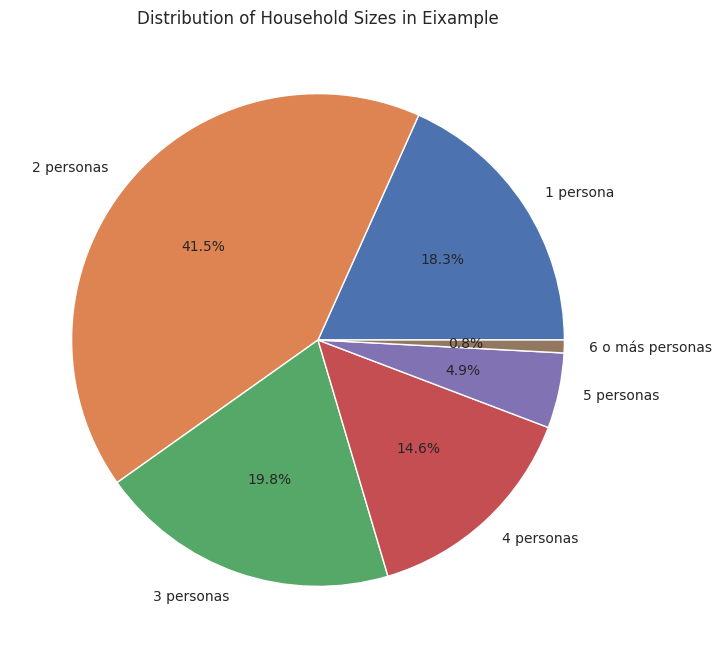

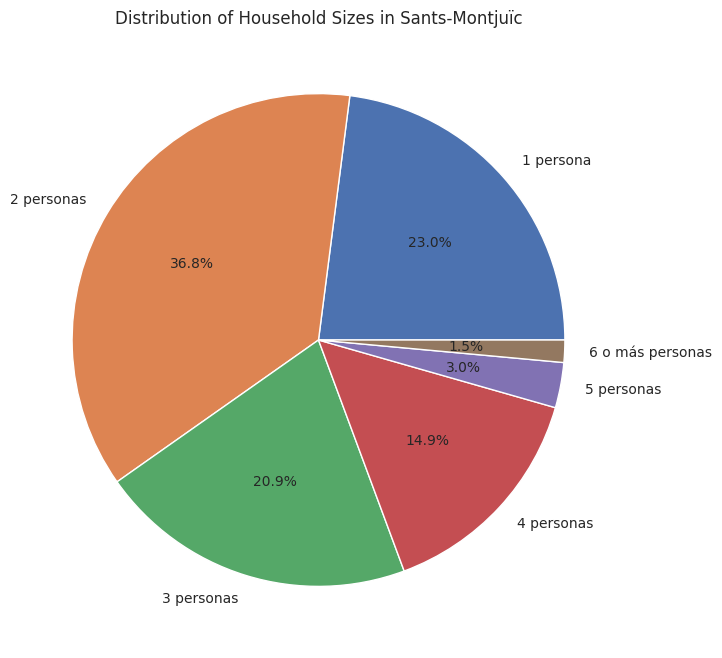

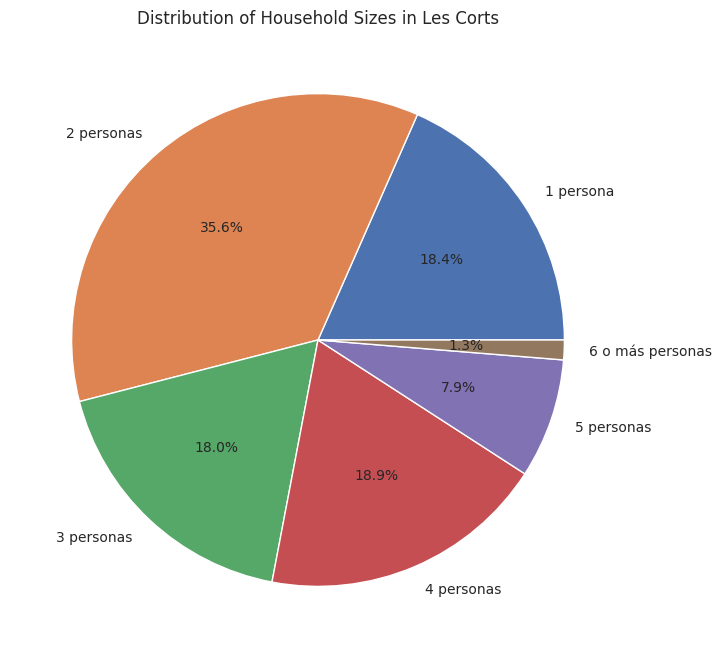

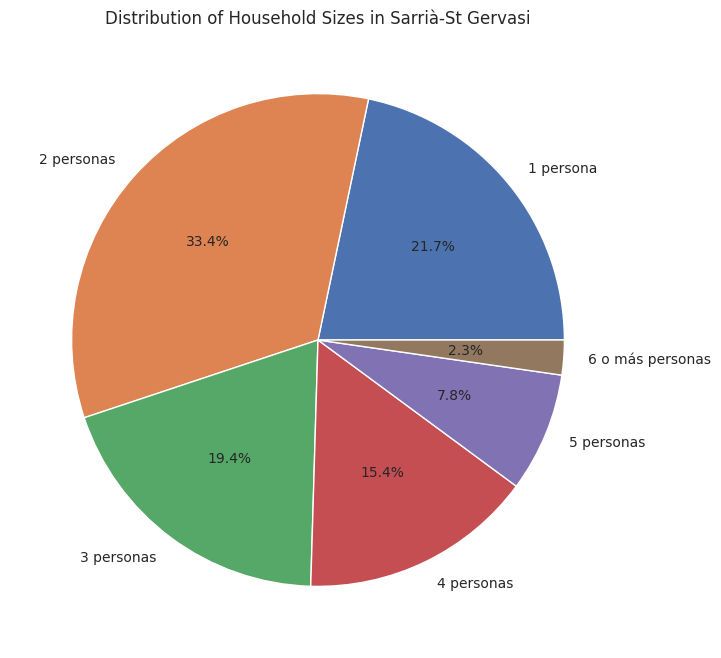

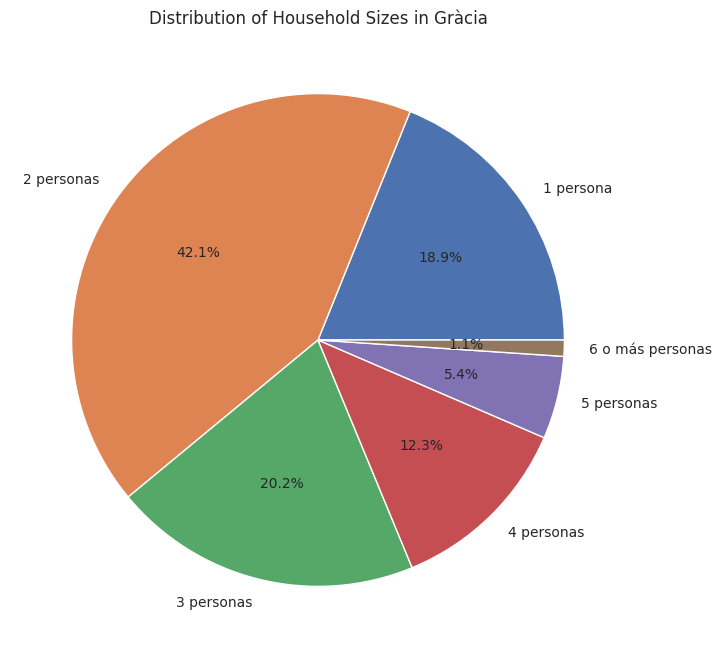

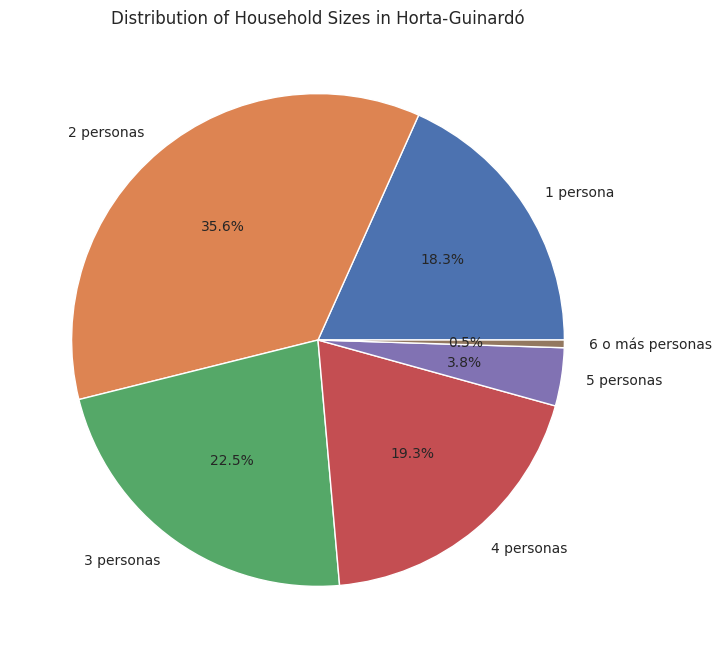

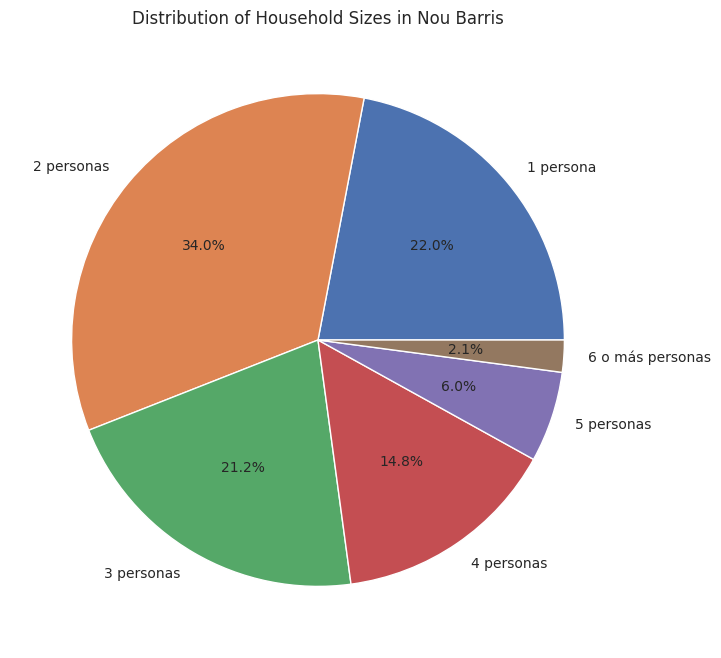

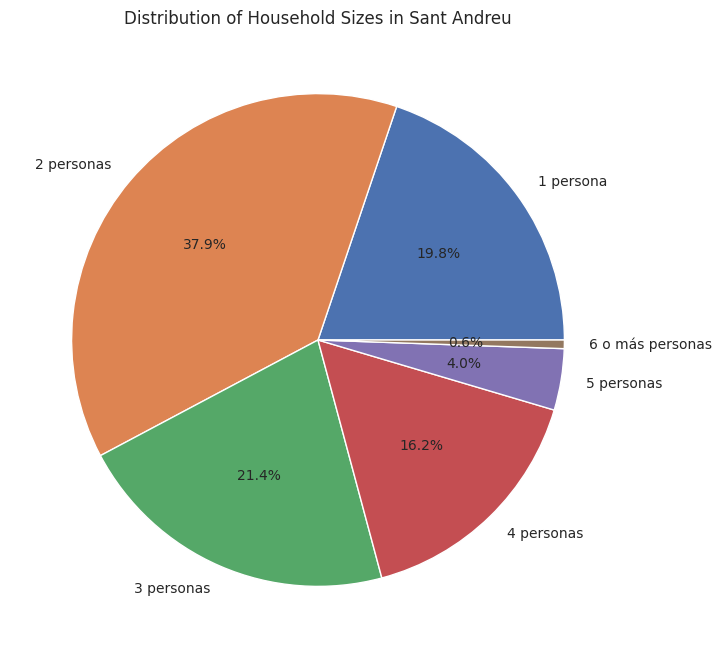

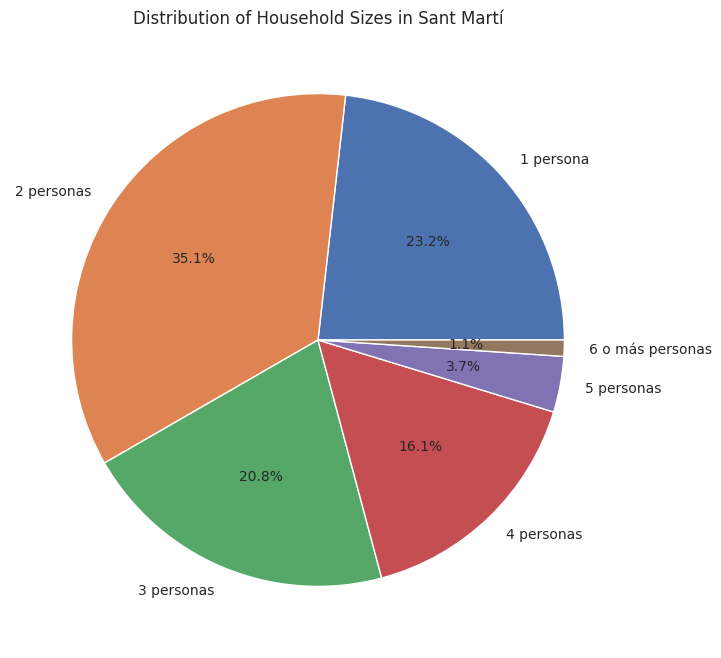

In [ ]:
#Seaborn style
sns.set_style("whitegrid")

#unique district names
districts_to_analyze = inhabitants_df2['Distrito'].unique()

#for district
for district_name in districts_to_analyze:
  #data for the district
  district_data = inhabitants_df2[inhabitants_df2['Distrito'] == district_name]

  #relevant columns for household sizes
  household_sizes = district_data[['1 persona', '2 personas', '3 personas', '4 personas', '5 personas', '6 o más personas']].iloc[0]

  #pie chart with
  plt.figure(figsize=(8, 8))
  plt.pie(household_sizes, labels=['1 persona', '2 personas', '3 personas', '4 personas', '5 personas', '6 o más personas'], autopct='%1.1f%%', colors=sns.color_palette("deep"))
  plt.title(f'Distribution of Household Sizes in {district_name}')
  plt.show()

#### Data Sampling Method

Now we will implement the inhabitants generator for this dataset.

In [ ]:
def generate_inhabitants2(district, dataset):
  if district == "L'Eixample":
    district = "Eixample"

  if district == "Sarrià-Sant Gervasi":
    district = "Sarrià-St Gervasi"

  district_data = dataset[dataset['Distrito'] == district].iloc[0]

  #proportions
  household_percentages = district_data[['1 persona', '2 personas', '3 personas', '4 personas', '5 personas', '6 o más personas']].astype(float)

  #normalize the proportions to sum to 1
  probabilities = household_percentages / household_percentages.sum()

  #select a household size based on the proportions
  household_size = np.random.choice(household_percentages.index, p=probabilities)

  #if size is '6 o más personas'
  if household_size == '6 o más personas':
    num_inhabitants = 6
    while num_inhabitants < 10 and random.random() < 0.2:
      num_inhabitants += 1
  else:
    num_inhabitants = int(household_size.split()[0])

  return num_inhabitants


In [ ]:
#example of usage:
district = 'Ciutat Vella'
for i in range(10):
  inhabitants = generate_inhabitants2(district, inhabitants_df2)
  print(f"Iteration {i+1}: Inhabitants for a random neighborhood in {district}: {inhabitants:.2f}")

Iteration 1: Inhabitants for a random neighborhood in Ciutat Vella: 3.00
Iteration 2: Inhabitants for a random neighborhood in Ciutat Vella: 2.00
Iteration 3: Inhabitants for a random neighborhood in Ciutat Vella: 3.00
Iteration 4: Inhabitants for a random neighborhood in Ciutat Vella: 3.00
Iteration 5: Inhabitants for a random neighborhood in Ciutat Vella: 4.00
Iteration 6: Inhabitants for a random neighborhood in Ciutat Vella: 5.00
Iteration 7: Inhabitants for a random neighborhood in Ciutat Vella: 3.00
Iteration 8: Inhabitants for a random neighborhood in Ciutat Vella: 1.00
Iteration 9: Inhabitants for a random neighborhood in Ciutat Vella: 1.00
Iteration 10: Inhabitants for a random neighborhood in Ciutat Vella: 2.00


### Comparison of generated values for both datasets

Now we will compare the generated values for the method of each dataset. By looking at their violin plots and aplying the 2-sample Kolmogorov-Smirnov test.

<ipython-input-87-da4c63347829>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


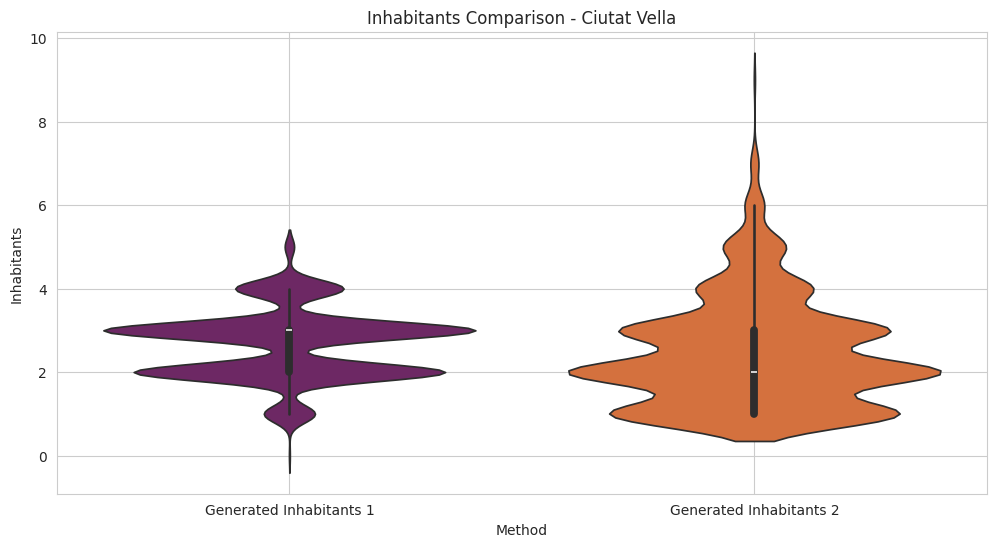

<ipython-input-87-da4c63347829>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


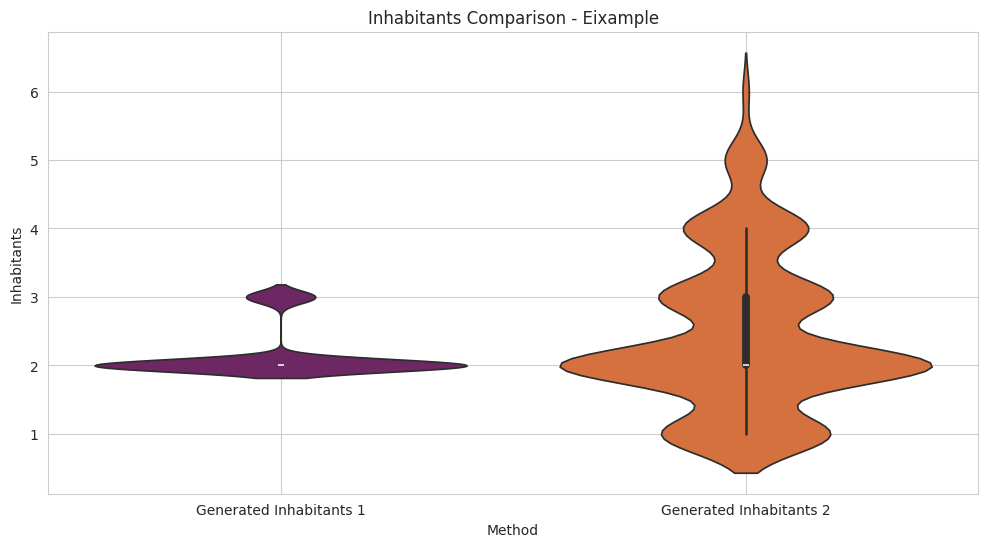

<ipython-input-87-da4c63347829>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


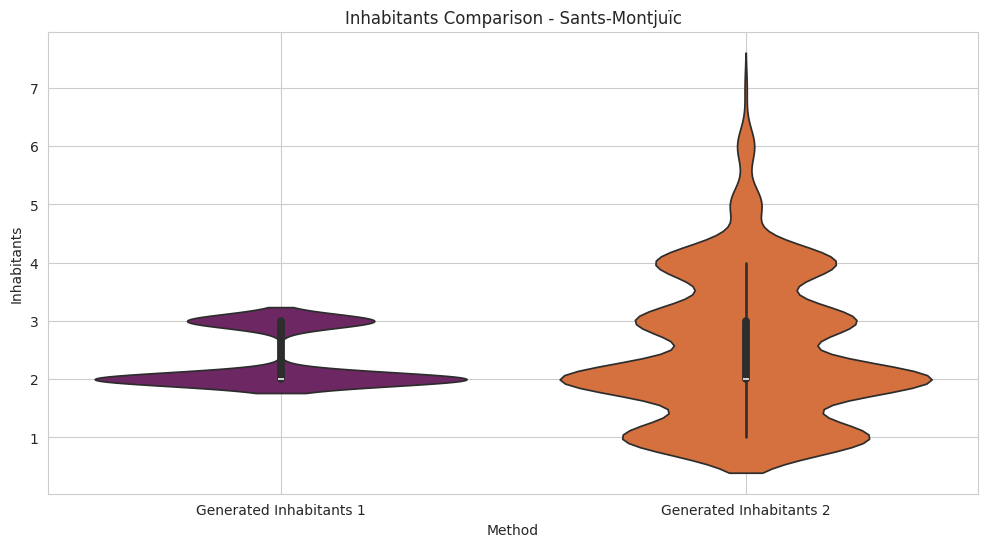

<ipython-input-87-da4c63347829>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


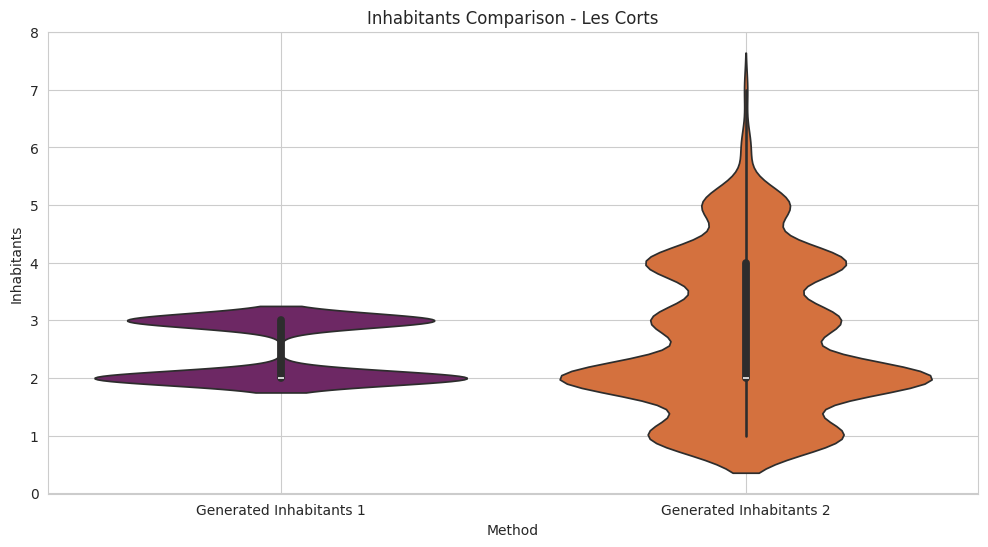

<ipython-input-87-da4c63347829>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


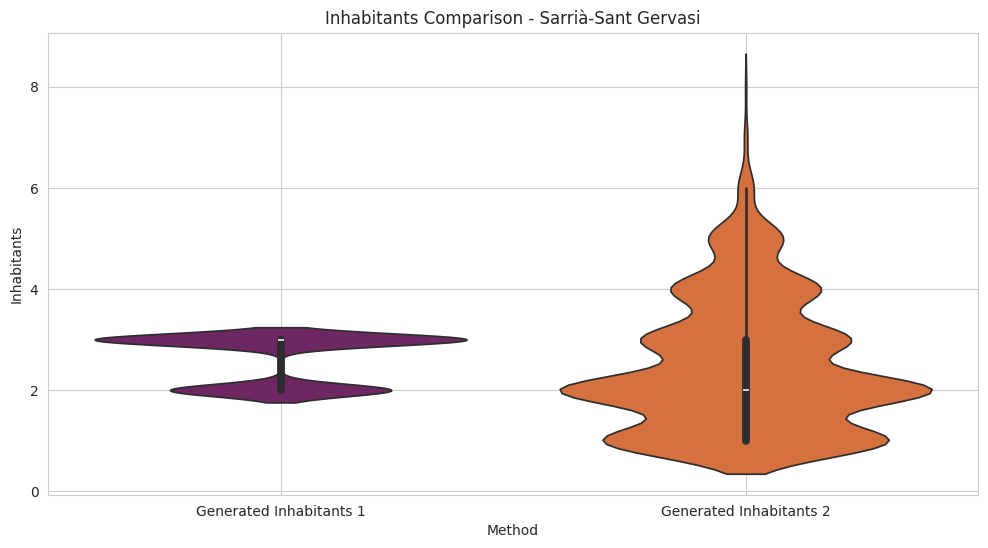

<ipython-input-87-da4c63347829>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


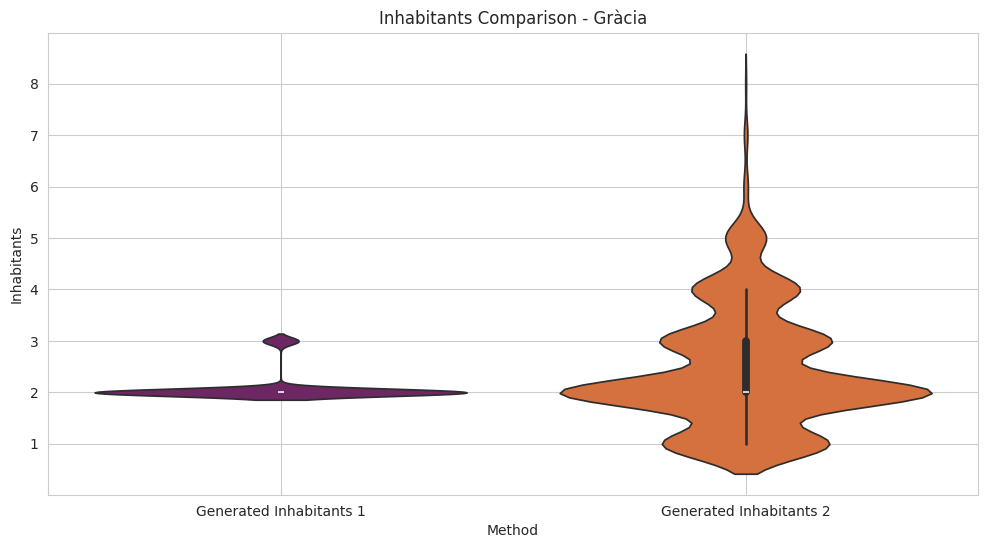

<ipython-input-87-da4c63347829>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


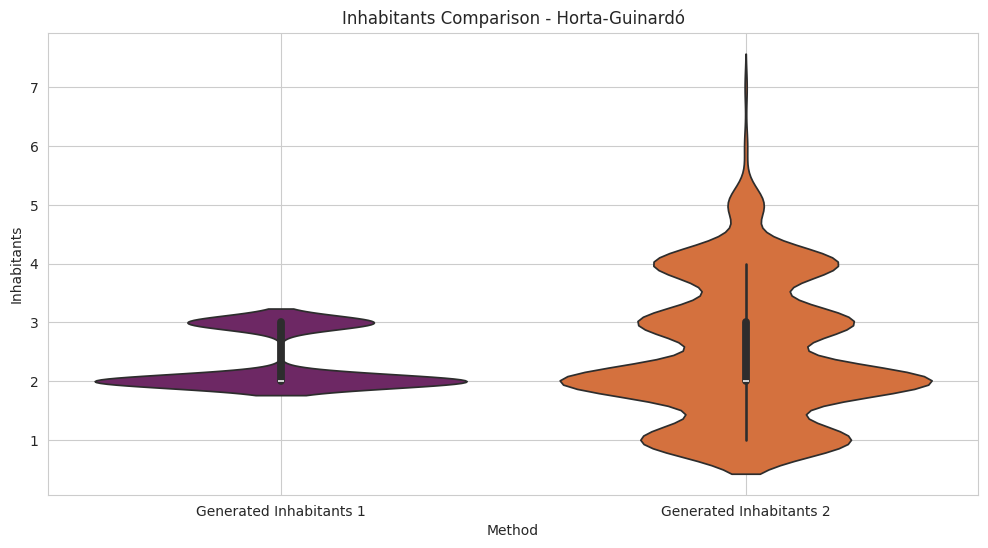

<ipython-input-87-da4c63347829>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


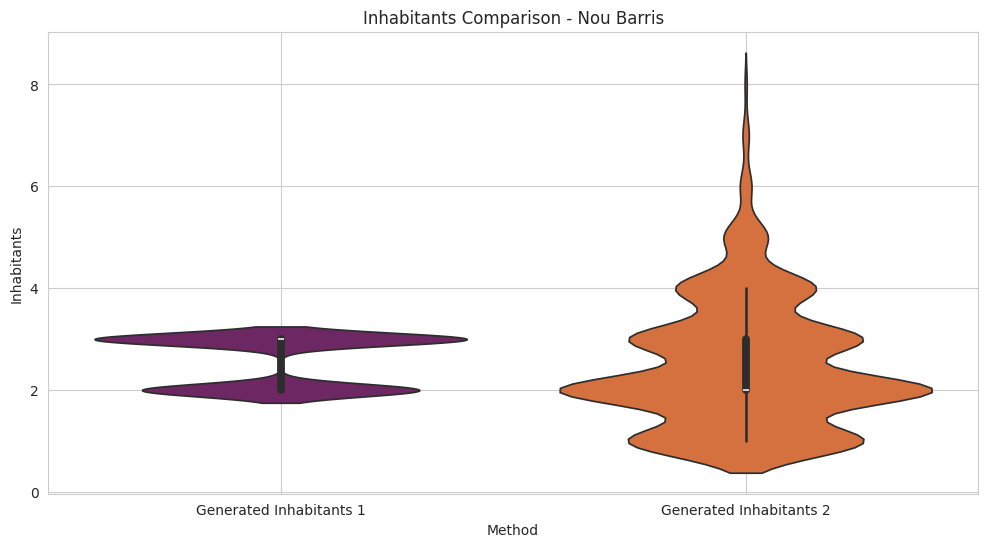

<ipython-input-87-da4c63347829>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


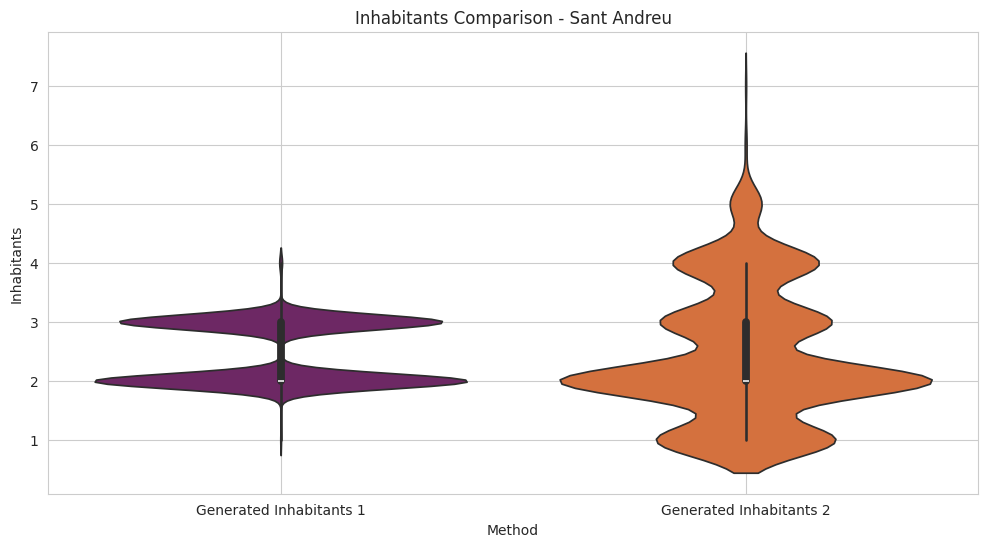

<ipython-input-87-da4c63347829>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)


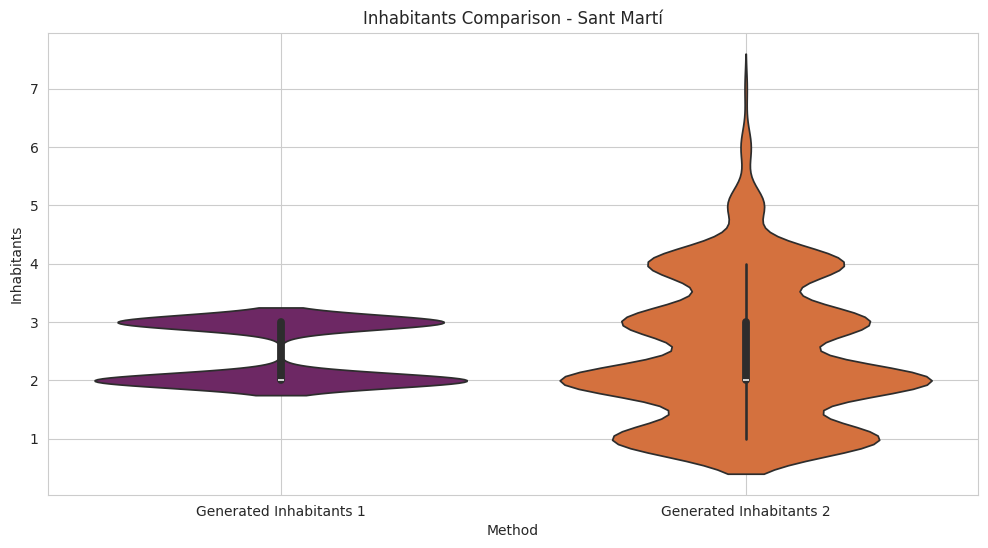

In [ ]:
sns.set_style("whitegrid")
color_palette = 'inferno'

#for district
for district in inhabitants_df['Nom_Districte'].unique():
  #generated inhabitants for both methods
  generated_values1 = [generate_inhabitants1(district, inhabitants_df) for _ in range(1000)]
  generated_values2 = [generate_inhabitants2(district, inhabitants_df2) for _ in range(1000)]

  #concatenate for plot
  inhabitants = np.concatenate([generated_values1, generated_values2])
  methods_labels = ['Generated Inhabitants 1'] * len(generated_values1) + ['Generated Inhabitants 2'] * len(generated_values2)
  data = {'Method': methods_labels, 'Inhabitants': inhabitants}
  df = pd.DataFrame(data)

  #violin plot
  plt.figure(figsize=(12, 6))
  sns.violinplot(x='Method', y='Inhabitants', data=df, palette=color_palette)
  plt.xlabel('Method')
  plt.ylabel('Inhabitants')
  plt.title(f'Inhabitants Comparison - {district}')
  plt.grid(True)
  plt.show()

In [ ]:
#for district
for district in inhabitants_df['Nom_Districte'].unique():
  #generated inhabitants for both methods
  generated_values1 = [generate_inhabitants1(district, inhabitants_df) for _ in range(1000)]
  generated_values2 = [generate_inhabitants2(district, inhabitants_df2) for _ in range(1000)]

  #2sample Kolmogorov-Smirnov test
  perform_ks_test(generated_values1, generated_values2, district, alpha=0.05)


Kolmogorov-Smirnov statistic for Ciutat Vella: 0.208
P-value: 2.4178548709800775e-19
Reject null hypothesis for Ciutat Vella: Distributions are different.

Kolmogorov-Smirnov statistic for Eixample: 0.255
P-value: 5.77199391392635e-29
Reject null hypothesis for Eixample: Distributions are different.

Kolmogorov-Smirnov statistic for Sants-Montjuïc: 0.219
P-value: 2.0545862271954644e-21
Reject null hypothesis for Sants-Montjuïc: Distributions are different.

Kolmogorov-Smirnov statistic for Les Corts: 0.283
P-value: 1.1405545071561369e-35
Reject null hypothesis for Les Corts: Distributions are different.

Kolmogorov-Smirnov statistic for Sarrià-Sant Gervasi: 0.269
P-value: 3.1690847643253713e-32
Reject null hypothesis for Sarrià-Sant Gervasi: Distributions are different.

Kolmogorov-Smirnov statistic for Gràcia: 0.304
P-value: 3.5000098011524194e-41
Reject null hypothesis for Gràcia: Distributions are different.

Kolmogorov-Smirnov statistic for Horta-Guinardó: 0.235
P-value: 1.2696120

After observing both methods we can conclude that the distributions for the generated values are different. We will continue working with the method for dataset 2, further explanations on this decision will be documented on the final report.

### Final Inhabitants Generation Method

In [ ]:
#redefine the selected method with a new name
def generate_inhabitants(district, dataset):
  if district == "L'Eixample":
    district = "Eixample"

  if district == "Sarrià-Sant Gervasi":
    district = "Sarrià-St Gervasi"

  district_data = dataset[dataset['Distrito'] == district].iloc[0]

  household_percentages = district_data[['1 persona', '2 personas', '3 personas', '4 personas', '5 personas', '6 o más personas']].astype(float)

  probabilities = household_percentages / household_percentages.sum()

  household_size = np.random.choice(household_percentages.index, p=probabilities)

  if household_size == '6 o más personas':
    num_inhabitants = 6
    while num_inhabitants < 10 and random.random() < 0.2:
        num_inhabitants += 1
  else:
    num_inhabitants = int(household_size.split()[0])

  return num_inhabitants


In [ ]:
#example of usage:
district = 'Ciutat Vella'
for i in range(10):
  inhabitants = generate_inhabitants(district, inhabitants_df2)
  print(f"Iteration {i+1}: Inhabitants for a random neighborhood in {district}: {inhabitants:.2f}")

Iteration 1: Inhabitants for a random neighborhood in Ciutat Vella: 4.00
Iteration 2: Inhabitants for a random neighborhood in Ciutat Vella: 4.00
Iteration 3: Inhabitants for a random neighborhood in Ciutat Vella: 2.00
Iteration 4: Inhabitants for a random neighborhood in Ciutat Vella: 1.00
Iteration 5: Inhabitants for a random neighborhood in Ciutat Vella: 1.00
Iteration 6: Inhabitants for a random neighborhood in Ciutat Vella: 1.00
Iteration 7: Inhabitants for a random neighborhood in Ciutat Vella: 3.00
Iteration 8: Inhabitants for a random neighborhood in Ciutat Vella: 2.00
Iteration 9: Inhabitants for a random neighborhood in Ciutat Vella: 3.00
Iteration 10: Inhabitants for a random neighborhood in Ciutat Vella: 1.00


## 2.2 Typology

Now we will fill in the Description (or typology) Variable, for that we will use the data obtained in ([Household Structure](https://ajuntament.barcelona.cat/estadistica/angles/Anuaris/Anuaris/anuari19/cap02/C020302.htm )) and based on the occupation and the district we will set a typology based on the proportion for each case.

In [ ]:
file_path = '/content/drive/MyDrive/TFG/Data/2018_tipologias_hogar_def.csv'

#we read the CSV file into a DataFrame
typology_df = pd.read_csv(file_path, delimiter=';', usecols=[0, 1, 2, 3])

typology_df = typology_df.dropna()

display(typology_df.head(20))

Distrito                                          Tipologia  \
0   Ciutat Vella                     Una mujer sola de 18 a 64 años   
1   Ciutat Vella                     Un hombre solo de 18 a 64 años   
2   Ciutat Vella                    Una mujer sola de 65 años y más   
3   Ciutat Vella                    Un hombre solo de 65 años y más   
4   Ciutat Vella                       Dos personas de 18 a 64 años   
5   Ciutat Vella                      Dos personas de 65 años y más   
6   Ciutat Vella   Dos personas: una de 18-64 años y la otra de ...   
7   Ciutat Vella       Dos personas o más: todas mayores de 18 años   
8   Ciutat Vella   Dos personas o más: una mujer de 18 años y má...   
9   Ciutat Vella   Dos personas o más: una mujer de 18 años y má...   
10  Ciutat Vella   Dos personas o más: un hombre de 18 años y má...   
11  Ciutat Vella   Dos personas o más: un hombre de 18 años y má...   
12  Ciutat Vella   Tres personas o más: dos de 18 años y más y e...   
13      Eixample                     Una mujer sola de 18 a 64 años   
14      Eixample                     Un hombre solo de 18 a 64 años   
15      Eixample                    Una mujer sola de 65 años y más   
16      Eixample                    Un hombre solo de 65 años y más   
17      Eixample                       Dos personas de 18 a 64 años   
18      Eixample                      Dos personas de 65 años y más   
19      Eixample   Dos personas: una de 18-64 años y la otra de ...   

     Cantidad   Ocupación  
0      5144.0         1.0  
1      6295.0         1.0  
2      3041.0         1.0  
3      1413.0         1.0  
4      7075.0         2.0  
5      1569.0         2.0  
6      1788.0         2.0  
7      7159.0         3.0  
8       850.0         2.0  
9       850.0         3.0  
10      157.0         2.0  
11      157.0         3.0  
12     3195.0         3.0  
13    11137.0         1.0  
14    10593.0         1.0  
15    12579.0         1.0  
16     3775.0         1.0  
17    15108.0         2.0  
18     9363.0         2.0  
19     6394.0         2.0

In [ ]:
def get_typology_and_inhabitants(district, dataset_inhabitants, dataset_typology):
  #we calculate the occupation rate for the given district
  inhabitants_rate = generate_inhabitants(district, dataset_inhabitants)

  if district == "L'Eixample":
    district = "Eixample"

  #we filter dataset_typology by the specified district
  district_data = dataset_typology[dataset_typology['Distrito'] == district].copy()

  #we filter district_data based on the resulting occupation rate
  if inhabitants_rate == 1:
      district_data = district_data[district_data[' Ocupación'] == 1]
  elif inhabitants_rate == 2:
      district_data = district_data[district_data[' Ocupación'] == 2]
  elif inhabitants_rate >= 3:
      district_data = district_data[district_data[' Ocupación'] == 3]

  #we calculate the sum of Cantidad per row to have the probabilities
  total_amount = district_data[' Cantidad'].sum()
  district_data['Probability'] = district_data[' Cantidad'] / total_amount

  #we randomly select a typology based on the calculated probabilities
  selected_typology = np.random.choice(district_data[' Tipologia'], p=district_data['Probability'])

  return selected_typology, inhabitants_rate

#example of usage:
district = "L'Eixample"
for i in range(10):
  typology, inhabitants_rate = get_typology_and_inhabitants(district, inhabitants_df2, typology_df)
  print(f"Iteration {i+1}: For district {district}, the selected typology is: '{typology}' with {inhabitants_rate} inhabitants.")

Iteration 1: For district L'Eixample, the selected typology is: ' Una mujer sola de 18 a 64 años' with 1 inhabitants.
Iteration 2: For district L'Eixample, the selected typology is: ' Tres personas o más: dos de 18 años y más y el resto menores de 18 años' with 3 inhabitants.
Iteration 3: For district L'Eixample, the selected typology is: ' Dos personas o más: todas mayores de 18 años' with 3 inhabitants.
Iteration 4: For district L'Eixample, the selected typology is: ' Tres personas o más: dos de 18 años y más y el resto menores de 18 años' with 5 inhabitants.
Iteration 5: For district L'Eixample, the selected typology is: ' Dos personas de 18 a 64 años' with 2 inhabitants.
Iteration 6: For district L'Eixample, the selected typology is: ' Una mujer sola de 65 años y más' with 1 inhabitants.
Iteration 7: For district L'Eixample, the selected typology is: ' Dos personas de 65 años y más' with 2 inhabitants.
Iteration 8: For district L'Eixample, the selected typology is: ' Una mujer sola

##2.3 Ages

Finally we will get the different ages of the domestic unit based on the home typology and the age distribution per district. Using a dataset from Barcelona Open Data ([Ages](https://opendata-ajuntament.barcelona.cat/data/es/dataset/pad_mdbas_edat-1/resource/05eae2b9-198a-47eb-9923-ce8fd3078fda)) that gives us the amount of persons with each age per neighborhood.

In [ ]:
file_path = '/content/drive/MyDrive/TFG/Data/2023_pad_mdbas_edat-1.csv'

#we read the CSV file into a DataFrame
ages_df = pd.read_csv(file_path)

ages_df = ages_df.dropna()
ages_df['Valor'] = pd.to_numeric(ages_df['Valor'], errors='coerce').fillna(0).astype(int)

display(ages_df.head(5))

Data_Referencia  Codi_Districte Nom_Districte  Codi_Barri Nom_Barri  AEB  \
0      2023-01-01               1  Ciutat Vella           1  el Raval    1   
1      2023-01-01               1  Ciutat Vella           1  el Raval    1   
2      2023-01-01               1  Ciutat Vella           1  el Raval    1   
3      2023-01-01               1  Ciutat Vella           1  el Raval    1   
4      2023-01-01               1  Ciutat Vella           1  el Raval    1   

   Seccio_Censal  Valor  EDAT_1  
0           1001      9       0  
1           1001     15       1  
2           1001     11       2  
3           1001     11       3  
4           1001     14       4

In [ ]:
#we look at the unique types of typologies
unique_typologies = typology_df[' Tipologia'].unique()
print("Unique Typologies:")
for typology in unique_typologies:
    print(typology)

Unique Typologies:
 Una mujer sola de 18 a 64 años
 Un hombre solo de 18 a 64 años
 Una mujer sola de 65 años y más
 Un hombre solo de 65 años y más
 Dos personas de 18 a 64 años
 Dos personas de 65 años y más
 Dos personas: una de 18-64 años y la otra de 65 y más
 Dos personas o más: todas mayores de 18 años
 Dos personas o más: una mujer de 18 años y más con otros menores de 18 años
 Dos personas o más: un hombre de 18 años y más con otros menores de 18 años
 Tres personas o más: dos de 18 años y más y el resto menores de 18 años


In [ ]:
def get_type_inhabitants_and_ages(district, dataset_inhabitants, dataset_typology, dataset_ages):
  typology, inhabitants = get_typology_and_inhabitants(district, dataset_inhabitants, dataset_typology)

  if district == "L'Eixample":
    district = "Eixample"

  #filter ages based on typology
  district_data = dataset_ages[dataset_ages['Nom_Districte'] == district]

  age_data = None  #initialize age_data to None

  #we make conditions for the different typologies to select the ages based on their probabilities (proportions) within the dataset
  if typology in [' Una mujer sola de 18 a 64 años', ' Un hombre solo de 18 a 64 años', ' Dos personas de 18 a 64 años']:
    age_data = district_data[(district_data['EDAT_1'] >= 18) & (district_data['EDAT_1'] <= 64)]
  elif typology in [' Una mujer sola de 65 años y más', ' Un hombre solo de 65 años y más', ' Dos personas de 65 años y más']:
    age_data = district_data[(district_data['EDAT_1'] >= 65)]
  elif typology == ' Dos personas o más: todas mayores de 18 años':
    age_data = district_data[(district_data['EDAT_1'] >= 18)]

  elif typology == ' Dos personas: una de 18-64 años y la otra de 65 y más':
    age_data_18_64 = district_data[(district_data['EDAT_1'] >= 18) & (district_data['EDAT_1'] <= 64)]
    age_data_over_64 = district_data[district_data['EDAT_1'] >= 65]

    total_instances_18_64 = age_data_18_64['Valor'].sum()
    total_instances_over_64 = age_data_over_64['Valor'].sum()

    prob_18_64 = total_instances_18_64 / (total_instances_18_64 + total_instances_over_64)
    prob_over_64 = total_instances_over_64 / (total_instances_18_64 + total_instances_over_64)

    age_18_64 = np.random.choice(age_data_18_64['EDAT_1'], p=(age_data_18_64['Valor'] / total_instances_18_64).values)
    age_over_64 = np.random.choice(age_data_over_64['EDAT_1'], p=(age_data_over_64['Valor'] / total_instances_over_64).values)

    random_ages = np.array([age_18_64, age_over_64])
    return typology, inhabitants, random_ages
  elif typology in [' Dos personas o más: una mujer de 18 años y más con otros menores de 18 años', ' Dos personas o más: un hombre de 18 años y más con otros menores de 18 años']:
    age_data_over_18 = district_data[(district_data['EDAT_1'] >= 18)]
    age_data_under_18 = district_data[(district_data['EDAT_1'] < 18)]

    total_instances_over_18 = age_data_over_18['Valor'].sum()
    total_instances_under_18 = age_data_under_18['Valor'].sum()

    prob_over_18 = total_instances_over_18 / (total_instances_over_18 + total_instances_under_18)
    prob_under_18 = total_instances_under_18 / (total_instances_over_18 + total_instances_under_18)

    age_over_18 = np.random.choice(age_data_over_18['EDAT_1'], p=(age_data_over_18['Valor'] / total_instances_over_18).values)
    age_under_18 = np.random.choice(age_data_under_18['EDAT_1'], p=(age_data_under_18['Valor'] / total_instances_under_18).values)

    random_ages = np.array([age_over_18] + [age_under_18] * (inhabitants - 1))
    return typology, inhabitants, random_ages
  elif typology == ' Tres personas o más: dos de 18 años y más y el resto menores de 18 años':
    age_data_over_18 = district_data[(district_data['EDAT_1'] >= 18)]
    age_data_under_18 = district_data[(district_data['EDAT_1'] < 18)]

    total_instances_over_18 = age_data_over_18['Valor'].sum()
    total_instances_under_18 = age_data_under_18['Valor'].sum()

    prob_over_18 = total_instances_over_18 / (total_instances_over_18 + total_instances_under_18)
    prob_under_18 = total_instances_under_18 / (total_instances_over_18 + total_instances_under_18)

    ages_over_18 = np.random.choice(age_data_over_18['EDAT_1'], size=2, replace=False, p=(age_data_over_18['Valor'] / total_instances_over_18).values)
    ages_under_18 = np.random.choice(age_data_under_18['EDAT_1'], size=inhabitants - 2, p=(age_data_under_18['Valor'] / total_instances_under_18).values)

    random_ages = np.concatenate((ages_over_18, ages_under_18))
    return typology, inhabitants, random_ages

  if age_data is not None:
    age_sum = age_data.groupby('EDAT_1')['Valor'].sum()
    total_sum = age_sum.sum()
    age_probabilities = age_sum / total_sum
    random_ages = np.random.choice(age_probabilities.index, size=inhabitants, p=age_probabilities)
    return typology, inhabitants, random_ages
  else:
    print(f"No valid typology matched: {typology}")  #debugging statement
    return None, None, None

#example of usage
district = "L'Eixample"
for i in range(10):
  typology, inhabitants, random_ages = get_type_inhabitants_and_ages(district, inhabitants_df2, typology_df, ages_df)
  print(f"Iteration {i+1}: For district {district}, the selected typology is: '{typology}' with an inhabitants rate of {inhabitants} and random ages: {random_ages}")


Iteration 1: For district L'Eixample, the selected typology is: ' Dos personas de 18 a 64 años' with an inhabitants rate of 2 and random ages: [36 39]
Iteration 2: For district L'Eixample, the selected typology is: ' Dos personas de 65 años y más' with an inhabitants rate of 2 and random ages: [85 65]
Iteration 3: For district L'Eixample, the selected typology is: ' Dos personas: una de 18-64 años y la otra de 65 y más' with an inhabitants rate of 2 and random ages: [38 71]
Iteration 4: For district L'Eixample, the selected typology is: ' Tres personas o más: dos de 18 años y más y el resto menores de 18 años' with an inhabitants rate of 3 and random ages: [77 20  2]
Iteration 5: For district L'Eixample, the selected typology is: ' Tres personas o más: dos de 18 años y más y el resto menores de 18 años' with an inhabitants rate of 5 and random ages: [72 48 16 16 10]
Iteration 6: For district L'Eixample, the selected typology is: ' Dos personas: una de 18-64 años y la otra de 65 y más' 

## 2.4 Remote Workers and Working Schedule

Now we will get the amount of remote workers in the household, for that we will use the information given by ([Remote Workers](https://www.epdata.es/porcentaje-ocupados-teletrabajan-espana-funcion-grupo-edad-2019/be732ef2-5f57-49a5-a0a7-bf0a8b5893ff)) and for each working age we will compute the probability of the person being employed ([Employed by Age](https://www.idescat.cat/treball/epa?&tc=4&id=IC3802&lang=es)) and then being a remote worker. We will also check the retiring age from ([Retiring Age](https://www.seg-social.es/wps/portal/wss/internet/Trabajadores/PrestacionesPensionesTrabajadores/10963/28393/28396/28472)) so it does not give the possibility for a retired person to be assigned as a remoteworker.

In [ ]:
file_path = '/content/drive/MyDrive/TFG/Data/2024_tasa_empleo.csv'
employed_df = pd.read_csv(file_path)

file_path1 = '/content/drive/MyDrive/TFG/Data/2024_tipos_jornada.csv'
type_of_schedule_df = pd.read_csv(file_path1)

file_path2 = '/content/drive/MyDrive/TFG/Data/2024_horas_semanales_trabajo.csv'
weekly_hours_df = pd.read_csv(file_path2)

display(employed_df.head())
display(type_of_schedule_df.head())
display(weekly_hours_df.head(7))

Categoria  Valor
0   De 16 a 19 años   14.2
1   De 20 a 24 años   51.2
2   De 25 a 54 años   81.7
3  De 55 a 100 años   28.8

Categoria   Valor
0  Completa  3240.5
1   Parcial   543.3
2     Total  3783.8

Categoria   Valor
0                     No han trabajado   353.4
1          Menos de 30 horas semanales   563.6
2  De 30 a menos de 35 horas semanales   329.0
3  De 35 a menos de 40 horas semanales   428.8
4  De 40 a menos de 45 horas semanales  1724.1
5             45 horas semanales y más   273.2
6                                Total  3783.8

But first, we will create a function to build a working schedule for a given employed person. We will use the [Type of Schedules](https://www.idescat.cat/treball/epa?tc=4&id=xc1310&lang=es&lang=es) data, to decide wether the employed person works 6 hours a day or 8 hours a day. We will also use the [Weekly Hours](https://www.idescat.cat/treball/epa?tc=4&id=xc1317&lang=es&lang=es) data, to decide how many hours does the employed person work weekly. Additionally we will use the [work during afternoons](https://www.ine.es/jaxiT3/Datos.htm?t=65554), [work during nights](https://www.ine.es/jaxiT3/Datos.htm?t=65555), [work during Saturdays](https://www.ine.es/jaxiT3/Datos.htm?t=65552) and [work during Sundays](https://www.ine.es/jaxiT3/Datos.htm?t=65553) probabilities to define more accurately the working schedules.

In [ ]:
def working_schedule_builder(type_of_schedule_df, weekly_hours_df, age):
  #we do not count the 'Total'
  type_of_schedule_df = type_of_schedule_df.drop(type_of_schedule_df[type_of_schedule_df['Categoria'] == 'Total'].index)

  #not 'Total' and 'No han trabajado'
  weekly_hours_df = weekly_hours_df.drop(weekly_hours_df[(weekly_hours_df['Categoria'] == 'Total') | (weekly_hours_df['Categoria'] == 'No han trabajado')].index)

  #reset indexes
  type_of_schedule_df.reset_index(drop=True, inplace=True)
  weekly_hours_df.reset_index(drop=True, inplace=True)

  #select type of schedule based on weights
  type_of_schedule = random.choices(type_of_schedule_df['Categoria'], weights=type_of_schedule_df['Valor'])[0]

  #assign daily hours based on schedule type
  if type_of_schedule == 'Completa':
    daily_hours = 8
  elif type_of_schedule == 'Parcial':
    daily_hours = 6
  else:
    raise ValueError("Invalid type of schedule")

  #number of weekly hours based on weights
  weekly_hours = random.choices(weekly_hours_df['Categoria'], weights=weekly_hours_df['Valor'])[0]

  #assign weekly hours based on category
  if weekly_hours == 'Menos de 30 horas semanales':
    weekly_hours = 28
  elif weekly_hours == 'De 30 a menos de 35 horas semanales':
    weekly_hours = 30
  elif weekly_hours == 'De 35 a menos de 40 horas semanales':
    weekly_hours = 36
  elif weekly_hours == 'De 40 a menos de 45 horas semanales':
    weekly_hours = 40
  elif weekly_hours == '45 horas semanales y más':
    weekly_hours = 46

  #calculate number of working days, at most 6
  working_days = (weekly_hours/daily_hours)
  if random.random() < 0.5:
      working_days += 0.1
  else:
      working_days -= 0.1
  working_days = min(6, round(working_days))

  working_schedule = [0]*7
  if age >= 16 and age <= 24:
    prob_sat = 0.37
    prob_sun = 0.243
    prob_afternoons = 0.084
    prob_nights = 0.057

  if age >= 25 and age <= 34:
    prob_sat = 0.277
    prob_sun = 0.169
    prob_afternoons = 0.214
    prob_nights = 0.045

  if age >= 35 and age <= 44:
    prob_sat = 0.259
    prob_sun = 0.147
    prob_afternoons = 0.236
    prob_nights = 0.041

  if age >= 45 and age <= 54:
    prob_sat = 0.264
    prob_sun = 0.156
    prob_afternoons = 0.282
    prob_nights = 0.043

  if age >= 55:
    prob_sat = 0.251
    prob_sun = 0.152
    prob_afternoons = 0.184
    prob_nights = 0.039

  prob_mornings = 1 - prob_nights - prob_afternoons

  selected_days = []

  #select working days based on probabilities
  if random.random() < prob_sun:
    selected_days.append(6)
    working_days -= 1
  if random.random() < prob_sat:
    selected_days.append(5)
    working_days -= 1

  #available days (indexes)
  available_days = set(range(5))  # Monday to Friday

  #assign remaining working days from Monday to Friday
  while working_days > 0 and available_days:
    selected_day = random.choice(list(available_days))
    selected_days.append(selected_day)
    available_days.remove(selected_day)
    working_days -= 1

  #working days left
  while working_days > 0:
    #choose between Saturday and Sunday
    if random.random() < 0.5:
      selected_days.append(5)  #Saturday
    else:
      selected_days.append(6)  #Sunday
    working_days -= 1
  #1=day, 2=afternoon, 3=night
  choices = [1, 2, 3]
  weights = [prob_mornings, prob_afternoons, prob_nights]

  #working time label based on probabilities
  working_time_label = random.choices(choices, weights)[0]

  #assign to selected indexes the working time label
  for day in selected_days:
    working_schedule[day] = working_time_label

  return working_schedule

for i in range(0,10):
  print(working_schedule_builder(type_of_schedule_df, weekly_hours_df, age=38))

[1, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 0, 0]
[2, 2, 2, 2, 2, 0, 2]
[1, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 0, 0]
[2, 2, 2, 2, 2, 0, 0]
[1, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 0, 0]


In [ ]:
def get_type_inhabitants_ages_remoteworkers_and_workingschedules(district, dataset_inhabitants, dataset_typology, dataset_ages, dataset_employment, type_of_schedule_df, weekly_hours_df):
  typology, inhabitants, random_ages = get_type_inhabitants_and_ages(district, dataset_inhabitants, dataset_typology, dataset_ages)

  remoteworkers = 0  #initialize the count of remote workers to 0
  working_schedules = [] #initialize list of working schedules

  #for each group of ages from the data
  for age in random_ages:
    working_schedule = [0,0,0,0,0,0,0]
    for _,row in dataset_employment.iterrows():
      age_text = row['Categoria']
      prob = row['Valor']/100
      pattern = r'\b\d+\b'
      #find age numbers
      numbers = re.findall(pattern, age_text)

      #convert the numbers to integers
      numbers = [int(num) for num in numbers]
      x, y = numbers

      #now check probability of employed and probability of remote workers
      if x <= age >= y:
        if np.random.random() < prob and age >= 18 and age <= 67:
          working_schedule = working_schedule_builder(type_of_schedule_df, weekly_hours_df, age)
          if age >= 16 and age <= 24:
            if np.random.random() < 0.083:  #probability of 8.3%
              remoteworkers += 1
          elif age >= 25 and age <= 34:
            if np.random.random() < 0.149:  #probability of 14.9%
              remoteworkers += 1
          elif age >= 35 and age <= 44:
            if np.random.random() < 0.17:  #probability of 17%
              remoteworkers += 1
          elif age >= 45 and age <= 54:
            if np.random.random() < 0.157:  #probability of 15.7%
              remoteworkers += 1
          elif age >= 55 and age <= 67:
            if np.random.random() < 0.146:  #probability of 14.6%
              remoteworkers += 1
    working_schedules.append(working_schedule)

  return typology, inhabitants, random_ages, remoteworkers, working_schedules

district = 'Ciutat Vella'
for i in range(10):
  typology, inhabitants, random_ages, remoteworkers, working_schedules = get_type_inhabitants_ages_remoteworkers_and_workingschedules(district, inhabitants_df2, typology_df, ages_df, employed_df, type_of_schedule_df, weekly_hours_df)
  print(f"Iteration {i+1}: For district {district}, the selected typology is: '{typology}' with an occupation rate of {inhabitants}, random ages: {random_ages}, and {remoteworkers} remote workers.")
  print(f"Their working schedules are: {working_schedules}")

Iteration 1: For district Ciutat Vella, the selected typology is: ' Un hombre solo de 18 a 64 años' with an occupation rate of 1, random ages: [51], and 0 remote workers.
Their working schedules are: [[1, 1, 1, 1, 1, 0, 1]]
Iteration 2: For district Ciutat Vella, the selected typology is: ' Dos personas o más: una mujer de 18 años y más con otros menores de 18 años' with an occupation rate of 2, random ages: [64 12], and 1 remote workers.
Their working schedules are: [[1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
Iteration 3: For district Ciutat Vella, the selected typology is: ' Dos personas o más: todas mayores de 18 años' with an occupation rate of 3, random ages: [28 35 67], and 0 remote workers.
Their working schedules are: [[0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0]]
Iteration 4: For district Ciutat Vella, the selected typology is: ' Dos personas o más: todas mayores de 18 años' with an occupation rate of 3, random ages: [91 76 30], and 0 remote workers.


#3 Income per Unit

Now we will use a dataset from Barcelona Open Data ([Income per Unit](https://opendata-ajuntament.barcelona.cat/data/es/dataset/atles-renda-bruta-per-llar/resource/edaf6642-a51b-4b2b-a492-fa913d5e8b91?inner_span=True)) to get the mean income per District and depending on the input District assign an income to the instance.

###Data Exploration

In [ ]:
file_path = '/content/drive/MyDrive/TFG/Data/2021_atles_renda_bruta_llar.csv'

#we read the CSV file into a DataFrame
income_df = pd.read_csv(file_path)

display(income_df.head())

Any  Codi_Districte Nom_Districte  Codi_Barri Nom_Barri  Seccio_Censal  \
0  2021               1  Ciutat Vella           1  el Raval              1   
1  2021               1  Ciutat Vella           1  el Raval              2   
2  2021               1  Ciutat Vella           1  el Raval              3   
3  2021               1  Ciutat Vella           1  el Raval              4   
4  2021               1  Ciutat Vella           1  el Raval              5   

   Import_Renda_Bruta_€  
0                 34839  
1                 27777  
2                 31082  
3                 34635  
4                 27950

In [ ]:
#we calculate mean and standard deviation of income for each district
district_income_stats = income_df.groupby('Nom_Districte')['Import_Renda_Bruta_€'].agg(['mean', 'std']).reset_index()

print(district_income_stats)


         Nom_Districte          mean           std
0         Ciutat Vella  35253.333333   6292.038108
1               Gràcia  55474.333333   8825.051621
2       Horta-Guinardó  45756.991870   8686.913602
3           L'Eixample  59030.086705  10088.248881
4            Les Corts  73573.929825  23825.029770
5           Nou Barris  37250.957265   6606.590360
6          Sant Andreu  46534.189474   7524.349113
7           Sant Martí  48792.666667  12691.680552
8       Sants-Montjuïc  44618.803419   6701.016027
9  Sarrià-Sant Gervasi  97608.938776  24904.153545


We can see a lot of deviation for some districts, we will analyze visually how they behave.

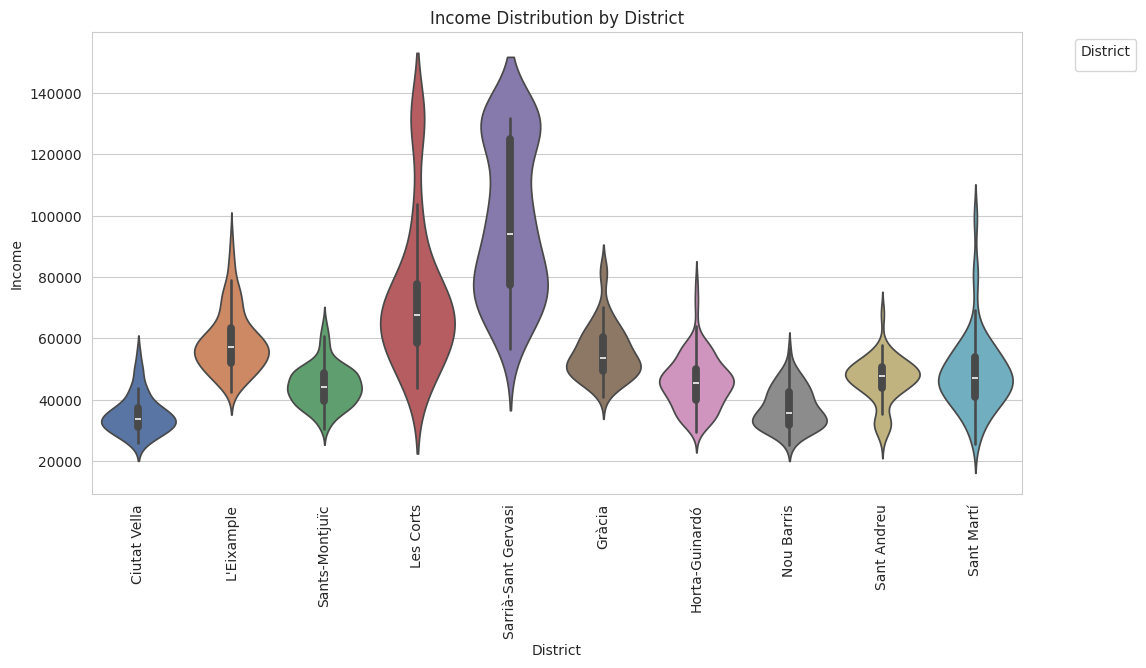

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Nom_Districte', y='Import_Renda_Bruta_€', hue='Nom_Districte', data=income_df, palette='deep')
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Income')
plt.title('Income Distribution by District')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
for district, data in income_df.groupby('Nom_Districte'):
  print(f"\nDistrict: {district}")

  #we will fit a Gaussian Mixture Model trying different components
  bic_values = []
  for n_components in range(1, 6):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(data['Import_Renda_Bruta_€'].values.reshape(-1, 1))
    bic_values.append(gmm.bic(data['Import_Renda_Bruta_€'].values.reshape(-1, 1)))

  #optimal number of components based on BIC
  optimal_components = np.argmin(bic_values) + 1

  print("Optimal number of components (BIC):", optimal_components)

  if optimal_components > 1:
    print("The distribution is likely a mixture.")
  else:
    print("The distribution is likely a single component.")


District: Ciutat Vella
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Gràcia
Optimal number of components (BIC): 3
The distribution is likely a mixture.

District: Horta-Guinardó
Optimal number of components (BIC): 1
The distribution is likely a single component.

District: L'Eixample
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Les Corts
Optimal number of components (BIC): 4
The distribution is likely a mixture.

District: Nou Barris
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Sant Andreu
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Sant Martí
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Sants-Montjuïc
Optimal number of components (BIC): 1
The distribution is likely a single component.

District: Sarrià-Sant Gervasi
Optimal number of components (BIC): 3
The distribution is likel

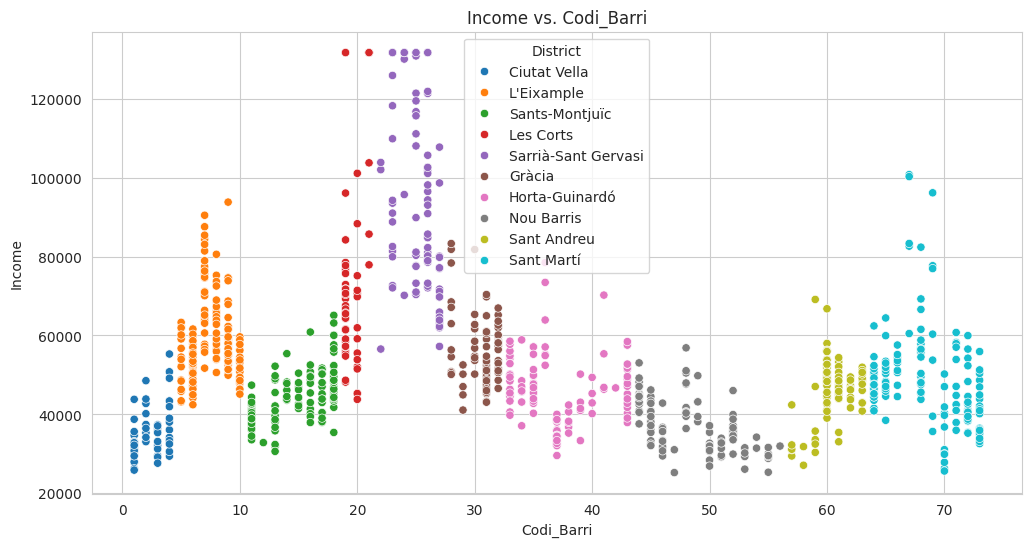

In [ ]:
#here we will see the incomes per neighborhood of each district
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Codi_Barri', y='Import_Renda_Bruta_€', hue='Nom_Districte', data=income_df)
plt.xlabel('Codi_Barri')
plt.ylabel('Income')
plt.title('Income vs. Codi_Barri')
plt.legend(title='District')
plt.show()

### Testing Sampling Method

By looking at the distributions we can identify some mixtures, that is a distribution that does not represent a normal distribution, but a mix of normal distributions, for the purposes of this project we will assume that it mixes normal distributions. We will use k-means to identify the clusters within the distribution of each district, but first we will check for each district which number of clusters is the best amount with the elbow method.

In [ ]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0

    #calculate square of Euclidean distance of each point and add to WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      if points.ndim == 1:  #to handle 1D points
        curr_sse += (points[i] - curr_center) ** 2
      else:  #to handle 2D or higher-dimensional points
        curr_sse += np.linalg.norm(points[i] - curr_center) ** 2

    sse.append(curr_sse)
  return sse

Random income:


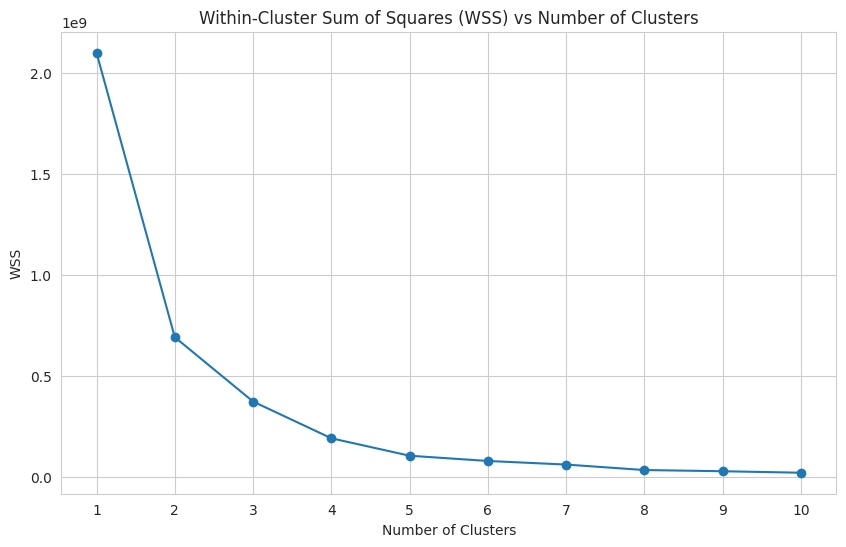

Differences of WSS: [1.40730280e+09 3.18377106e+08 1.81711148e+08 8.63230232e+07
 2.59531382e+07 1.77878055e+07 2.70899844e+07 5.88766687e+06
 7.34946300e+06]
Percentage of Difference [67.73100868 15.32293023  8.745438    4.1545753   1.2490789   0.8560958
  1.30379331  0.28336305  0.35371673]
Clusters at elbow:  4


35207

In [ ]:
def calculate_income_test(district, dataset):
  #we filter dataset by the specified district
  district_data = dataset[dataset['Nom_Districte'] == district].copy()
  income_values = district_data[['Import_Renda_Bruta_€']]

  #we reshape the income values array to 2D to use kmeans
  income_values_2d = income_values.values.reshape(-1, 1)

  #we calculate WSS for different k values
  kmax = 10
  wss_values = calculate_WSS(income_values_2d, kmax)
  plt.figure(figsize=(10, 6))
  plt.plot(range(1, len(wss_values) + 1), wss_values, marker='o', linestyle='-')
  plt.title('Within-Cluster Sum of Squares (WSS) vs Number of Clusters')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WSS')
  plt.xticks(range(1, len(wss_values) + 1))
  plt.grid(True)
  plt.show()

  #we find the optimal number of clusters using the elbow method
  diff_wss = np.abs(np.diff(wss_values))  #differences in WSS values for each number of clusters
  diff_wss_pct = (diff_wss / np.sum(diff_wss)) * 100 #change percentage
  elbow_index = np.argmax(diff_wss_pct < 5)  #find where change percentage is below 5%
  optimal_n_clusters = elbow_index + 1

  print('Differences of WSS:', diff_wss)
  print('Percentage of Difference', diff_wss_pct)
  print('Clusters at elbow: ',optimal_n_clusters)

  #we perform K-means clustering for optimal number of clusters
  kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init='auto')
  district_data['Income_Group'] = kmeans.fit_predict(income_values_2d)

  #we calculate average and standard deviation for each income group and a count to give probabilities to each group
  group_stats = district_data.groupby('Income_Group')['Import_Renda_Bruta_€'].agg(['mean', 'std', 'count'])
  group_stats['Probability'] = group_stats['count'] / group_stats['count'].sum()

  #we select an income group based on the calculated probabilities
  selected_group = np.random.choice(group_stats.index, p=group_stats['Probability'])

  #get average and standard deviation for the selected group
  avg_income = group_stats.loc[selected_group, 'mean']
  std_dev = group_stats.loc[selected_group, 'std']

  #generate the income
  random_income = np.random.normal(avg_income, std_dev)
  return max(0, round(random_income))

print('Random income:')
calculate_income_test('Ciutat Vella', income_df)

In [ ]:
def generate_income(district, dataset):
  district_data = dataset[dataset['Nom_Districte'] == district].copy()
  income_values = district_data[['Import_Renda_Bruta_€']]

  income_values_2d = income_values.values.reshape(-1, 1)

  kmax = 10
  wss_values = calculate_WSS(income_values_2d, kmax)

  diff_wss = np.abs(np.diff(wss_values))
  diff_wss_pct = (diff_wss / np.sum(diff_wss)) * 100
  elbow_index = np.argmax(diff_wss_pct < 5)
  optimal_n_clusters = elbow_index + 1

  kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init='auto')
  district_data['Income_Group'] = kmeans.fit_predict(income_values_2d)

  group_stats = district_data.groupby('Income_Group')['Import_Renda_Bruta_€'].agg(['mean', 'std', 'count'])
  group_stats['Probability'] = group_stats['count'] / group_stats['count'].sum()

  selected_group = np.random.choice(group_stats.index, p=group_stats['Probability'])

  avg_income = group_stats.loc[selected_group, 'mean']
  std_dev = group_stats.loc[selected_group, 'std']

  random_income = np.random.normal(avg_income, std_dev)

  return max(0, round(random_income))

To validate that our income generation algorithm its working correctly we will do the following:
- Visual Analysis
- Kolmogorov-Smirnov Test

<ipython-input-107-ec55bc3addda>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Income', data=df, palette=color_palette)


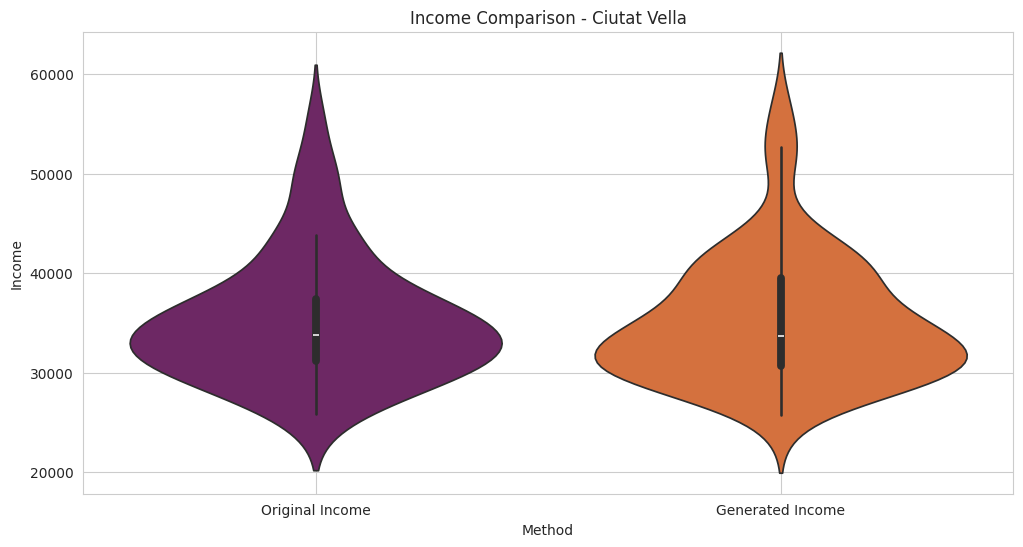

<ipython-input-107-ec55bc3addda>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Income', data=df, palette=color_palette)


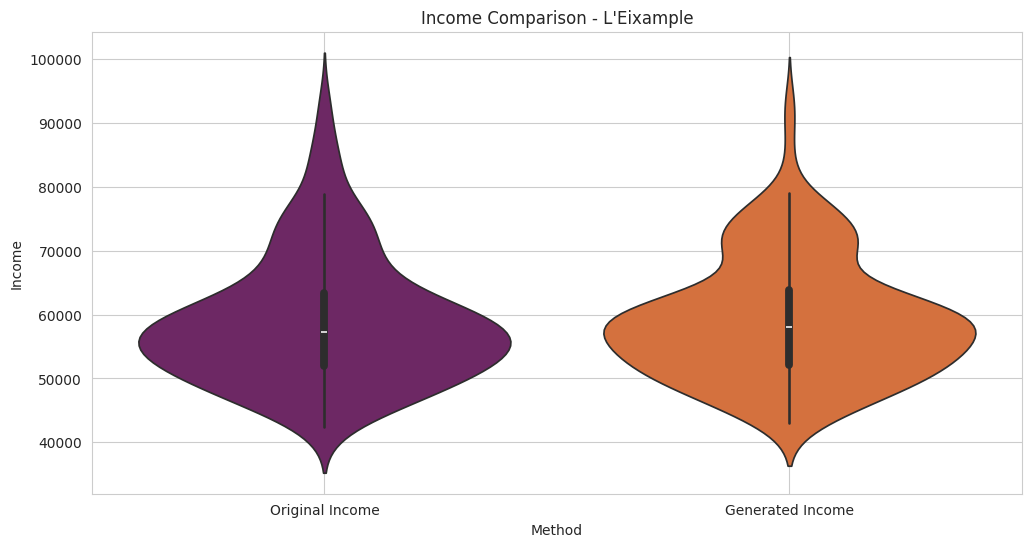

<ipython-input-107-ec55bc3addda>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Income', data=df, palette=color_palette)


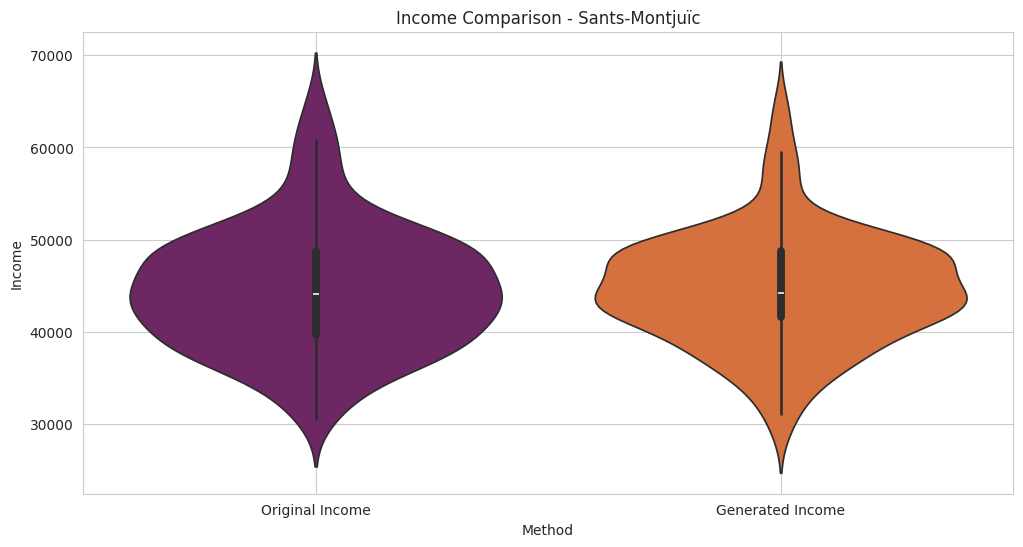

<ipython-input-107-ec55bc3addda>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Income', data=df, palette=color_palette)


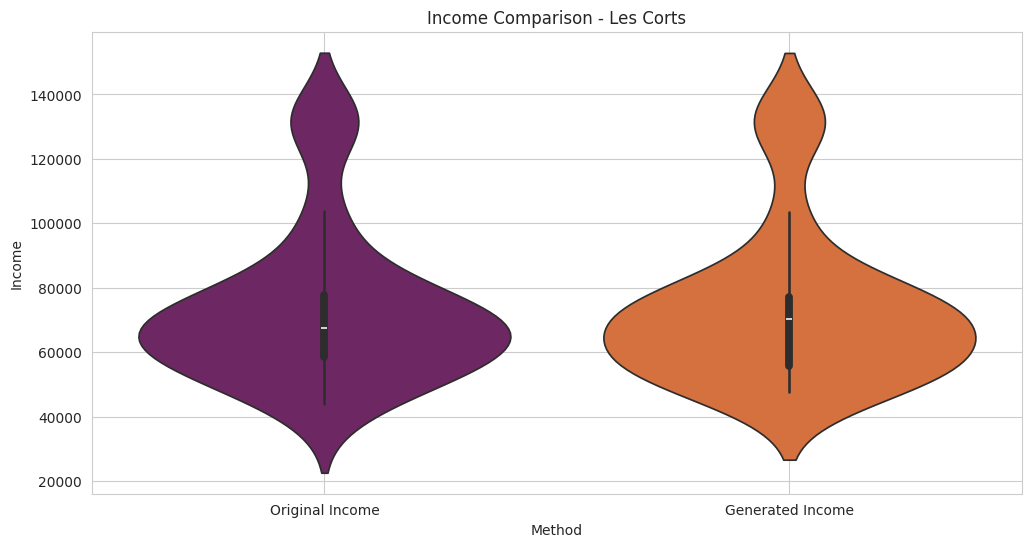

<ipython-input-107-ec55bc3addda>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Income', data=df, palette=color_palette)


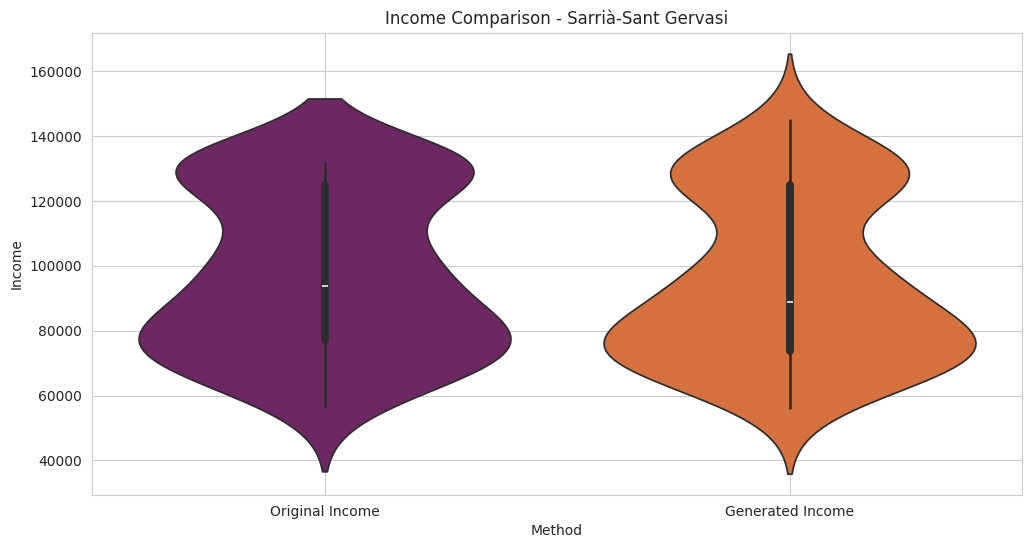

<ipython-input-107-ec55bc3addda>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Income', data=df, palette=color_palette)


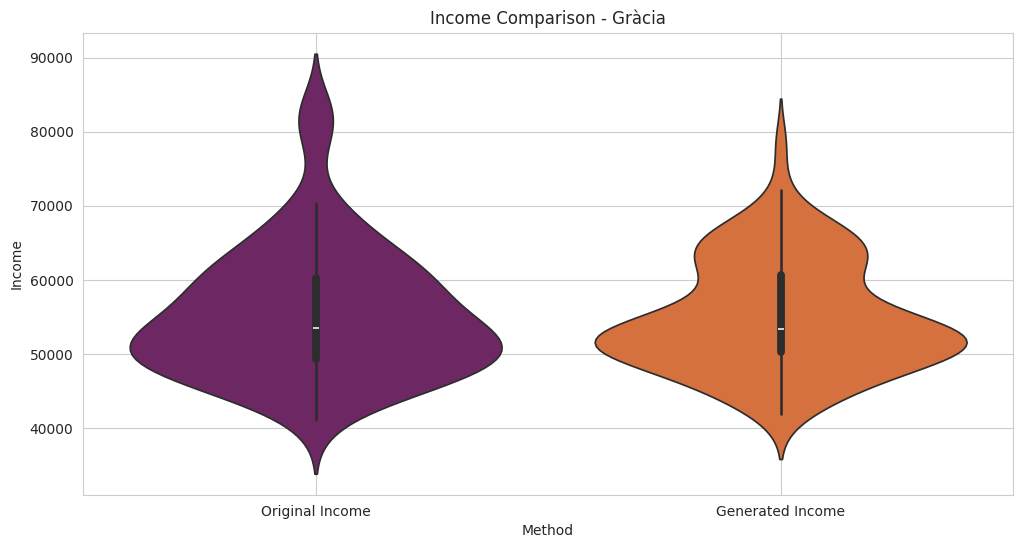

<ipython-input-107-ec55bc3addda>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Income', data=df, palette=color_palette)


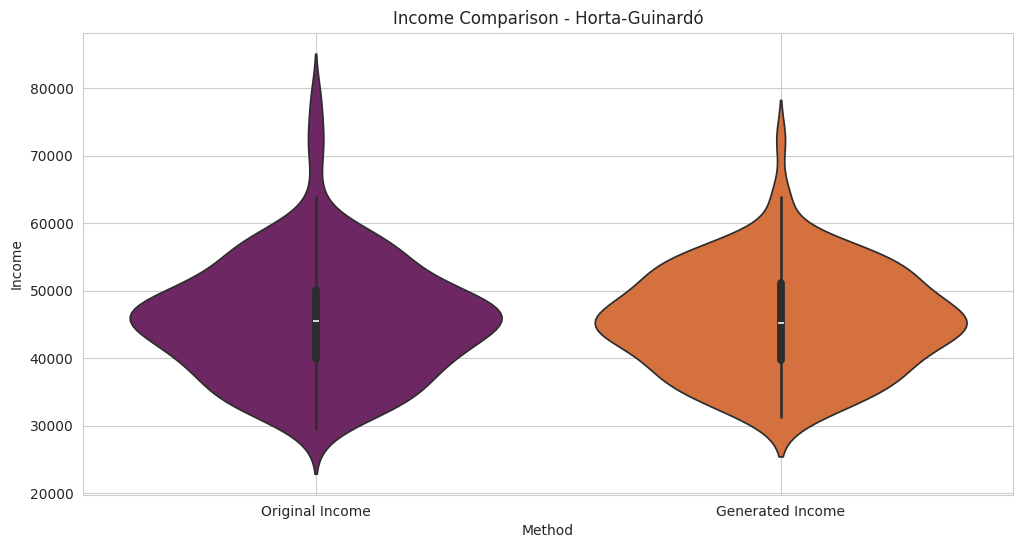

<ipython-input-107-ec55bc3addda>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Income', data=df, palette=color_palette)


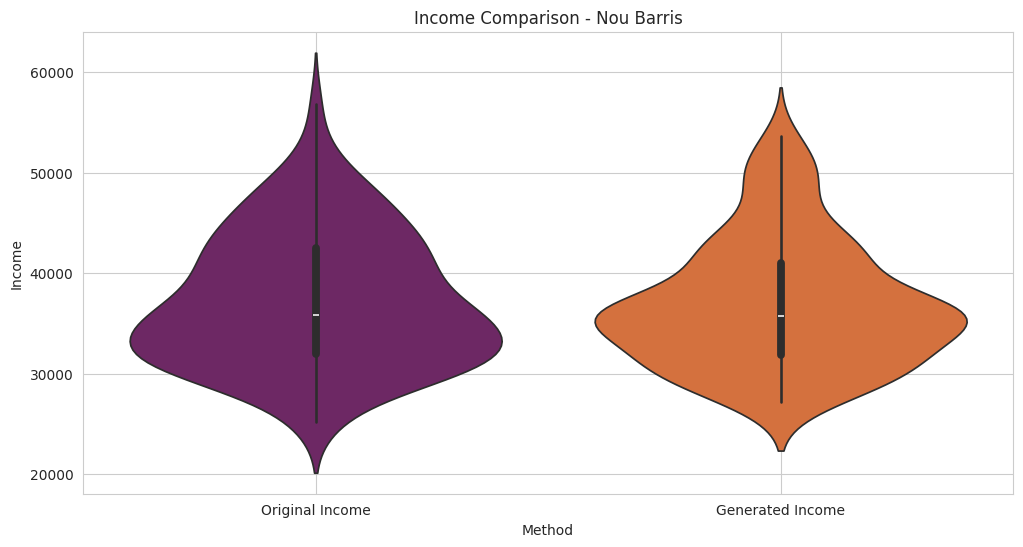

<ipython-input-107-ec55bc3addda>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Income', data=df, palette=color_palette)


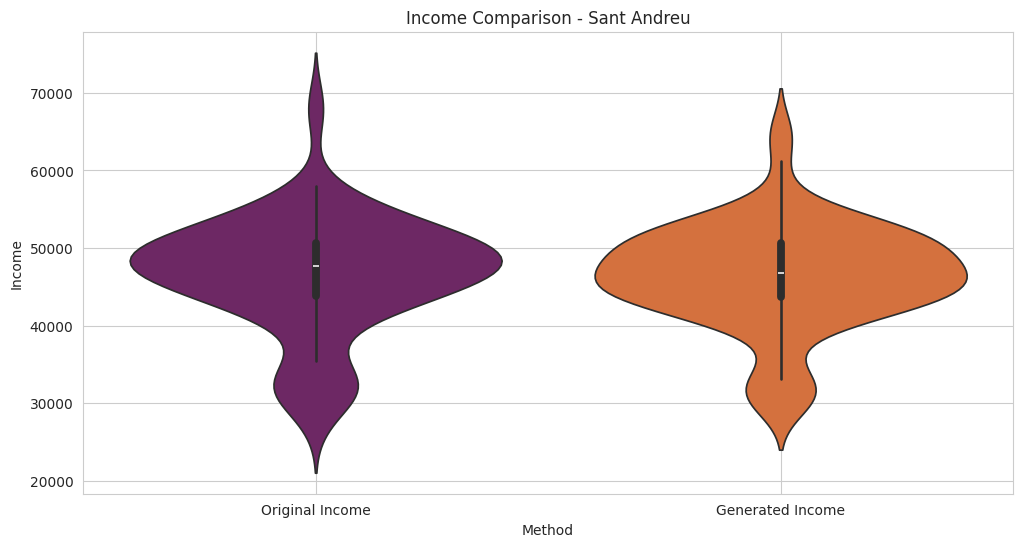

<ipython-input-107-ec55bc3addda>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Income', data=df, palette=color_palette)


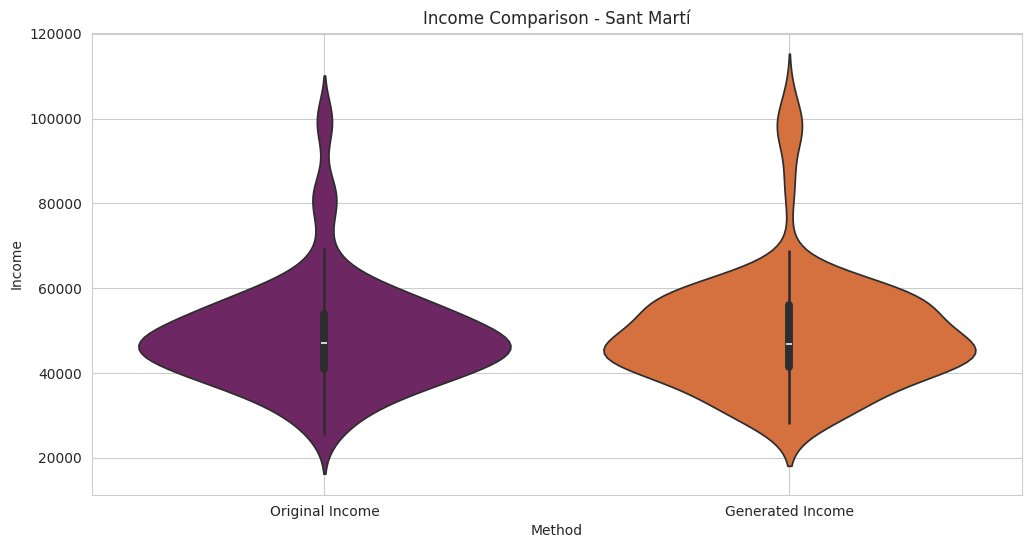

In [ ]:
sns.set_style("whitegrid")
color_palette = 'inferno'

#for each district
for district in income_df['Nom_Districte'].unique():
  #original income values for the district
  original_values = income_df[income_df['Nom_Districte'] == district]['Import_Renda_Bruta_€']

  #generated income values for the district
  generated_values = [generate_income(district, income_df) for _ in range(len(original_values))]

  incomes = np.concatenate([original_values, generated_values])
  methods_labels = ['Original Income'] * len(original_values) + ['Generated Income'] * len(original_values)
  data = {'Method': methods_labels, 'Income': incomes}
  df = pd.DataFrame(data)

  #we create the violin plot
  plt.figure(figsize=(12, 6))
  sns.violinplot(x='Method', y='Income', data=df, palette=color_palette)
  plt.xlabel('Method')
  plt.ylabel('Income')
  plt.title(f'Income Comparison - {district}')
  plt.grid(True)
  plt.show()

In [ ]:
#for each district
for district in income_df['Nom_Districte'].unique():
  #original income values for the district
  original_values = income_df[income_df['Nom_Districte'] == district]['Import_Renda_Bruta_€']

  #generated income values for the district
  generated_values = [generate_income(district, income_df) for _ in range(len(original_values))]

  #Kolmogorov-Smirnov test for the district
  perform_ks_test(original_values, generated_values, district, alpha=0.05)


Kolmogorov-Smirnov statistic for Ciutat Vella: 0.16666666666666666
P-value: 0.4447065193273601
Fail to reject null hypothesis for Ciutat Vella: Distributions are similar.

Kolmogorov-Smirnov statistic for L'Eixample: 0.08092485549132948
P-value: 0.6241709197832376
Fail to reject null hypothesis for L'Eixample: Distributions are similar.

Kolmogorov-Smirnov statistic for Sants-Montjuïc: 0.09401709401709402
P-value: 0.6815261302880303
Fail to reject null hypothesis for Sants-Montjuïc: Distributions are similar.

Kolmogorov-Smirnov statistic for Les Corts: 0.14035087719298245
P-value: 0.6328581863440477
Fail to reject null hypothesis for Les Corts: Distributions are similar.

Kolmogorov-Smirnov statistic for Sarrià-Sant Gervasi: 0.15306122448979592
P-value: 0.20170895996299748
Fail to reject null hypothesis for Sarrià-Sant Gervasi: Distributions are similar.

Kolmogorov-Smirnov statistic for Gràcia: 0.12643678160919541
P-value: 0.49243785106712834
Fail to reject null hypothesis for Gràci

Observations: visually we can see the generated and original distributions are similar, finally with the Kolmogorov-Smirnov test we can say that we fail to reject the null-hypothesis which states that the distributions are different.

### Final Implementation

In [ ]:
#example of usage:
district = 'Ciutat Vella'
for i in range(10):
  income = generate_income(district, income_df)
  print(f"Iteration {i+1}: Income for a random neighborhood in {district}: {income:.2f} €")

Iteration 1: Income for a random neighborhood in Ciutat Vella: 29719.00 €
Iteration 2: Income for a random neighborhood in Ciutat Vella: 35798.00 €
Iteration 3: Income for a random neighborhood in Ciutat Vella: 29661.00 €
Iteration 4: Income for a random neighborhood in Ciutat Vella: 52882.00 €
Iteration 5: Income for a random neighborhood in Ciutat Vella: 34641.00 €
Iteration 6: Income for a random neighborhood in Ciutat Vella: 35542.00 €
Iteration 7: Income for a random neighborhood in Ciutat Vella: 32724.00 €
Iteration 8: Income for a random neighborhood in Ciutat Vella: 35413.00 €
Iteration 9: Income for a random neighborhood in Ciutat Vella: 35844.00 €
Iteration 10: Income for a random neighborhood in Ciutat Vella: 41175.00 €


#4 Building Age

For the building age we will use the following dataset from Barcelona Open Data ([Building Age](https://opendata-ajuntament.barcelona.cat/data/es/dataset/est-cadastre-edificacions-edat-mitjana/resource/557c5d0f-581d-4032-8328-c3f550fa3968)) which gives the average building age per census section and will compute a random value for a given district.

### Data Exploration

In [ ]:
file_path = '/content/drive/MyDrive/TFG/Data/2023_edificacions_edat_mitjana.csv'

#we read the CSV file into a DataFrame
building_df = pd.read_csv(file_path)

display(building_df.head())

Any  Codi_districte Nom_districte  Codi_barri Nom_barri  Seccio_censal  \
0  2023               1  Ciutat Vella           1  el Raval              1   
1  2023               1  Ciutat Vella           1  el Raval              2   
2  2023               1  Ciutat Vella           1  el Raval              3   
3  2023               1  Ciutat Vella           1  el Raval              4   
4  2023               1  Ciutat Vella           1  el Raval              5   

   Edat_mitjana  
0          98.9  
1         108.9  
2         109.3  
3          92.6  
4         116.6

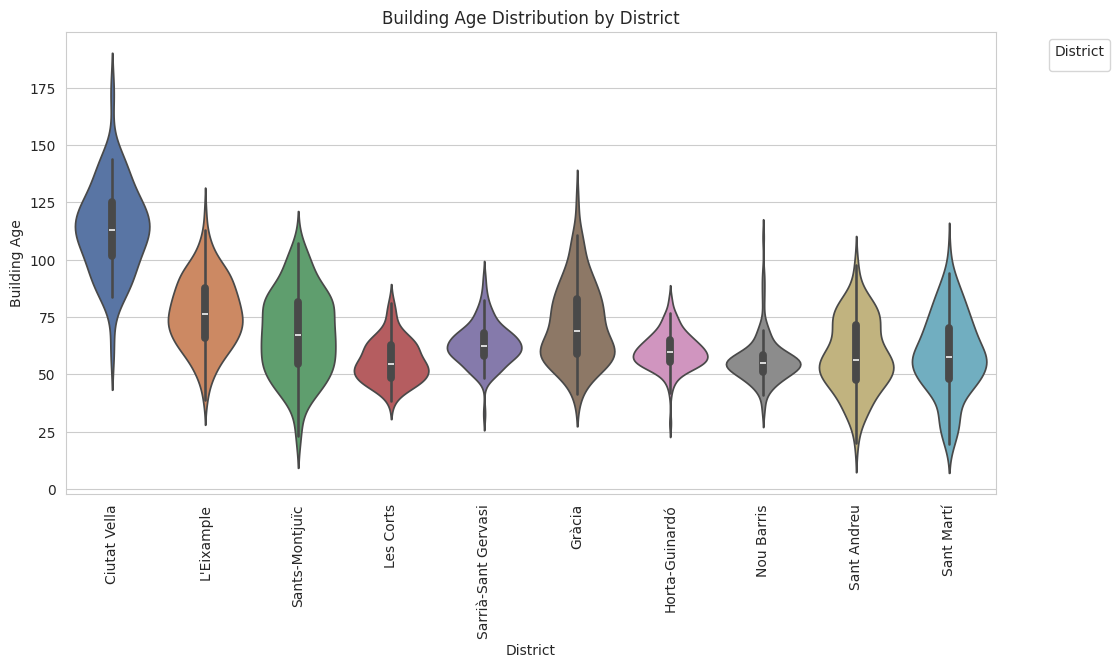

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Nom_districte', y='Edat_mitjana', hue='Nom_districte', data=building_df, palette='deep')
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Building Age')
plt.title('Building Age Distribution by District')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
for district, data in building_df.groupby('Nom_districte'):
  print(f"\nDistrict: {district}")

  #we will fit a Gaussian Mixture Model trying different components
  bic_values = []
  for n_components in range(1, 6):
      gmm = GaussianMixture(n_components=n_components, random_state=42)
      gmm.fit(data['Edat_mitjana'].values.reshape(-1, 1))
      bic_values.append(gmm.bic(data['Edat_mitjana'].values.reshape(-1, 1)))

  #optimal number of components based on BIC
  optimal_components = np.argmin(bic_values) + 1

  print("Optimal number of components (BIC):", optimal_components)

  if optimal_components > 1:
      print("The distribution is likely a mixture.")
  else:
      print("The distribution is likely a single component.")


District: Ciutat Vella
Optimal number of components (BIC): 1
The distribution is likely a single component.

District: Gràcia
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Horta-Guinardó
Optimal number of components (BIC): 1
The distribution is likely a single component.

District: L'Eixample
Optimal number of components (BIC): 1
The distribution is likely a single component.

District: Les Corts
Optimal number of components (BIC): 1
The distribution is likely a single component.

District: Nou Barris
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Sant Andreu
Optimal number of components (BIC): 1
The distribution is likely a single component.

District: Sant Martí
Optimal number of components (BIC): 1
The distribution is likely a single component.

District: Sants-Montjuïc
Optimal number of components (BIC): 1
The distribution is likely a single component.

District: Sarrià-Sant Gervasi
Optimal number of 

### Testing Sampling Method

We can see that the distributions are also mixtures, so we will use the same method used for the income generator.

Random Building Age:


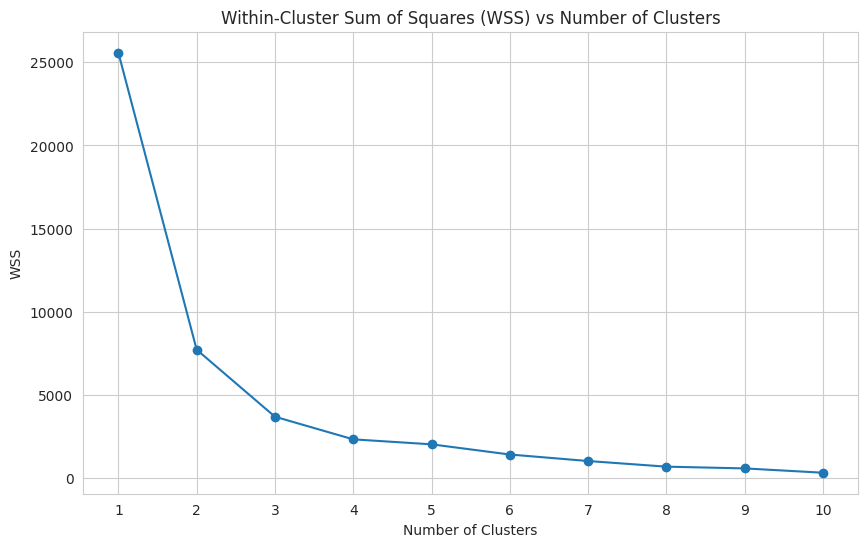

Differences of WSS: [17843.68569629  4027.70055495  1359.64032034   299.52990188
   611.86982234   391.36260317   338.76651298   104.94073764
   259.308     ]
Percentage of Difference [70.70501316 15.95962996  5.38752971  1.18687731  2.42451389  1.55076134
  1.34235108  0.41582419  1.02749936]
Clusters at elbow:  4


70

In [ ]:
def calculate_building_age_test(district, dataset):
  #filtered dataset by the specified district
  district_data = dataset[dataset['Nom_districte'] == district].copy()
  age_values = district_data[['Edat_mitjana']]

  #we reshape the age values array to 2D for the kmeans method
  age_values_2d = age_values.values.reshape(-1, 1)

  #we calculate WSS for different k values
  kmax = 10
  wss_values = calculate_WSS(age_values_2d, kmax)
  plt.figure(figsize=(10, 6))
  plt.plot(range(1, len(wss_values) + 1), wss_values, marker='o', linestyle='-')
  plt.title('Within-Cluster Sum of Squares (WSS) vs Number of Clusters')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WSS')
  plt.xticks(range(1, len(wss_values) + 1))
  plt.grid(True)
  plt.show()

  #find the optimal number of clusters using the elbow method
  diff_wss = np.abs(np.diff(wss_values))
  diff_wss_pct = (diff_wss / np.sum(diff_wss)) * 100
  elbow_index = np.argmax(diff_wss_pct < 5)
  optimal_n_clusters = elbow_index + 1

  print('Differences of WSS:', diff_wss)
  print('Percentage of Difference', diff_wss_pct)
  print('Clusters at elbow: ',optimal_n_clusters)

  #we perform kmeans clustering with the optimal number of clusters
  kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init='auto')
  district_data['Age_Group'] = kmeans.fit_predict(age_values_2d)

  #average and standard deviation for each age group and count to give probabilities to each group
  group_stats = district_data.groupby('Age_Group')['Edat_mitjana'].agg(['mean', 'std', 'count'])
  group_stats['Probability'] = group_stats['count'] / group_stats['count'].sum()

  #select a group based on the probabilities
  selected_group = np.random.choice(group_stats.index, p=group_stats['Probability'])

  #get average and standard deviation for the selected group
  avg_age = group_stats.loc[selected_group, 'mean']
  std_dev = group_stats.loc[selected_group, 'std']

  #generate building age
  random_age = np.random.normal(avg_age, std_dev)
  return max(0, round(random_age))

print('Random Building Age:')
calculate_building_age_test('Gràcia', building_df)

In [ ]:
def generate_building_age(district, dataset):
  district_data = dataset[dataset['Nom_districte'] == district].copy()
  age_values = district_data[['Edat_mitjana']]

  age_values_2d = age_values.values.reshape(-1, 1)

  kmax = 10
  wss_values = calculate_WSS(age_values_2d, kmax)

  diff_wss = np.abs(np.diff(wss_values))
  diff_wss_pct = (diff_wss / np.sum(diff_wss)) * 100
  elbow_index = np.argmax(diff_wss_pct < 5)
  optimal_n_clusters = elbow_index + 1

  kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init='auto')
  district_data['Age_Group'] = kmeans.fit_predict(age_values_2d)

  group_stats = district_data.groupby('Age_Group')['Edat_mitjana'].agg(['mean', 'std', 'count'])
  group_stats['Probability'] = group_stats['count'] / group_stats['count'].sum()

  selected_group = np.random.choice(group_stats.index, p=group_stats['Probability'])

  avg_age = group_stats.loc[selected_group, 'mean']
  std_dev = group_stats.loc[selected_group, 'std']

  random_age = np.random.normal(avg_age, std_dev)

  return max(0, round(random_age))

<ipython-input-115-df7d83ac3197>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Age', data=df, palette=color_palette)


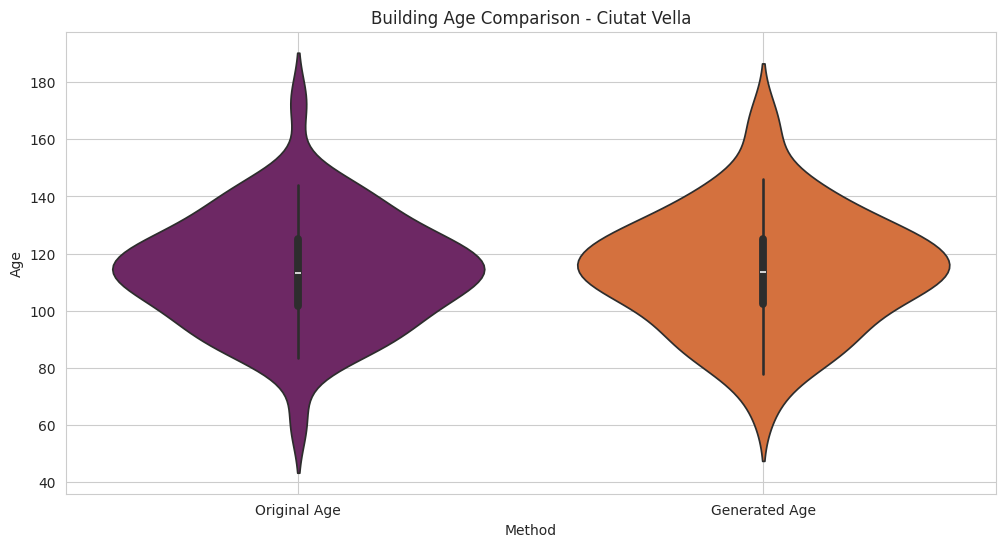

<ipython-input-115-df7d83ac3197>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Age', data=df, palette=color_palette)


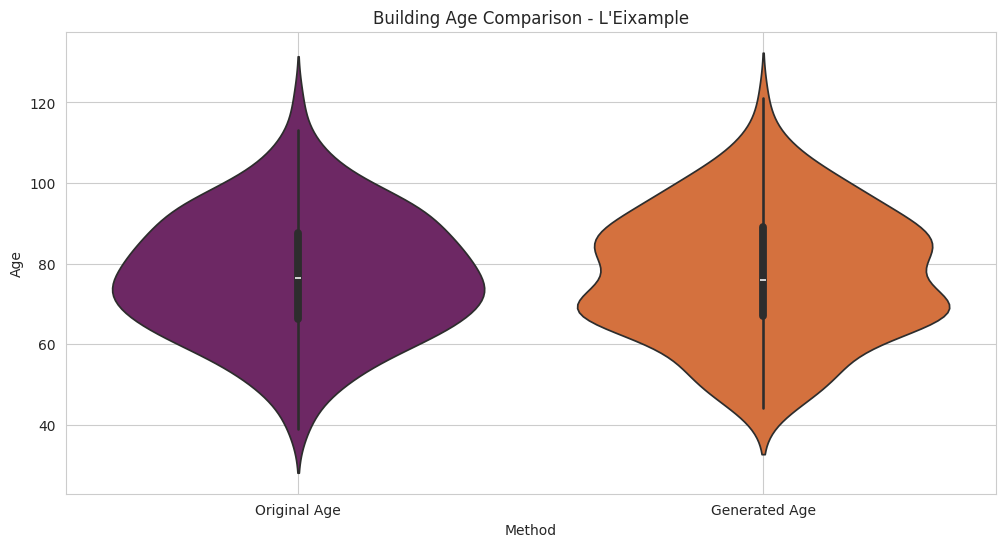

<ipython-input-115-df7d83ac3197>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Age', data=df, palette=color_palette)


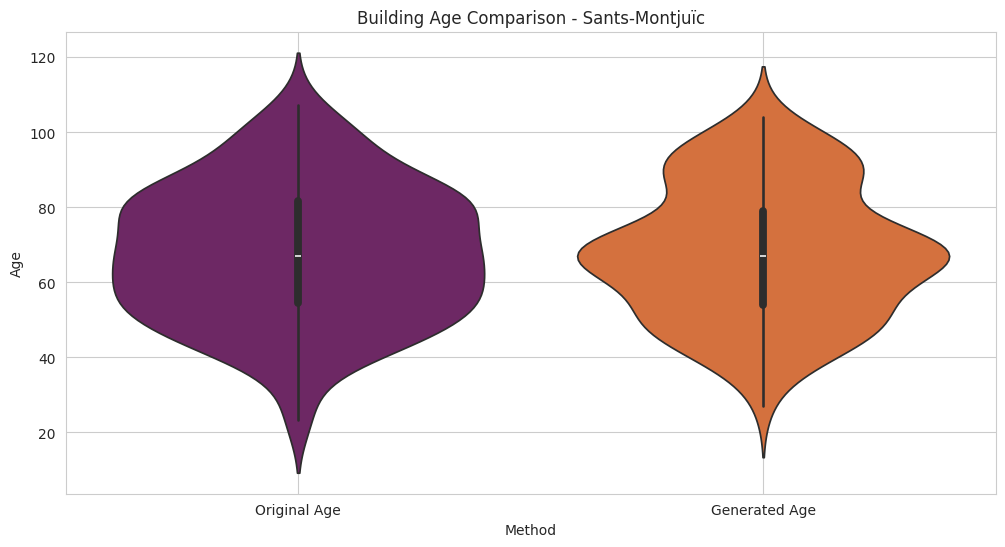

<ipython-input-115-df7d83ac3197>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Age', data=df, palette=color_palette)


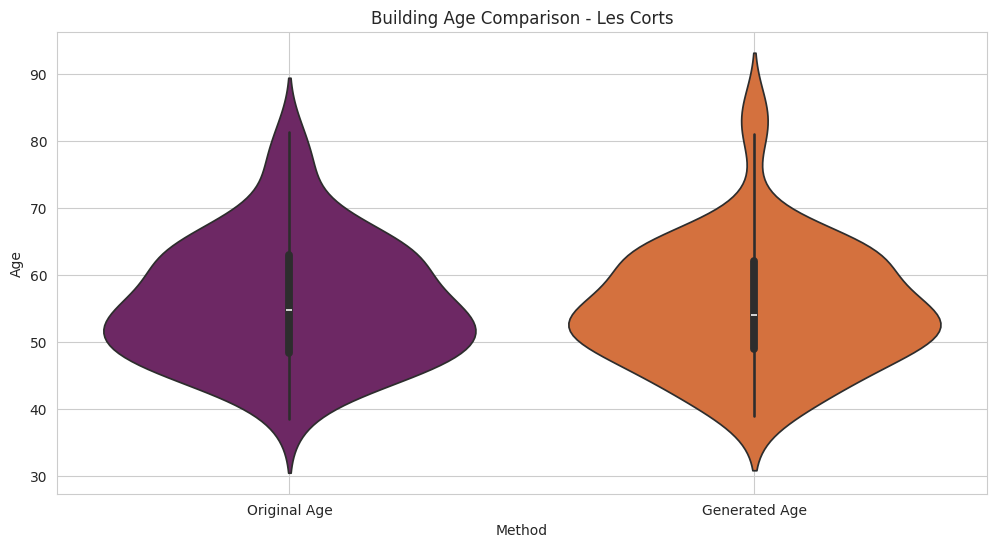

<ipython-input-115-df7d83ac3197>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Age', data=df, palette=color_palette)


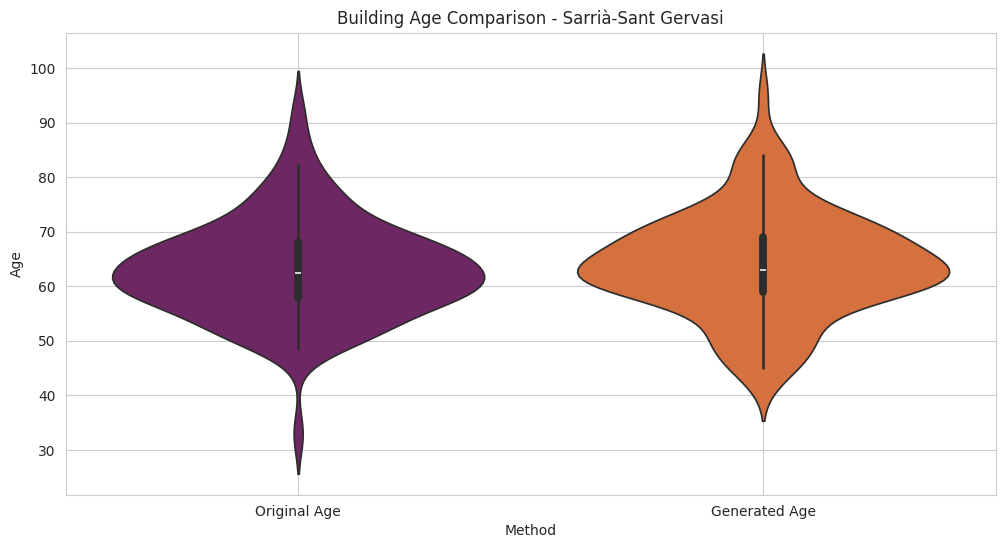

<ipython-input-115-df7d83ac3197>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Age', data=df, palette=color_palette)


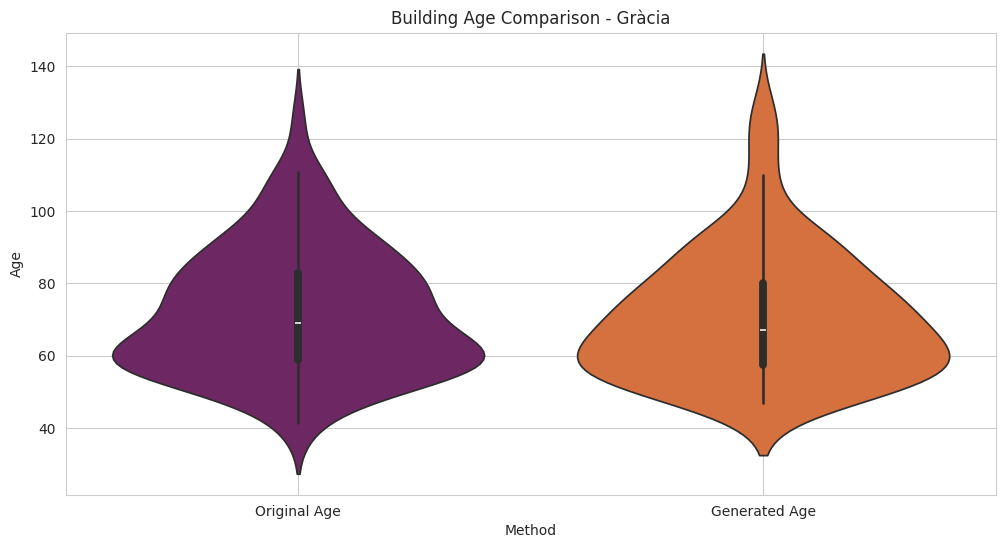

<ipython-input-115-df7d83ac3197>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Age', data=df, palette=color_palette)


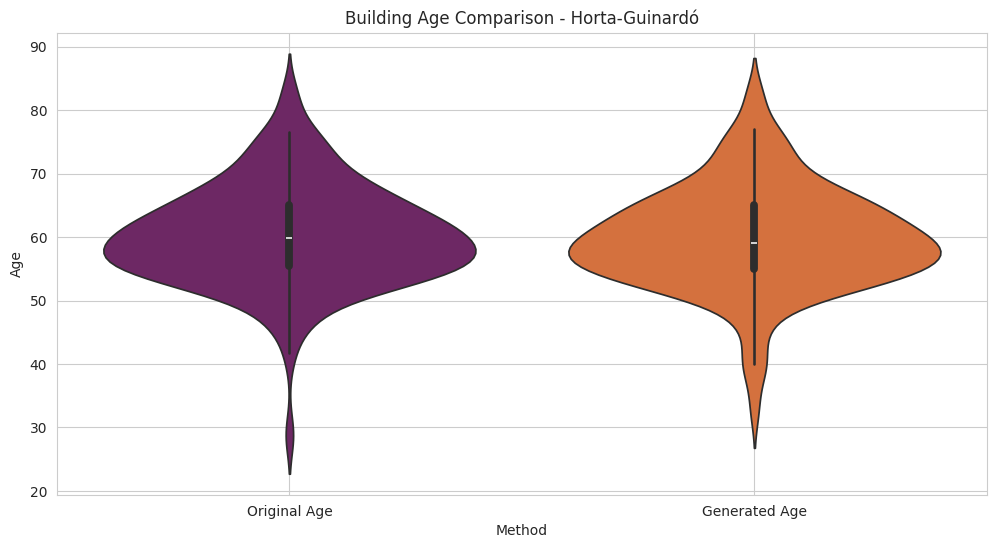

<ipython-input-115-df7d83ac3197>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Age', data=df, palette=color_palette)


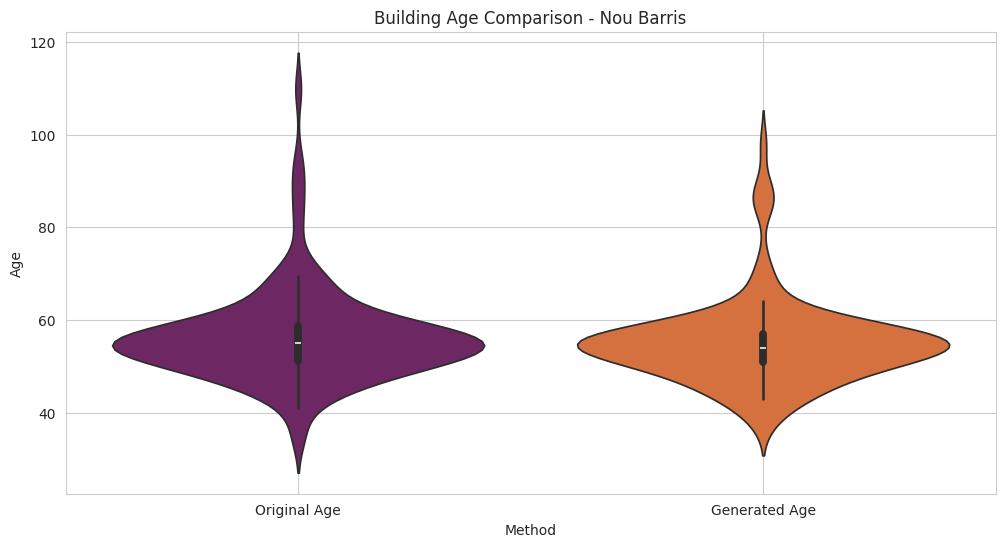

<ipython-input-115-df7d83ac3197>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Age', data=df, palette=color_palette)


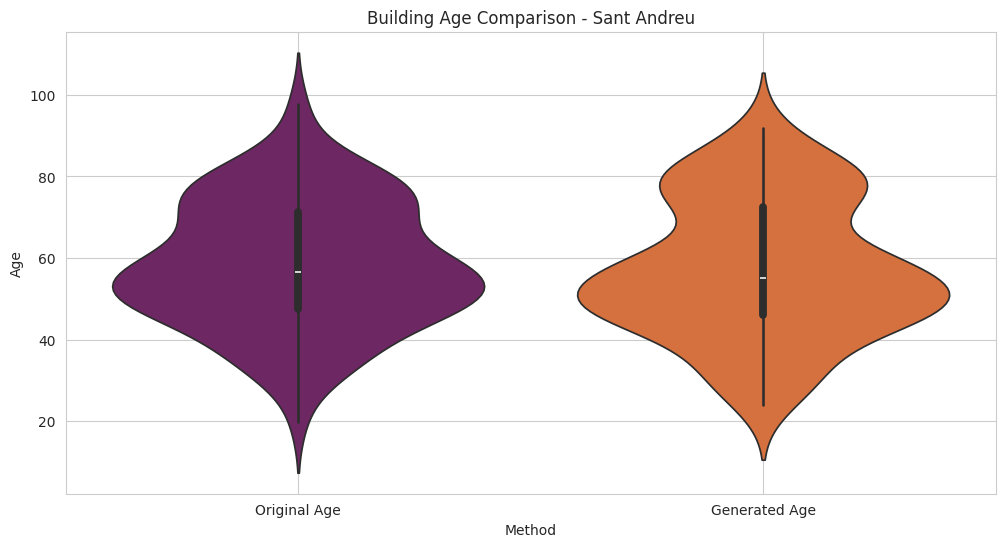

<ipython-input-115-df7d83ac3197>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Age', data=df, palette=color_palette)


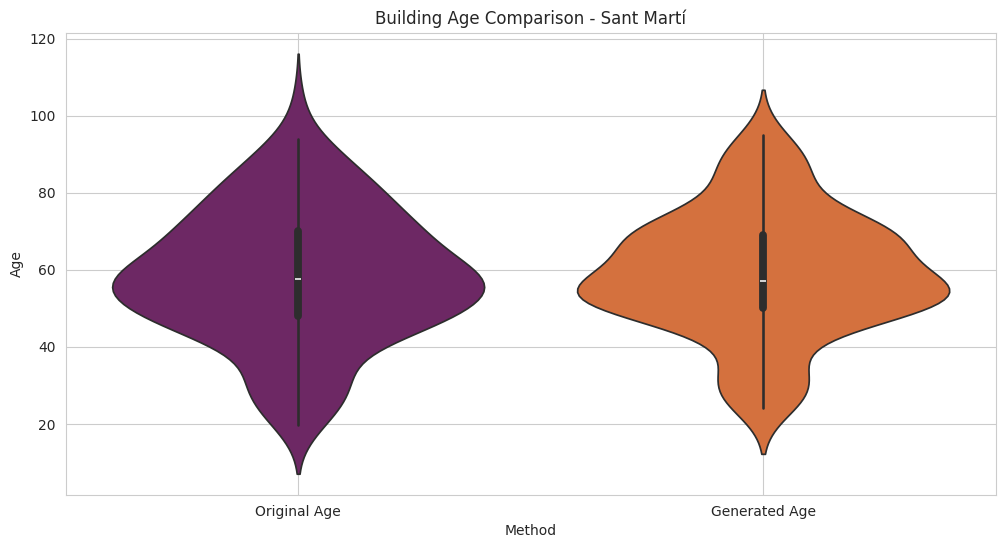

In [ ]:
sns.set_style("whitegrid")
color_palette = 'inferno'

#for each district
for district in building_df['Nom_districte'].unique():
  #original age values for the district
  original_values = building_df[building_df['Nom_districte'] == district]['Edat_mitjana']

  #generated age values for the district
  generated_values = [generate_building_age(district, building_df) for _ in range(len(original_values))]

  ages = np.concatenate([original_values, generated_values])
  methods_labels = ['Original Age'] * len(original_values) + ['Generated Age'] * len(original_values)
  data = {'Method': methods_labels, 'Age': ages}
  df = pd.DataFrame(data)

  #we create the violin plot
  plt.figure(figsize=(12, 6))
  sns.violinplot(x='Method', y='Age', data=df, palette=color_palette)
  plt.xlabel('Method')
  plt.ylabel('Age')
  plt.title(f'Building Age Comparison - {district}')
  plt.grid(True)
  plt.show()


In [ ]:
#for each district
for district in building_df['Nom_districte'].unique():
  #original age values for the district
  original_values = building_df[building_df['Nom_districte'] == district]['Edat_mitjana']

  #generated age values for the district
  generated_values = [generate_building_age(district, building_df) for _ in range(len(original_values))]

  #Kolmogorov-Smirnov test for the district
  perform_ks_test(original_values, generated_values, district, alpha=0.05)


Kolmogorov-Smirnov statistic for Ciutat Vella: 0.12962962962962962
P-value: 0.7597078706434061
Fail to reject null hypothesis for Ciutat Vella: Distributions are similar.

Kolmogorov-Smirnov statistic for L'Eixample: 0.08092485549132948
P-value: 0.6241709197832376
Fail to reject null hypothesis for L'Eixample: Distributions are similar.

Kolmogorov-Smirnov statistic for Sants-Montjuïc: 0.08547008547008547
P-value: 0.7885416765651418
Fail to reject null hypothesis for Sants-Montjuïc: Distributions are similar.

Kolmogorov-Smirnov statistic for Les Corts: 0.15789473684210525
P-value: 0.47962221406968086
Fail to reject null hypothesis for Les Corts: Distributions are similar.

Kolmogorov-Smirnov statistic for Sarrià-Sant Gervasi: 0.11224489795918367
P-value: 0.5699456818290308
Fail to reject null hypothesis for Sarrià-Sant Gervasi: Distributions are similar.

Kolmogorov-Smirnov statistic for Gràcia: 0.12643678160919541
P-value: 0.49243785106712834
Fail to reject null hypothesis for Gràci

### Final implementation

In [ ]:
#example of usage
district = 'Sarrià-Sant Gervasi'
for i in range(10):
  age = generate_building_age(district, building_df)
  print(f"Iteration {i+1}: Building age for a random neighborhood in {district}: {age:.2f} years")

Iteration 1: Building age for a random neighborhood in Sarrià-Sant Gervasi: 52.00 years
Iteration 2: Building age for a random neighborhood in Sarrià-Sant Gervasi: 67.00 years
Iteration 3: Building age for a random neighborhood in Sarrià-Sant Gervasi: 62.00 years
Iteration 4: Building age for a random neighborhood in Sarrià-Sant Gervasi: 62.00 years
Iteration 5: Building age for a random neighborhood in Sarrià-Sant Gervasi: 59.00 years
Iteration 6: Building age for a random neighborhood in Sarrià-Sant Gervasi: 75.00 years
Iteration 7: Building age for a random neighborhood in Sarrià-Sant Gervasi: 72.00 years
Iteration 8: Building age for a random neighborhood in Sarrià-Sant Gervasi: 72.00 years
Iteration 9: Building age for a random neighborhood in Sarrià-Sant Gervasi: 59.00 years
Iteration 10: Building age for a random neighborhood in Sarrià-Sant Gervasi: 60.00 years


#5 Household Surface

To finish with the Place data we will generate the household surface, for that we will use the data given by the Spanish Department of Digitalization and AI ([Household Surface](https://datos.gob.es/es/catalogo/l01080193-superficie-media-de-los-locales-de-vivienda-de-la-ciudad-de-barcelona)), and get a random value based on its distribution.

### Data Exploration

In [ ]:
file_path = '/content/drive/MyDrive/TFG/Data/2024_superficie_mitjana.csv'

#we read the CSV file into a DataFrame
surface_df = pd.read_csv(file_path)

display(surface_df.head())

Any  Codi_districte Nom_districte  Codi_barri Nom_barri  Seccio_censal  \
0  2024               1  Ciutat Vella           1  el Raval              1   
1  2024               1  Ciutat Vella           1  el Raval              2   
2  2024               1  Ciutat Vella           1  el Raval              3   
3  2024               1  Ciutat Vella           1  el Raval              4   
4  2024               1  Ciutat Vella           1  el Raval              5   

   Sup_mitjana_m2  
0            76.7  
1            67.9  
2            59.1  
3            65.0  
4            77.8

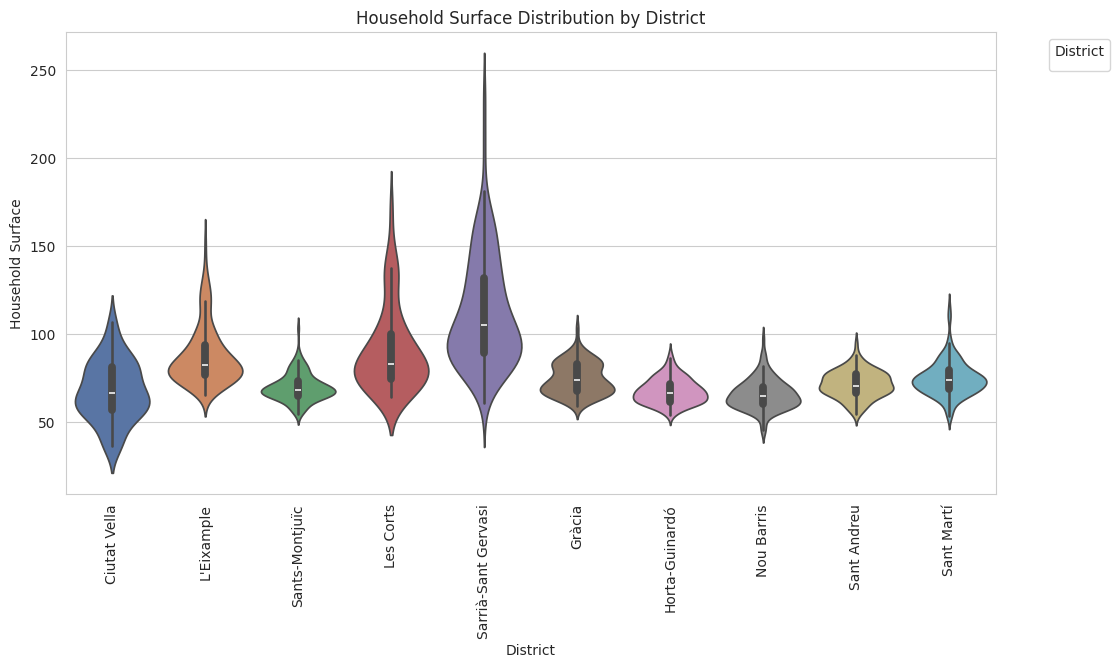

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Nom_districte', y='Sup_mitjana_m2', hue='Nom_districte', data=surface_df, palette='deep')
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Household Surface')
plt.title('Household Surface Distribution by District')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
for district, data in surface_df.groupby('Nom_districte'):
  print(f"\nDistrict: {district}")

  #we will fit a Gaussian Mixture Model trying different components
  bic_values = []
  for n_components in range(1, 6):
      gmm = GaussianMixture(n_components=n_components, random_state=42)
      gmm.fit(data['Sup_mitjana_m2'].values.reshape(-1, 1))
      bic_values.append(gmm.bic(data['Sup_mitjana_m2'].values.reshape(-1, 1)))

  #optimal number of components based on BIC
  optimal_components = np.argmin(bic_values) + 1

  print("Optimal number of components (BIC):", optimal_components)

  if optimal_components > 1:
      print("The distribution is likely a mixture.")
  else:
      print("The distribution is likely a single component.")


District: Ciutat Vella
Optimal number of components (BIC): 1
The distribution is likely a single component.

District: Gràcia
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Horta-Guinardó
Optimal number of components (BIC): 1
The distribution is likely a single component.

District: L'Eixample
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Les Corts
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Nou Barris
Optimal number of components (BIC): 1
The distribution is likely a single component.

District: Sant Andreu
Optimal number of components (BIC): 1
The distribution is likely a single component.

District: Sant Martí
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Sants-Montjuïc
Optimal number of components (BIC): 2
The distribution is likely a mixture.

District: Sarrià-Sant Gervasi
Optimal number of components (BIC): 2
The dis

### Testing Sampling Method

Once again we see that some of the distributions for Household Surface per District appear to be mixtures, then we will treat this case like the income case.

Random Building Surface:


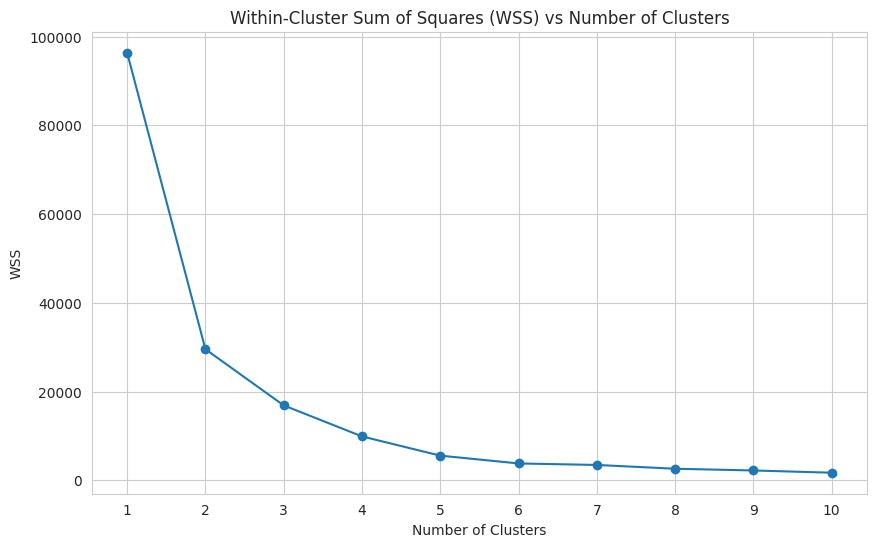

Differences of WSS: [66823.38134266 12656.00125944  6992.26384314  4333.22022579
  1759.76113783   338.           858.65100067   385.38025
   509.24674603]
Percentage of Difference [70.59610362 13.37053526  7.38703389  4.57786568  1.85911394  0.35708284
  0.90712882  0.40713809  0.53799786]
Clusters at elbow:  4


147

In [ ]:
def calculate_building_surface_test(district, dataset):
  #we filter dataset by the specified district
  district_data = dataset[dataset['Nom_districte'] == district].copy()
  surface_values = district_data[['Sup_mitjana_m2']]

  #reshape the surface values array to 2D for the kmeans method
  surface_values_2d = surface_values.values.reshape(-1, 1)

  #we calculate WSS for different k values
  kmax = 10
  wss_values = calculate_WSS(surface_values_2d, kmax)
  plt.figure(figsize=(10, 6))
  plt.plot(range(1, len(wss_values) + 1), wss_values, marker='o', linestyle='-')
  plt.title('Within-Cluster Sum of Squares (WSS) vs Number of Clusters')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WSS')
  plt.xticks(range(1, len(wss_values) + 1))
  plt.grid(True)
  plt.show()

  #find the optimal number of clusters using the elbow method
  diff_wss = np.abs(np.diff(wss_values))
  diff_wss_pct = (diff_wss / np.sum(diff_wss)) * 100
  elbow_index = np.argmax(diff_wss_pct < 5)
  optimal_n_clusters = elbow_index + 1

  print('Differences of WSS:', diff_wss)
  print('Percentage of Difference', diff_wss_pct)
  print('Clusters at elbow: ',optimal_n_clusters)

  #K-means clustering with the optimal number of clusters
  kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init='auto')
  district_data['Surface_Group'] = kmeans.fit_predict(surface_values_2d)

  #calculate average and standard deviation for each surface group with a count to give probabilities to each group
  group_stats = district_data.groupby('Surface_Group')['Sup_mitjana_m2'].agg(['mean', 'std', 'count'])
  group_stats['Probability'] = group_stats['count'] / group_stats['count'].sum()

  #select a surface group
  selected_group = np.random.choice(group_stats.index, p=group_stats['Probability'])

  #get average and standard deviation for the selected group
  avg_surface = group_stats.loc[selected_group, 'mean']
  std_dev = group_stats.loc[selected_group, 'std']

  #generate the building surface
  random_surface = np.random.normal(avg_surface, std_dev)
  return max(0, round(random_surface))

print('Random Building Surface:')
calculate_building_surface_test('Sarrià-Sant Gervasi', surface_df)

In [ ]:
def generate_building_surface(district, dataset):
  district_data = dataset[dataset['Nom_districte'] == district].copy()
  surface_values = district_data[['Sup_mitjana_m2']]

  surface_values_2d = surface_values.values.reshape(-1, 1)

  kmax = 10
  wss_values = calculate_WSS(surface_values_2d, kmax)

  diff_wss = np.abs(np.diff(wss_values))
  diff_wss_pct = (diff_wss / np.sum(diff_wss)) * 100
  elbow_index = np.argmax(diff_wss_pct < 5)
  optimal_n_clusters = elbow_index + 1

  kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init='auto')
  district_data['Surface_Group'] = kmeans.fit_predict(surface_values_2d)

  group_stats = district_data.groupby('Surface_Group')['Sup_mitjana_m2'].agg(['mean', 'std', 'count'])
  group_stats['Probability'] = group_stats['count'] / group_stats['count'].sum()

  selected_group = np.random.choice(group_stats.index, p=group_stats['Probability'])

  avg_surface = group_stats.loc[selected_group, 'mean']
  std_dev = group_stats.loc[selected_group, 'std']

  # Check for zero or NaN standard deviation values
  if std_dev == 0 or np.isnan(std_dev):
      return 0  # Return 0 if standard deviation is zero or NaN

  random_surface = np.random.normal(avg_surface, std_dev)

  return max(0, round(random_surface))

<ipython-input-54-4acc48462e62>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Surface', data=df, palette=color_palette)


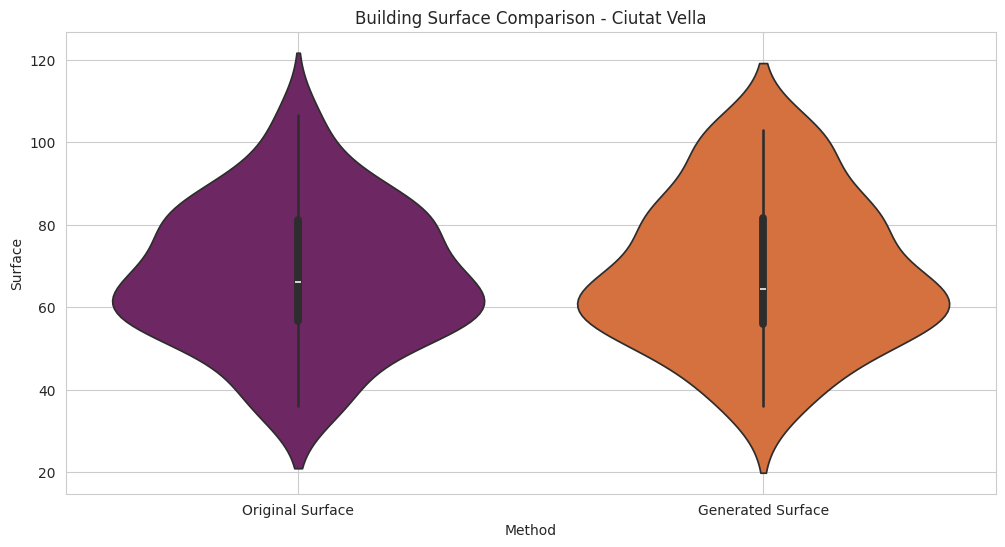

<ipython-input-54-4acc48462e62>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Surface', data=df, palette=color_palette)


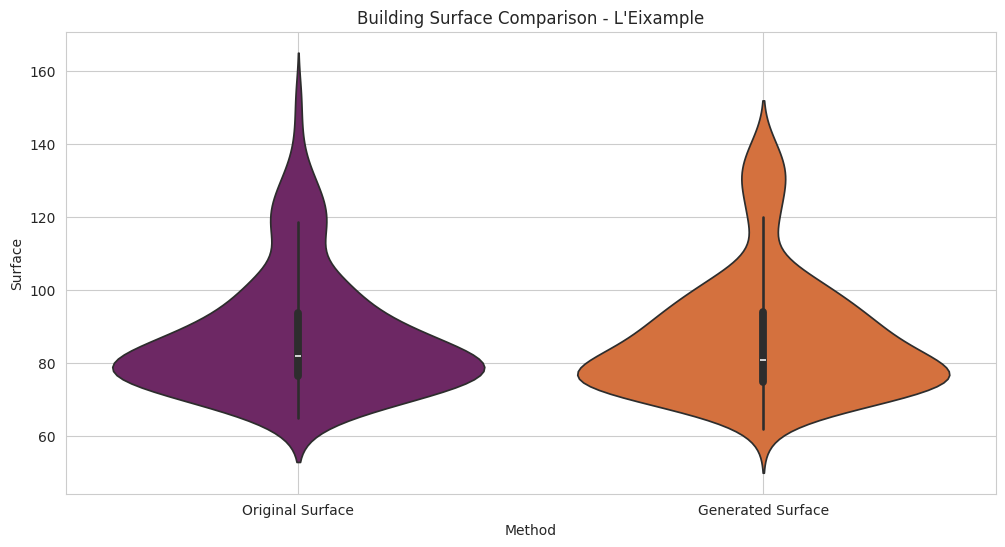

<ipython-input-54-4acc48462e62>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Surface', data=df, palette=color_palette)


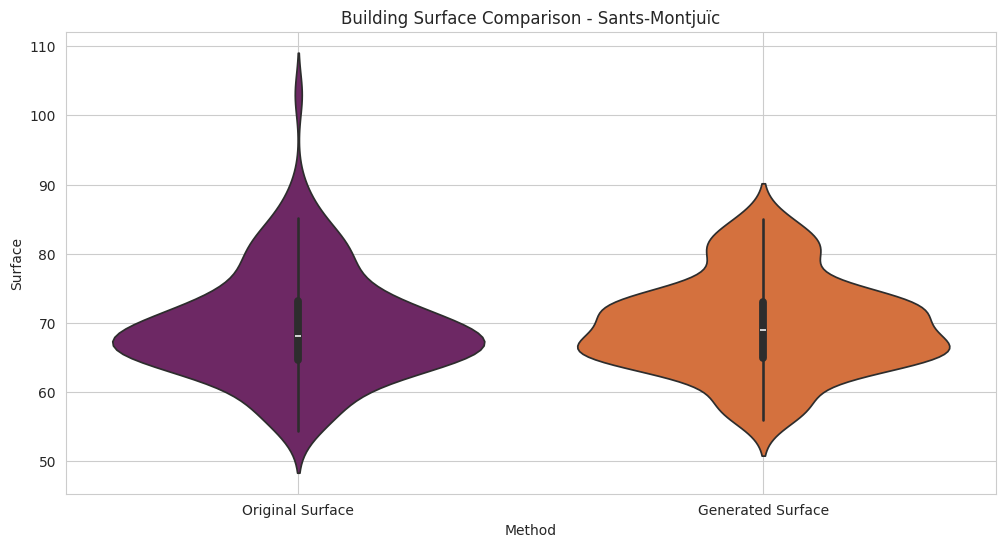

<ipython-input-54-4acc48462e62>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Surface', data=df, palette=color_palette)


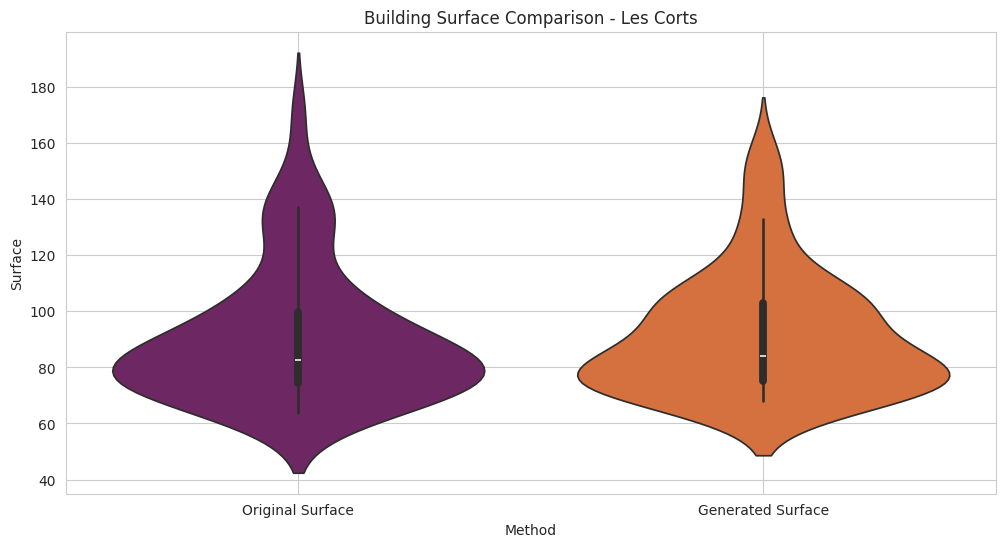

<ipython-input-54-4acc48462e62>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Surface', data=df, palette=color_palette)


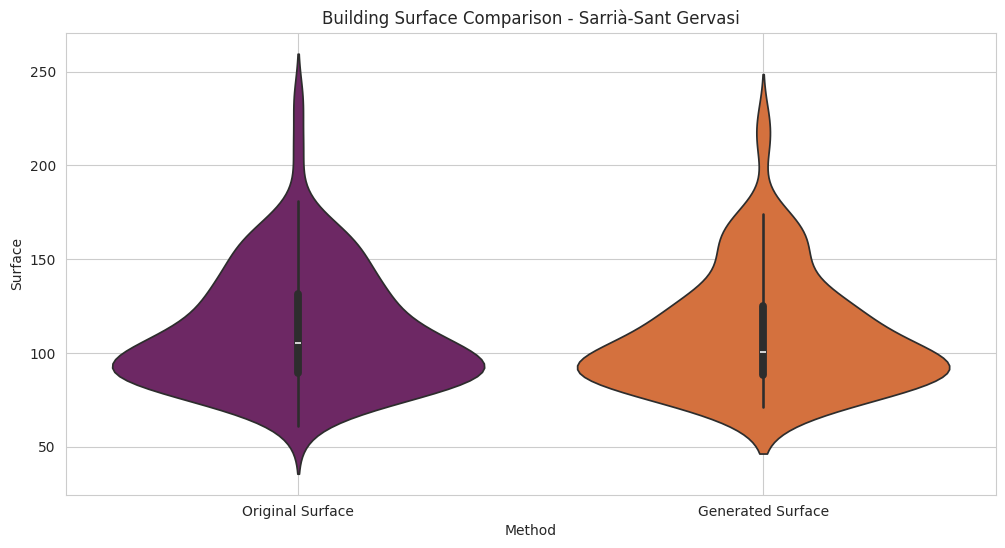

<ipython-input-54-4acc48462e62>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Surface', data=df, palette=color_palette)


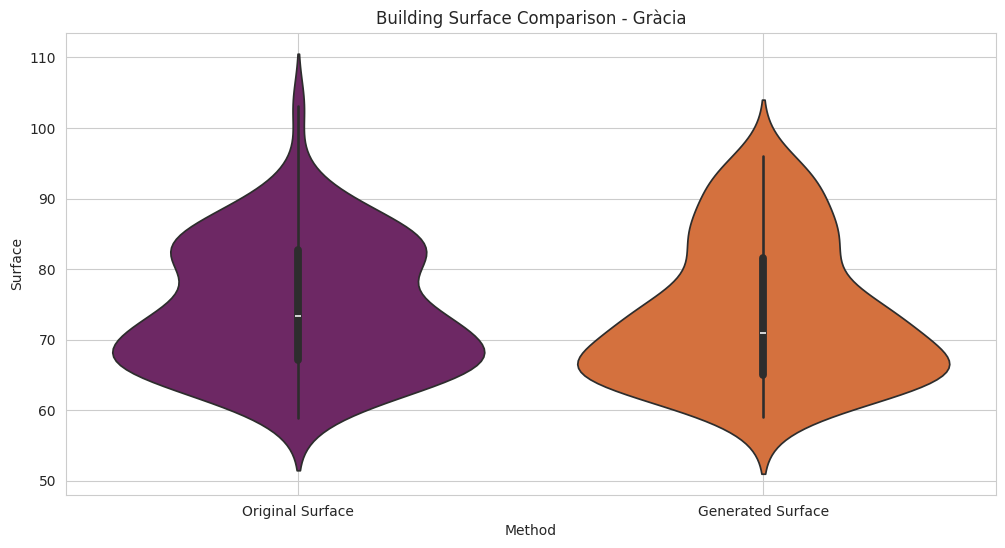

<ipython-input-54-4acc48462e62>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Surface', data=df, palette=color_palette)


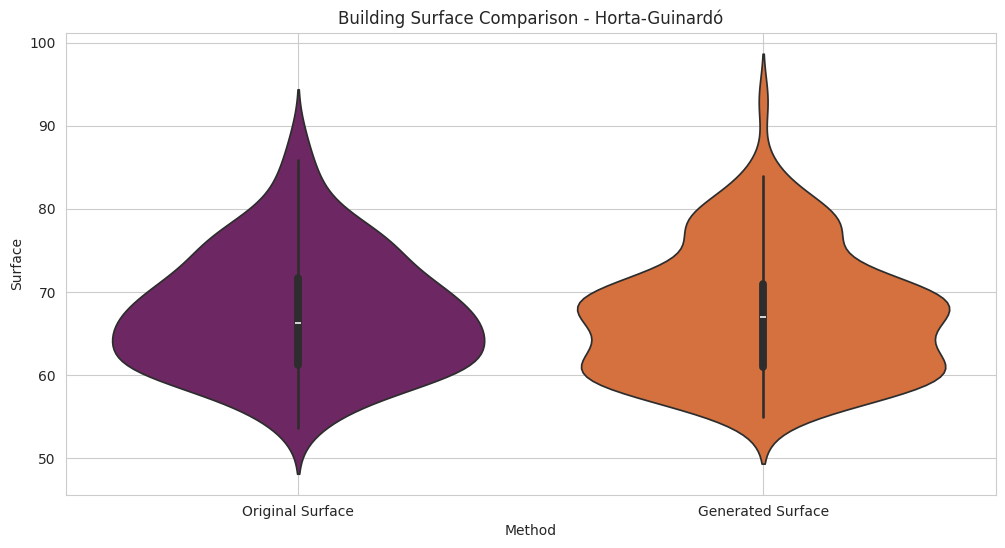

<ipython-input-54-4acc48462e62>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Surface', data=df, palette=color_palette)


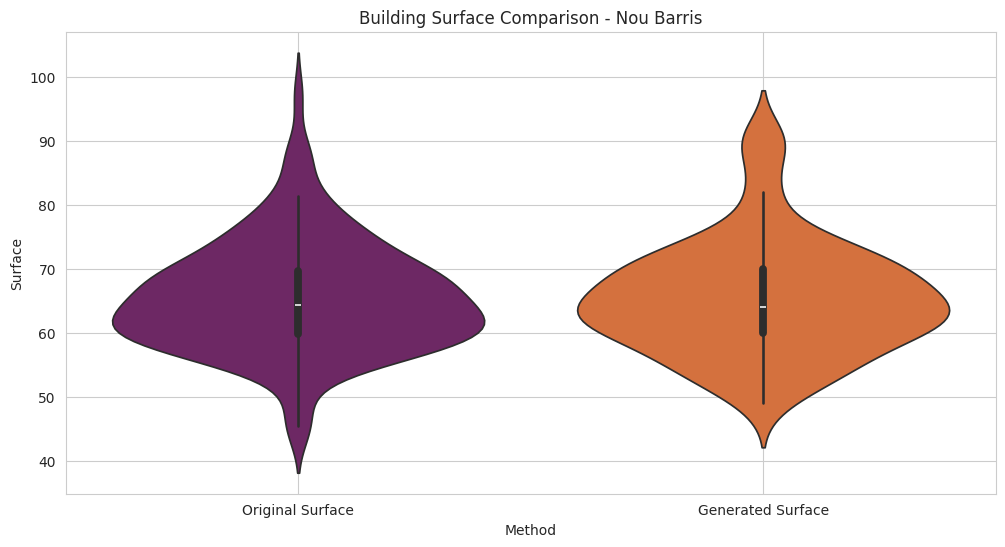

<ipython-input-54-4acc48462e62>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Surface', data=df, palette=color_palette)


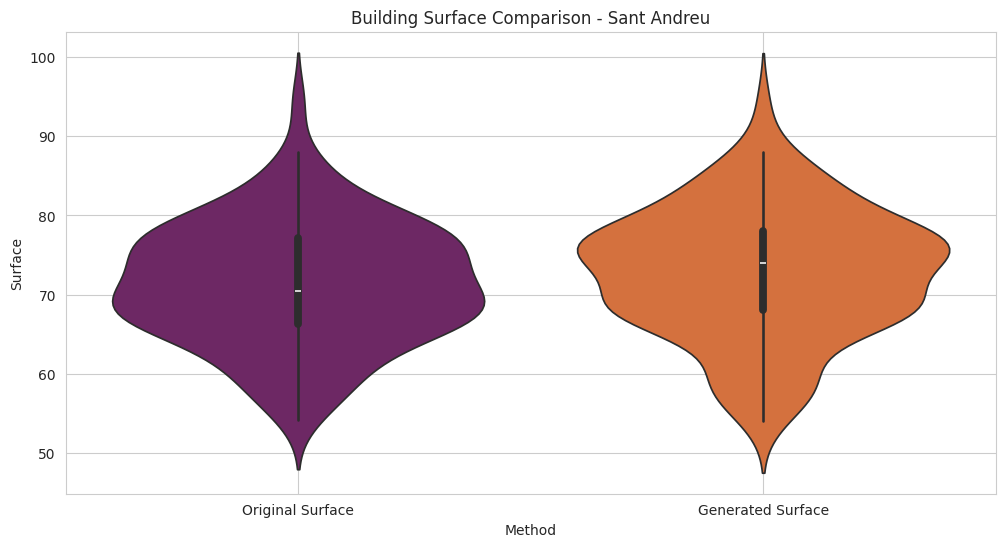

<ipython-input-54-4acc48462e62>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='Surface', data=df, palette=color_palette)


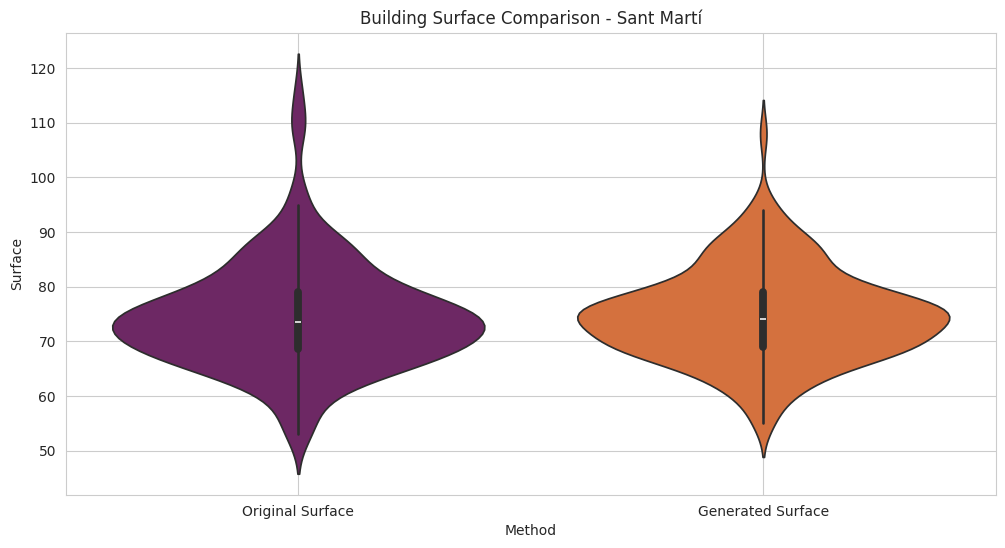

In [ ]:
sns.set_style("whitegrid")
color_palette = 'inferno'

#fpr each district
for district in surface_df['Nom_districte'].unique():
  #original surface values for the district
  original_values = surface_df[surface_df['Nom_districte'] == district]['Sup_mitjana_m2']

  #generated surface values for the district
  generated_values = [generate_building_surface(district, surface_df) for _ in range(len(original_values))]

  surfaces = np.concatenate([original_values, generated_values])
  methods_labels = ['Original Surface'] * len(original_values) + ['Generated Surface'] * len(original_values)
  data = {'Method': methods_labels, 'Surface': surfaces}
  df = pd.DataFrame(data)

  #we create the violin plot
  plt.figure(figsize=(12, 6))
  sns.violinplot(x='Method', y='Surface', data=df, palette=color_palette)
  plt.xlabel('Method')
  plt.ylabel('Surface')
  plt.title(f'Building Surface Comparison - {district}')
  plt.grid(True)
  plt.show()

In [ ]:
#for each district
for district in surface_df['Nom_districte'].unique():
  #original surface values for the district
  original_values = surface_df[surface_df['Nom_districte'] == district]['Sup_mitjana_m2']

  #generated surface values for the district
  generated_values = [generate_building_surface(district, surface_df) for _ in range(len(original_values))]

  #Kolmogorov-Smirnov test for the district
  perform_ks_test(original_values, generated_values, district, alpha=0.05)


Kolmogorov-Smirnov statistic for Ciutat Vella: 0.07407407407407407
P-value: 0.9987375782247235
Fail to reject null hypothesis for Ciutat Vella: Distributions are similar.

Kolmogorov-Smirnov statistic for L'Eixample: 0.07514450867052024
P-value: 0.7146503971968192
Fail to reject null hypothesis for L'Eixample: Distributions are similar.

Kolmogorov-Smirnov statistic for Sants-Montjuïc: 0.08547008547008547
P-value: 0.7885416765651418
Fail to reject null hypothesis for Sants-Montjuïc: Distributions are similar.

Kolmogorov-Smirnov statistic for Les Corts: 0.14035087719298245
P-value: 0.6328581863440477
Fail to reject null hypothesis for Les Corts: Distributions are similar.

Kolmogorov-Smirnov statistic for Sarrià-Sant Gervasi: 0.12244897959183673
P-value: 0.4564618073762397
Fail to reject null hypothesis for Sarrià-Sant Gervasi: Distributions are similar.

Kolmogorov-Smirnov statistic for Gràcia: 0.10344827586206896
P-value: 0.7436107023680757
Fail to reject null hypothesis for Gràcia:

### Final Implementation

In [ ]:
#example of usage
district = 'Sarrià-Sant Gervasi'
for i in range(10):
  surface = generate_building_surface(district, surface_df)
  print(f"Iteration {i+1}: Building surface for a random neighborhood in {district}: {surface:.2f} m2")

Iteration 1: Building surface for a random neighborhood in Sarrià-Sant Gervasi: 150.00 m2
Iteration 2: Building surface for a random neighborhood in Sarrià-Sant Gervasi: 81.00 m2
Iteration 3: Building surface for a random neighborhood in Sarrià-Sant Gervasi: 98.00 m2
Iteration 4: Building surface for a random neighborhood in Sarrià-Sant Gervasi: 94.00 m2
Iteration 5: Building surface for a random neighborhood in Sarrià-Sant Gervasi: 72.00 m2
Iteration 6: Building surface for a random neighborhood in Sarrià-Sant Gervasi: 133.00 m2
Iteration 7: Building surface for a random neighborhood in Sarrià-Sant Gervasi: 161.00 m2
Iteration 8: Building surface for a random neighborhood in Sarrià-Sant Gervasi: 77.00 m2
Iteration 9: Building surface for a random neighborhood in Sarrià-Sant Gervasi: 115.00 m2
Iteration 10: Building surface for a random neighborhood in Sarrià-Sant Gervasi: 70.00 m2


#6 Appliances Builder

We will create a single function to generate the different appliances of the household based on different attributes, like the district, the inhabitants or the age of the building between others.

The used datasets are the following:

- appliances per inhabitants
- percentage of households with computers
- electric or gas heating per building age
- number of rooms per district and household surface
- number of TVs per household
- houses with swimming pool in Barcelona
- houses with aircon
- number of floors per building in Barcelona



In [ ]:
# Create a dictionary with the data
data = {
    "Distrito": ["BARCELONA", "Ciutat Vella", "L'Eixample", "Sants-Montjuïc", "Les Corts",
                 "Sarrià-Sant Gervasi", "Gràcia", "Horta-Guinardó", "Nou Barris",
                 "Sant Andreu", "Sant Martí"],
    "(n)": [4671, 365, 531, 485, 173, 556, 471, 661, 493, 432, 504],
    "TOTAL": [100.0] * 11,
    "1 baño o lavabo": [57.89, 81.76, 46.96, 69.87, 38.74, 28.08, 56.66, 62.27, 72.87, 57.30, 68.86],
    "2 baños o lavabos": [34.29, 16.59, 49.16, 26.15, 48.05, 42.78, 33.56, 31.12, 23.72, 35.64, 25.39],
    "3 o más baños o lavabos": [6.76, 1.33, 3.05, 2.79, 11.61, 27.51, 7.91, 6.20, 2.58, 5.29, 5.07],
    "NC": [1.06, 0.32, 0.84, 1.19, 1.60, 1.63, 1.86, 0.41, 0.84, 1.77, 0.67],
    "Media de baños o lavabos": [1.51, 1.20, 1.56, 1.32, 1.76, 2.14, 1.53, 1.45, 1.30, 1.48, 1.36]
}

# Convert the dictionary to a DataFrame
bathroom_df = pd.DataFrame(data)
display(bathroom_df)

Distrito   (n)  TOTAL  1 baño o lavabo  2 baños o lavabos  \
0             BARCELONA  4671  100.0            57.89              34.29   
1          Ciutat Vella   365  100.0            81.76              16.59   
2            L'Eixample   531  100.0            46.96              49.16   
3        Sants-Montjuïc   485  100.0            69.87              26.15   
4             Les Corts   173  100.0            38.74              48.05   
5   Sarrià-Sant Gervasi   556  100.0            28.08              42.78   
6                Gràcia   471  100.0            56.66              33.56   
7        Horta-Guinardó   661  100.0            62.27              31.12   
8            Nou Barris   493  100.0            72.87              23.72   
9           Sant Andreu   432  100.0            57.30              35.64   
10           Sant Martí   504  100.0            68.86              25.39   

    3 o más baños o lavabos    NC  Media de baños o lavabos  
0                      6.76  1.06                      1.51  
1                      1.33  0.32                      1.20  
2                      3.05  0.84                      1.56  
3                      2.79  1.19                      1.32  
4                     11.61  1.60                      1.76  
5                     27.51  1.63                      2.14  
6                      7.91  1.86                      1.53  
7                      6.20  0.41                      1.45  
8                      2.58  0.84                      1.30  
9                      5.29  1.77                      1.48  
10                     5.07  0.67                      1.36

In [ ]:
def get_appliances(inhabitants, building_age, building_surface, bathroom_df, district):
  #Number of rooms
  if building_surface <= 75:
    total_rooms = 51873+109098+138508+10324
    prob_1_room = 51873/total_rooms
    prob_2_room = 109098/total_rooms
    prob_3_room = 138508/total_rooms
    prob_4plus_room = 10324/total_rooms

  if building_surface <= 90 and building_surface >= 76:
    total_rooms = 953+24727+85059+35862
    prob_1_room = 953/total_rooms
    prob_2_room = 24727/total_rooms
    prob_3_room = 85059/total_rooms
    prob_4plus_room = 35862/total_rooms

  if building_surface <= 90 and building_surface >= 76:
    total_rooms = 953+24727+85059+35862
    prob_1_room = 953/total_rooms
    prob_2_room = 24727/total_rooms
    prob_3_room = 85059/total_rooms
    prob_4plus_room = 35862/total_rooms

  if building_surface <= 120 and building_surface >= 91:
    total_rooms = 1075+8658+62837+53933
    prob_1_room = 1075/total_rooms
    prob_2_room = 8658/total_rooms
    prob_3_room = 62837/total_rooms
    prob_4plus_room = 53933/total_rooms

  if building_surface > 120:
    total_rooms = 296+4659+15131+27490
    prob_1_room = 296/total_rooms
    prob_2_room = 4659/total_rooms
    prob_3_room = 15131/total_rooms
    prob_4plus_room = 27490/total_rooms

  #we choose the number of rooms based on the probabilities
  room_choice = random.choices(['1_room', '2_rooms', '3_rooms', '4plus_rooms'],
        weights=[prob_1_room, prob_2_room, prob_3_room, prob_4plus_room], k=1)[0]

  if room_choice == '4plus_rooms':
    number_of_rooms = 4
    while number_of_rooms < 10 and random.random() < 0.2:
      number_of_rooms += 1
  else:
    number_of_rooms = int(room_choice.split('_')[0])

  #Washing Machine, Dish Washer, Dryer, Oven, Microwave
  #Aircon
  if inhabitants == 1:
    #probability of having this appliances
    prob_washingMachine = 0.98
    prob_dishWasher = 0.40
    prob_dryer = 0.16
    prob_oven = 0.88
    prob_microwave = 0.80

    #probability of having aircon and in how many rooms
    prob_aircon = 0.223
    prob_aircon_allrooms = 0.077
    prob_aircon_majorityrooms = 0.127
    prob_aircon_fewrooms = 0.795

  if inhabitants == 2:
    #probability of having this appliances
    prob_washingMachine = 0.99
    prob_dishWasher = 0.58
    prob_dryer = 0.26
    prob_oven = 0.95
    prob_microwave = 0.83

    #probability of having aircon and in how many rooms
    prob_aircon = 0.327
    prob_aircon_allrooms = 0.099
    prob_aircon_majorityrooms = 0.118
    prob_aircon_fewrooms = 0.784

  if inhabitants == 3:
    #probability of having this appliances
    prob_washingMachine = 0.98
    prob_dishWasher = 0.61
    prob_dryer = 0.26
    prob_oven = 0.91
    prob_microwave = 0.91

    #probability of having aircon and in how many rooms
    prob_aircon = 0.388
    prob_aircon_allrooms = 0.098
    prob_aircon_majorityrooms = 0.127
    prob_aircon_fewrooms = 0.775

  if inhabitants >= 4:
    #probability of having this appliances
    prob_washingMachine = 0.99
    prob_dishWasher = 0.72
    prob_dryer = 0.40
    prob_oven = 0.99
    prob_microwave = 0.92

    #probability of having aircon and in how many rooms
    prob_aircon = 0.436
    prob_aircon_allrooms = 0.120
    prob_aircon_majorityrooms = 0.139
    prob_aircon_fewrooms = 0.742

  #computer probability
  prob_computer = 0.821

  #assign appliances based on probabilities
  washingMachine = 1 if random.random() < prob_washingMachine else 0
  dishWasher = 1 if random.random() < prob_dishWasher else 0
  dryer = 1 if random.random() < prob_dryer else 0
  oven = 1 if random.random() < prob_oven else 0
  microwave = 1 if random.random() < prob_microwave else 0
  computer = 1 if random.random() < prob_computer else 0
  fridge = 1 #data says that 99.9% of the households have a fridge

  #assign number of rooms with aircon
  aircon_rooms = 0
  if random.random() < prob_aircon:
    #we choose the number of rooms based on the probabilities
    aircon_rooms_choice = random.choices(['all_rooms', 'majority_rooms', 'few_rooms'],
        weights=[prob_aircon_allrooms, prob_aircon_majorityrooms, prob_aircon_fewrooms], k=1)[0]

    if aircon_rooms_choice == 'all_rooms':
      aircon_rooms = number_of_rooms
    if aircon_rooms_choice == 'majority_rooms':
      aircon_rooms = round(number_of_rooms * 0.8)
    if aircon_rooms_choice == 'few_rooms':
      aircon_rooms = round(number_of_rooms * 0.4)

  if building_age >= 34:
    total_type_heaters = 404138
    prob_gas_heater = 268630/total_type_heaters
    prob_electric_heater = 135508/total_type_heaters
    total_heating_systems = 521808
    prob_no_heating_system = 102559/total_heating_systems
    prob_any_heating_system = 314638/total_heating_systems
    prob_other_heating_methods = 104611/total_heating_systems

  if building_age < 34:
    total_type_heaters = 98797
    prob_gas_heater = 63842/total_type_heaters
    prob_electric_heater = 34955/total_type_heaters
    total_heating_systems = 113877
    prob_no_heating_system = 11161/total_heating_systems
    prob_any_heating_system = 90774/total_heating_systems
    prob_other_heating_methods = 11942/total_heating_systems

  #select 1 type of heater
  gas_heater = 0
  electric_heater = 0
  heaters = random.choices(['gas_heater', 'electric_heater'], weights=[prob_gas_heater, prob_electric_heater], k=1)[0]
  gas_heating_system = 1 if heaters == 'gas_heater' else 0
  electric_heating_system = 1 if heaters == 'electric_heater' else 0

  #now we select the disponibility on a heating system
  heating_system = random.choices(['no_heater', 'yes_heater', 'other_system'], weights=[prob_no_heating_system, prob_any_heating_system, prob_other_heating_methods], k=1)[0]
  no_heating_system = 1 if heating_system == 'no_heater' else 0
  yes_heating_system = 1 if heating_system == 'yes_heater' else 0
  other_heating_methods = 1 if heating_system == 'other_system' else 0

  #if there is no heating system we assign the central heaters to 0 and the other appliances to their corresponding energy consumption
  if no_heating_system == 1:
    central_heating_electric = 0
    electric_heating_radiators = 0
    central_heating_gas = 0
    gas_heating_radiators = 0

    if gas_heating_system == 1:
      gas_stove = 1
      electric_stove = 0
      hot_water_gas = 1
      hot_water_electric = 0
      if oven == 1:
        gas_oven = 1
        electric_oven = 0
      if oven == 0:
        gas_oven = 0
        electric_oven = 0

    if electric_heating_system == 1:
      gas_stove = 0
      electric_stove = 1
      hot_water_gas = 0
      hot_water_electric = 1
      if oven == 1:
        gas_oven = 0
        electric_oven = 1
      if oven == 0:
        gas_oven = 0
        electric_oven = 0

  #if there is a heating system we assign the central heaters and appliances to their corresponding energy consumption
  if yes_heating_system == 1:
    if gas_heating_system == 1:
      central_heating_gas = 1
      central_heating_electric = 0
      gas_heating_radiators = number_of_rooms #we assign one radiator per room
      electric_heating_radiators = 0
      gas_stove = 1
      electric_stove = 0
      hot_water_gas = 1
      hot_water_electric = 0
      if oven == 1:
        gas_oven = 1
        electric_oven = 0
      if oven == 0:
        gas_oven = 0
        electric_oven = 0

    if electric_heating_system == 1:
      central_heating_gas = 0
      central_heating_electric = 1
      gas_heating_radiators = 0
      electric_heating_radiators = number_of_rooms #we assign one radiator per room
      gas_stove = 0
      electric_stove = 1
      hot_water_gas = 0
      hot_water_electric = 1
      if oven == 1:
        gas_oven = 0
        electric_oven = 1
      if oven == 0:
        gas_oven = 0
        electric_oven = 0

  #this case works like the one for no heating system but with electric radiators for some rooms
  if other_heating_methods == 1:
    central_heating_electric = 0
    electric_heating_radiators = number_of_rooms
    central_heating_gas = 0
    gas_heating_radiators = 0

    if gas_heating_system == 1:
      gas_stove = 1
      electric_stove = 0
      hot_water_gas = 1
      hot_water_electric = 0
      if oven == 1:
        gas_oven = 1
        electric_oven = 0
      if oven == 0:
        gas_oven = 0
        electric_oven = 0

    if electric_heating_system == 1:
      gas_stove = 0
      electric_stove = 1
      hot_water_gas = 0
      hot_water_electric = 1
      if oven == 1:
        gas_oven = 0
        electric_oven = 1
      if oven == 0:
        gas_oven = 0
        electric_oven = 0

  #we assign a lamp per room
  lamps = number_of_rooms

  #we assign the probabilities per number of TVs
  prob_1_TV = 0.38
  prob_2_TV = 0.39
  prob_3plus_TV = 0.23

  #we choose the number of TVs based on the probabilities
  TV_choice = random.choices(['1_TV', '2_TV', '3plus_TV'],
        weights=[prob_1_TV, prob_2_TV, prob_3plus_TV], k=1)[0]

  if TV_choice == '3plus_TV':
    number_of_TV = 3
    while number_of_TV < 5 and random.random() < 0.2:
      number_of_TV += 1
  else:
    number_of_TV = int(TV_choice.split('_')[0])

  prob_swimmingpool = 0.053
  swimming_pool = 1 if random.random()<prob_swimmingpool else 0

  bathroom_district_data = bathroom_df[bathroom_df['Distrito'] == district]
  # Get the probabilities for 1, 2, or 3+ bathrooms
  prob_1_bath = bathroom_district_data['1 baño o lavabo'].values[0]
  prob_2_baths = bathroom_district_data['2 baños o lavabos'].values[0]
  prob_3plus_baths = bathroom_district_data['3 o más baños o lavabos'].values[0]

  total_prob = prob_1_bath + prob_2_baths + prob_3plus_baths
  prob_1_bath /= total_prob
  prob_2_baths /= total_prob
  prob_3plus_baths /= total_prob

  #choose a number of bathrooms based on the probabilities
  bathrooms_choice = random.choices(['1_bathroom', '2_bathrooms', '3plus_bathrooms'],
   [prob_1_bath, prob_2_baths, prob_3plus_baths])[0]

  if bathrooms_choice == '3plus_bathrooms':
    bathrooms = 3
    while bathrooms < 5 and random.random() < 0.2:
      bathrooms += 1
  else:
    bathrooms = int(bathrooms_choice.split('_')[0])

  #we select the amount of bathrooms (at least 1) and half bathrooms
  half_bathrooms = 0
  for i in range(bathrooms):
    if bathrooms > 1:
      if random.random() < 0.5:
        bathrooms -= 1
        half_bathrooms += 1

  #we calculate the probability of household to be on the top floor or ground floor
  mean_of_floors_per_building = 5 #based on data
  prob_top_floor = 1/mean_of_floors_per_building
  prob_ground_floor = 1/mean_of_floors_per_building
  prob_middle_floors = 1 - prob_top_floor - prob_ground_floor

  #choose a floor based on the probabilities
  floor_choice = random.choices(['top_floor', 'middle_floor', 'ground_floor'],
   [prob_top_floor, prob_middle_floors, prob_ground_floor])[0]

  terrace = 0
  garden = 0

  #if top floor then terrace = 1
  if floor_choice == 'top_floor':
    terrace = 1

  #if ground floor then garden = 1
  if floor_choice == 'ground_floor':
    garden = 1

  #return the results in a dictionary
  appliances = {
      'Fridge': fridge,
      'Dish Washer': dishWasher,
      'Washing Machine': washingMachine,
      'Dryer': dryer,
      'Microwave': microwave,
      'TV': number_of_TV,
      'Computer': computer,
      'Lamps': lamps,
      'Rooms with Air Con': aircon_rooms,
      'Central Heating (Electric)': central_heating_electric,
      'Electric Heating Radiators': electric_heating_radiators,
      'Hot Water (Electric)': hot_water_electric,
      'Stove (Electric)': electric_stove,
      'Oven (Electric)': electric_oven,
      'Central Heating (Gas)': central_heating_gas,
      'Gas Heating Radiators': gas_heating_radiators,
      'Hot Water (Gas)': hot_water_gas,
      'Stove (Gas)': gas_stove,
      'Oven (Gas)': gas_oven,
      'Swimming Pool': swimming_pool,
      'Garden': garden,
      'Bathrooms': bathrooms,
      'Half Bathrooms': half_bathrooms,
      'Terrace with plants': terrace
  }

  return appliances

#7 Generation of the input dataset

In [ ]:
#based on the dataset with the number of households per district we will create proportions
display(inhabitants_df.head(5))

#we group by district and sum the number of households
district_households = inhabitants_df.groupby('Nom_Districte')['Domicilis'].sum().reset_index()

#calculate the total number of households
total_households = district_households['Domicilis'].sum()

#calculate the proportion of households per district
district_households['Proportion'] = district_households['Domicilis'] / total_households

display(district_households)

#check that proportions are stored correctly
districts_proportions = district_households['Proportion'].tolist()

print(districts_proportions)

Any  Codi_Districte Nom_Districte  Codi_Barri  \
0  2022               1  Ciutat Vella           1   
1  2022               1  Ciutat Vella           2   
2  2022               1  Ciutat Vella           3   
3  2022               1  Ciutat Vella           4   
4  2022               2      Eixample           5   

                               Nom_Barri  Poblacio  Domicilis  \
0                               el Raval     46520      17192   
1                         el Barri Gòtic     22748       6572   
2                         la Barceloneta     14342       6938   
3  Sant Pere, Santa Caterina i la Ribera     22418      10240   
4                          el Fort Pienc     33445      12880   

   Ocupacio_mitjana_persones_per_domicili  
0                                     2.7  
1                                     3.5  
2                                     2.1  
3                                     2.2  
4                                     2.6

Nom_Districte  Domicilis  Proportion
0         Ciutat Vella      40942    0.061768
1             Eixample     112612    0.169895
2               Gràcia      52875    0.079771
3       Horta-Guinardó      70151    0.105835
4            Les Corts      32811    0.049501
5           Nou Barris      66964    0.101027
6          Sant Andreu      60002    0.090524
7           Sant Martí      95544    0.144145
8       Sants-Montjuïc      74502    0.112399
9  Sarrià-Sant Gervasi      56430    0.085135

[0.06176819802272971, 0.16989498108875087, 0.07977122442606208, 0.10583510476997977, 0.0495011563998775, 0.10102695550764672, 0.09052355570709364, 0.1441449052778, 0.11239935247641562, 0.08513456632364412]


In [ ]:
#districts
districts = ['Ciutat Vella', "L'Eixample", 'Sants-Montjuïc', 'Les Corts', 'Sarrià-Sant Gervasi',
             'Gràcia', 'Horta-Guinardó', 'Nou Barris', 'Sant Andreu', 'Sant Martí']

for i in range(1000):
  district = random.choices(districts, districts_proportions)[0]

  #generate values using the given functions
  typology, inhabitants, random_ages, remoteworkers, working_schedules = get_type_inhabitants_ages_remoteworkers_and_workingschedules(district, inhabitants_df2, typology_df, ages_df, employed_df, type_of_schedule_df, weekly_hours_df)
  income = generate_income(district, income_df)
  building_age = generate_building_age(district, building_df)
  surface = generate_building_surface(district, surface_df)
  appliances = get_appliances(inhabitants, building_age, surface, bathroom_df, district)

  #assign values to each row
  row = {
      'Id': i,
      'Description': typology,
      'Quantity': inhabitants,
      'Ages': random_ages,
      'Income per unit': income,
      'Remote workers': remoteworkers,
      'Working Schedules': working_schedules,
      'Size': surface,
      'Building age': building_age,
      'District': district,
      'Fridge': appliances['Fridge'],
      'Dish Washer': appliances['Dish Washer'],
      'Washing Machine': appliances['Washing Machine'],
      'Dryer': appliances['Dryer'],
      'Microwave': appliances['Microwave'],
      'TV': appliances['TV'],
      'Computer': appliances['Computer'],
      'Lamps': appliances['Lamps'],
      'Rooms with Air Con': appliances['Rooms with Air Con'],
      'Central Heating (Electric)': appliances['Central Heating (Electric)'],
      'Electric Heating Radiators': appliances['Electric Heating Radiators'],
      'Hot Water (Electric)': appliances['Hot Water (Electric)'],
      'Stove (Electric)': appliances['Stove (Electric)'],
      'Oven (Electric)': appliances['Oven (Electric)'],
      'Central Heating (Gas)': appliances['Central Heating (Gas)'],
      'Gas Heating Radiators': appliances['Gas Heating Radiators'],
      'Hot Water (Gas)': appliances['Hot Water (Gas)'],
      'Stove (Gas)': appliances['Stove (Gas)'],
      'Oven (Gas)': appliances['Oven (Gas)'],
      'Swimming Pool': appliances['Swimming Pool'],
      'Garden': appliances['Garden'],
      'Bathrooms': appliances['Bathrooms'],
      'Half Bathrooms': appliances['Half Bathrooms'],
      'Terrace with plants': appliances['Terrace with plants'],
      'Water (min-max)': '',
      'Energy (min-max)': '',
      'Gas (min-max)': ''
  }

  #append the row to the DataFrame
  output_df = pd.concat([output_df, pd.DataFrame([row])], ignore_index=True)

display(output_df)

Id                                        Description Quantity  \
0      0                    Una mujer sola de 65 años y más        1   
1      1       Dos personas o más: todas mayores de 18 años        3   
2      2                      Dos personas de 65 años y más        2   
3      3                      Dos personas de 65 años y más        2   
4      4                       Dos personas de 18 a 64 años        2   
..   ...                                                ...      ...   
995  995                       Dos personas de 18 a 64 años        2   
996  996   Tres personas o más: dos de 18 años y más y e...        5   
997  997                     Un hombre solo de 18 a 64 años        1   
998  998       Dos personas o más: todas mayores de 18 años        3   
999  999       Dos personas o más: todas mayores de 18 años        5   

                     Ages Income per unit Remote workers  \
0                    [71]           61246              0   
1            [32, 68, 57]           68904              1   
2                [69, 79]           58457              0   
3                [75, 74]           33297              0   
4                [51, 43]           55352              0   
..                    ...             ...            ...   
995              [29, 59]           53328              0   
996  [60, 41, 14, 17, 15]           41582              0   
997                  [36]           52362              0   
998          [24, 31, 60]           37396              0   
999  [56, 25, 84, 44, 90]           48035              0   

                                     Working Schedules Size Building age  \
0                              [[0, 0, 0, 0, 0, 0, 0]]  128           96   
1    [[1, 1, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0],...   86           83   
2       [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]   91           45   
3       [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]   62           94   
4       [[1, 1, 1, 1, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0]]   59           92   
..                                                 ...  ...          ...   
995     [[1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 0, 1]]  112           89   
996  [[0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 1, 0],...   77          106   
997                            [[1, 1, 1, 1, 1, 0, 0]]   57           69   
998  [[1, 1, 1, 1, 0, 1, 0], [1, 0, 1, 1, 1, 0, 0],...   80           56   
999  [[2, 0, 2, 2, 2, 0, 2], [0, 1, 1, 1, 1, 1, 0],...   61           55   

           District  ... Stove (Gas) Oven (Gas) Swimming Pool Garden  \
0        L'Eixample  ...           0          0             0      0   
1        L'Eixample  ...           1          1             0      0   
2         Les Corts  ...           1          1             0      1   
3        Nou Barris  ...           1          1             0      0   
4        Sant Martí  ...           0          0             0      1   
..              ...  ...         ...        ...           ...    ...   
995      L'Eixample  ...           1          1             0      0   
996    Ciutat Vella  ...           1          1             0      0   
997      Nou Barris  ...           0          0             0      0   
998      Nou Barris  ...           1          1             1      0   
999  Horta-Guinardó  ...           1          1             0      0   

    Bathrooms Half Bathrooms Terrace with plants Water (min-max)  \
0           1              1                   0                   
1           1              2                   0                   
2           2              0                   0                   
3           1              0                   1                   
4           1              0                   0                   
..        ...            ...                 ...             ...   
995         1              1                   1                   
996         1              0                   1                   
997         1              1  

In [ ]:
#calculate the proportion of generated households per district
district_counts = output_df['District'].value_counts()
total_count = len(output_df)
generated_district_proportions = (district_counts / total_count).reset_index()
generated_district_proportions.columns = ['District', 'Proportion']

#display the generated district proportions
print('Generated District Proportions:\n', generated_district_proportions)

#original proportions
original_proportions_df = pd.DataFrame({
    'District': districts,
    'Proportion': districts_proportions
})

original_proportions_df['Proportion'] = original_proportions_df['Proportion'].round(3)
original_proportions_df = original_proportions_df.sort_values(by='Proportion', ascending=False).reset_index(drop=True)

#display the original proportions
print("Original District Proportions:")
print(original_proportions_df)

Generated District Proportions:
               District  Proportion
0           L'Eixample       0.191
1           Nou Barris       0.134
2               Gràcia       0.118
3          Sant Andreu       0.105
4            Les Corts       0.101
5       Horta-Guinardó       0.087
6           Sant Martí       0.076
7       Sants-Montjuïc       0.068
8  Sarrià-Sant Gervasi       0.060
9         Ciutat Vella       0.060
Original District Proportions:
              District  Proportion
0           L'Eixample       0.170
1           Nou Barris       0.144
2          Sant Andreu       0.112
3            Les Corts       0.106
4               Gràcia       0.101
5       Horta-Guinardó       0.091
6           Sant Martí       0.085
7       Sants-Montjuïc       0.080
8         Ciutat Vella       0.062
9  Sarrià-Sant Gervasi       0.050


In [ ]:
#export the DataFrame to a CSV file
output_df.to_csv('generated_data.csv', index=False)

In [ ]:
#we will create a df for the ages so it can be visualized with tableau
file_path = '/content/drive/MyDrive/TFG/Data/generated_data_for_tableau.csv'

#we read the CSV file into a df
tableau_data_df = pd.read_csv(file_path, delimiter=';')

display(tableau_data_df.head(5))


Id                                        Description  Quantity  \
0   0                       Dos personas de 18 a 64 años         2   
1   1   Dos personas o más: una mujer de 18 años y má...         2   
2   2                    Una mujer sola de 65 años y más         1   
3   3   Tres personas o más: dos de 18 años y más y e...         3   
4   4       Dos personas o más: todas mayores de 18 años         4   

            Ages  Income per unit  Remote workers  \
0        [32 26]            37008               0   
1        [63  6]            27970               0   
2           [70]            30696               0   
3     [70 41 17]            50876               1   
4  [39 46 41 61]            54540               0   

                                   Working Schedules  Size  Building age  \
0     [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]    68           105   
1     [[1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0]]    67            44   
2                            [[0, 0, 0, 0, 0, 0, 0]]    75            29   
3  [[0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 2, 0, 0],...    90            82   
4  [[2, 2, 2, 0, 0, 2, 2], [0, 0, 0, 0, 0, 0, 0],...    75            81   

       District  ...  Stove (Gas)  Oven (Gas)  Swimming Pool  Garden  \
0  Ciutat Vella  ...            1           1              0       0   
1    Nou Barris  ...            1           1              0       0   
2    Sant Martí  ...            1           0              0       0   
3    L'Eixample  ...            1           1              0       0   
4        Gràcia  ...            0           0              0       0   

   Bathrooms  Half Bathrooms  Terrace with plants  Water (min-max)  \
0          1               0                    1              NaN   
1          1               0                    0              NaN   
2          1               0                    0              NaN   
3          1               1                    1              NaN   
4          1               0                    1              NaN   

   Energy (min-max)  Gas (min-max)  
0               NaN            NaN  
1               NaN            NaN  
2               NaN            NaN  
3               NaN            NaN  
4               NaN            NaN  

[5 rows x 37 columns]

In [ ]:
#we create a list to store district and age
data_list = []

#for each row in the tableau df
for index, row in tableau_data_df.iterrows():
    district = row['District']
    ages = row['Ages']

    #convert the ages array to a list of integers
    ages_list = [int(age.strip()) for age in ages.strip('[]').split()]

    # add each age and its district to the list
    for age in ages_list:
        data_list.append({'District': district, 'Age': age})

#create the ages df from the list
ages_tableau_data = pd.DataFrame(data_list)

display(ages_tableau_data)

District  Age
0       Ciutat Vella   32
1       Ciutat Vella   26
2         Nou Barris   63
3         Nou Barris    6
4         Sant Martí   70
...              ...  ...
2420      Sant Martí    8
2421  Sants-Montjuïc   69
2422  Sants-Montjuïc   69
2423     Sant Andreu   36
2424     Sant Andreu   31

[2425 rows x 2 columns]

In [ ]:
#we will check if the amount of ages of the new df matches the quantity of people of the original one
total_quantity = tableau_data_df['Quantity'].sum()

print("Total sum of quantities:", total_quantity)

Total sum of quantities: 2425


In [ ]:
#we export the ages data to use it for tableau
ages_tableau_data.to_csv('ages_data_for_tableau.csv', index=False)

In [ ]:
display(ages_df)

Data_Referencia  Codi_Districte Nom_Districte  Codi_Barri  \
0           2023-01-01               1  Ciutat Vella           1   
1           2023-01-01               1  Ciutat Vella           1   
2           2023-01-01               1  Ciutat Vella           1   
3           2023-01-01               1  Ciutat Vella           1   
4           2023-01-01               1  Ciutat Vella           1   
...                ...             ...           ...         ...   
104940      2023-01-01              10    Sant Martí          73   
104941      2023-01-01              10    Sant Martí          73   
104942      2023-01-01              10    Sant Martí          73   
104943      2023-01-01              10    Sant Martí          73   
104944      2023-01-01              10    Sant Martí          73   

                  Nom_Barri  AEB  Seccio_Censal  Valor  EDAT_1  
0                  el Raval    1           1001      9       0  
1                  el Raval    1           1001     15       1  
2                  el Raval    1           1001     11       2  
3                  el Raval    1           1001     11       3  
4                  el Raval    1           1001     14       4  
...                     ...  ...            ...    ...     ...  
104940  la Verneda i la Pau  233          10143      0      93  
104941  la Verneda i la Pau  233          10143      0      96  
104942  la Verneda i la Pau  233          10143      0      97  
104943  la Verneda i la Pau  233          10143      0      98  
104944  la Verneda i la Pau  233          10143      0     100  

[104945 rows x 9 columns]

In [ ]:
ages_df['Total_Age_Contribution'] = ages_df['EDAT_1'] * ages_df['Valor']

# Group by district to calculate the sum of total age contributions and the sum of people
grouped_df = ages_df.groupby('Nom_Districte').agg({
    'Total_Age_Contribution': 'sum',
    'Valor': 'sum'
}).reset_index()

# Calculate the average age for each district
grouped_df['Average_Age'] = grouped_df['Total_Age_Contribution'] / grouped_df['Valor']

# Select the desired columns for the final dataset
original_average_ages = grouped_df[['Nom_Districte', 'Average_Age']]

# Display the resulting DataFrame
display(original_average_ages)

Nom_Districte  Average_Age
0         Ciutat Vella    38.902716
1             Eixample    44.089656
2               Gràcia    43.554586
3       Horta-Guinardó    44.576637
4            Les Corts    45.586054
5           Nou Barris    43.838962
6          Sant Andreu    44.035655
7           Sant Martí    43.443894
8       Sants-Montjuïc    43.437887
9  Sarrià-Sant Gervasi    42.773824

In [ ]:
original_average_ages.to_csv('original_ages_for_tableau.csv', index=False)